In [ ]:
#Follow this https://www.10xgenomics.com/resources/analysis-guides/trajectory-analysis-using-10x-Genomics-single-cell-gene-expression-data

In [1]:
#import packages necessary for deepvelo
import scvelo as scv
import scanpy as sc
import numpy as np
import sklearn
import scipy
import pandas as pd
import seaborn as sns
import pickle
import anndata as ad
scv.set_figure_params()

Data Preprocessing 

Follow this procedure: https://www.10xgenomics.com/resources/analysis-guides/trajectory-analysis-using-10x-Genomics-single-cell-gene-expression-data
Start on Step 4

In [3]:
# First, import required packages in the current session.

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import igraph
import scvelo as scv
import loompy as lmp
import anndata
import os
import sklearn
import tensorflow
import scipy

import warnings
warnings.filterwarnings('ignore')

In [79]:
filedir = '/blue/ferrallm/00_data/single-cell/OvCa/cell-line/OVCA3-S-Count/'

In [80]:
#Read in the clusters
OVCA3_clusters = pd.read_csv(filedir+'./outs/OVCA3_S+R_clusters.csv',delimiter=',',index_col=0)

In [19]:
#read as a category
#OVCA3_clusters2 = pd.DataFrame(OVCA3_clusters, dtype="category")

#OVCA3_clusters2.dtypes #not working 

V1    category
dtype: object

In [11]:
OVCA3_clusters # read this as a category 

,Clusters
Barcode,
OVCA3_S_AAACCTGAGGGATACC,Cluster 0
OVCA3_S_AAACCTGCACCGCTAG,Cluster 0
OVCA3_S_AAACCTGCATGGGAAC,Cluster 2
OVCA3_S_AAACGGGGTCTCTCGT,Cluster 3
OVCA3_S_AAAGATGCACTTGGAT,Cluster 2
...,...
OVCA3_R_TTTGCGCCACGGCGTT,Cluster 2
OVCA3_R_TTTGCGCGTATAGGTA,Cluster 2
OVCA3_R_TTTGCGCGTTACGCGC,Cluster 1


In [50]:
#divive data set into sensitive and resistant, not needed
#OVCA3_S_clusters= OVCA3_clusters[0:1712]
#OVCA3_S_clusters

,V1
OVCA3_S_AAACCTGAGGGATACC,0
OVCA3_S_AAACCTGCACCGCTAG,0
OVCA3_S_AAACCTGCATGGGAAC,2
OVCA3_S_AAACGGGGTCTCTCGT,3
OVCA3_S_AAAGATGCACTTGGAT,2
...,...
OVCA3_S_TTTGTCAAGAAACGCC,3
OVCA3_S_TTTGTCAAGTCCCACG,3
OVCA3_S_TTTGTCACATGATCCA,3
OVCA3_S_TTTGTCAGTTACGACT,3


In [51]:
#not needed yet 
#OVCA3_R_clusters= OVCA3_clusters[1713:2262]
#OVCA3_R_clusters

,V1
OVCA3_R_AAACGGGCACAGATTC,1
OVCA3_R_AAAGATGTCGAACGGA,1
OVCA3_R_AAAGATGTCTGTCTAT,1
OVCA3_R_AAAGCAATCTGTACGA,1
OVCA3_R_AAAGTAGGTAGAGCTG,1
...,...
OVCA3_R_TTTGCGCCACGGCGTT,2
OVCA3_R_TTTGCGCGTATAGGTA,2
OVCA3_R_TTTGCGCGTTACGCGC,1
OVCA3_R_TTTGCGCTCCGATATG,1


In [81]:
#create index for each of the datasets
OVCA3_BCs=OVCA3_clusters.index
#OVCA3_S_BCs=OVCA3_S_clusters.index
#OVCA3_R_BCs=OVCA3_R_clusters.index

In [82]:
OVCA3_BCs

Index(['OVCA3_S_AAACCTGAGGGATACC', 'OVCA3_S_AAACCTGCACCGCTAG',
       'OVCA3_S_AAACCTGCATGGGAAC', 'OVCA3_S_AAACGGGGTCTCTCGT',
       'OVCA3_S_AAAGATGCACTTGGAT', 'OVCA3_S_AAAGATGGTCCGCTGA',
       'OVCA3_S_AAAGATGGTTCGTGAT', 'OVCA3_S_AAAGCAAAGCAGGTCA',
       'OVCA3_S_AAAGCAAAGTGTTTGC', 'OVCA3_S_AAAGCAACAGTCACTA',
       ...
       'OVCA3_R_TTGCGTCTCTACCAGA', 'OVCA3_R_TTGGAACCAGCTGTTA',
       'OVCA3_R_TTGGAACGTGAGTGAC', 'OVCA3_R_TTGTAGGAGTGGTCCC',
       'OVCA3_R_TTTGCGCAGCTAGGCA', 'OVCA3_R_TTTGCGCCACGGCGTT',
       'OVCA3_R_TTTGCGCGTATAGGTA', 'OVCA3_R_TTTGCGCGTTACGCGC',
       'OVCA3_R_TTTGCGCTCCGATATG', 'OVCA3_R_TTTGTCATCTTACCGC'],
      dtype='object', name='Barcode', length=2262)

In [83]:
#Read UMAP from UMAP embeddings from Seurat 
OVCA3_UMAP=pd.read_csv(filedir+'./outs/OVCA3_S+R_UMAP.csv',delimiter=',',index_col=0)
OVCA3_UMAP

,UMAP_1,UMAP_2
Barcode,,
OVCA3_S_AAACCTGAGGGATACC,-2.518422,-2.326233
OVCA3_S_AAACCTGCACCGCTAG,-0.595393,-1.900581
OVCA3_S_AAACCTGCATGGGAAC,0.312164,2.607974
OVCA3_S_AAACGGGGTCTCTCGT,0.312513,0.264766
OVCA3_S_AAAGATGCACTTGGAT,1.340097,1.741074
...,...,...
OVCA3_R_TTTGCGCCACGGCGTT,3.733603,0.244848
OVCA3_R_TTTGCGCGTATAGGTA,3.045073,0.476301
OVCA3_R_TTTGCGCGTTACGCGC,3.863872,-2.857169


In [58]:
#OVCA3_S_UMAP= OVCA3_UMAP[0:1712]
#OVCA3_R_UMAP= OVCA3_UMAP[1713:2262]
#OVCA3_R_UMAP

,UMAP_1,UMAP_2
OVCA3_R_AAACGGGCACAGATTC,3.009656,-3.485937
OVCA3_R_AAAGATGTCGAACGGA,3.459922,-1.668059
OVCA3_R_AAAGATGTCTGTCTAT,2.528897,-2.781651
OVCA3_R_AAAGCAATCTGTACGA,4.988939,-2.225686
OVCA3_R_AAAGTAGGTAGAGCTG,5.503384,-1.871633
...,...,...
OVCA3_R_TTTGCGCCACGGCGTT,3.733603,0.244848
OVCA3_R_TTTGCGCGTATAGGTA,3.045073,0.476301
OVCA3_R_TTTGCGCGTTACGCGC,3.863872,-2.857169
OVCA3_R_TTTGCGCTCCGATATG,5.353141,-2.604649


In [84]:
OVCA3_UMAP=OVCA3_UMAP.to_numpy()
OVCA3_UMAP

array([[-2.51842154, -2.32623287],
       [-0.59539319, -1.90058085],
       [ 0.31216429,  2.60797445],
       ...,
       [ 3.86387192, -2.85716912],
       [ 5.35314118, -2.60464903],
       [ 3.6213945 , -2.76239344]])

In [64]:
#OVCA3_R_UMAP=OVCA3_R_UMAP.to_numpy()
#OVCA3_R_UMAP

array([[ 3.0096563 , -3.48593661],
       [ 3.45992194, -1.66805884],
       [ 2.52889739, -2.78165098],
       ...,
       [ 3.86387192, -2.85716912],
       [ 5.35314118, -2.60464903],
       [ 3.6213945 , -2.76239344]])

In [85]:
#Import the filtered matrix for the sensitive cells
Path10x='/blue/ferrallm/00_data/single-cell/OvCa/cell-line/OVCA3-S-Count/outs/filtered_feature_bc_matrix/'

#Read the filtered feature bc matrix output from cellranger count
OVCA3_S=sc.read_10x_mtx(Path10x,var_names='gene_symbols',cache=True)

In [86]:
#Import the filtered matrix for the resistant cells
Path10x2='/blue/ferrallm/00_data/single-cell/OvCa/cell-line/OVCA3-R-Count/outs/filtered_feature_bc_matrix/'

#Read the filtered feature bc matrix output from cellranger count
OVCA3_R=sc.read_10x_mtx(Path10x2,var_names='gene_symbols',cache=True)

In [16]:
OVCA3_S

AnnData object with n_obs × n_vars = 1766 × 33538
    var: 'gene_ids', 'feature_types'

In [17]:
OVCA3_R

AnnData object with n_obs × n_vars = 582 × 33538
    var: 'gene_ids', 'feature_types'

In [9]:
#the barcodes (n_obs)=1766
OVCA3_S.obs

""
AAACCTGAGGGATACC-1
AAACCTGCACCGCTAG-1
AAACCTGCATGGGAAC-1
AAACGGGAGTACGTAA-1
AAACGGGGTCTCTCGT-1
...
TTTGTCAAGAAACGCC-1
TTTGTCAAGTCCCACG-1
TTTGTCACATGATCCA-1
TTTGTCAGTTACGACT-1


In [14]:
#the gene_ids (n_vars)=33538
OVCA3_S.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.4', 'AL732372.1', 'OR4F29', 'AC114498.1',
       ...
       'AC007325.2', 'BX072566.1', 'AL354822.1', 'AC023491.2', 'AC004556.1',
       'AC233755.2', 'AC233755.1', 'AC240274.1', 'AC213203.1', 'FAM231C'],
      dtype='object', length=33538)

In [87]:
OVCA3_S_df=OVCA3_S.to_df()
OVCA3_S_df.head()

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
AAACCTGAGGGATACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACCGCTAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
AAACCTGCATGGGAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGGGAGTACGTAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGGGGTCTCTCGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
OVCA3_R_df=OVCA3_R.to_df()
OVCA3_R_df.head()

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
AAACCTGGTGTTTGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGGGCACAGATTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGATGTCGAACGGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGATGTCTGTCTAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGCAATCTGTACGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#OVCA3_S_df.irename( columns={0:'Cell names'}, inplace=True ) didnt work
#OVCA3_S_df.index.name='Cell names'

In [60]:
OVCA3_S_df

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
AAACCTGAGGGATACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACCGCTAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
AAACCTGCATGGGAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGGGAGTACGTAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGGGGTCTCTCGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAAACGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAAGTCCCACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCACATGATCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTTACGACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
#add indexes to the different columns, add OVCA3_S and a -1 at the end
#OVCA3_S_df['Cell names']='OVCA3_S_'+ OVCA3_S_df['Cell names'].astype(str)
#OVCA3_S_df[0]='OVCA3_S_'+ OVCA3_S_df[0].astype(str)
OVCA3_S_df.index='OVCA3_S_'+ OVCA3_S_df.index.astype(str)

In [90]:
OVCA3_R_df.index='OVCA3_R_'+ OVCA3_R_df.index.astype(str)

In [12]:
OVCA3_S_df

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
OVCA3_S_AAACCTGAGGGATACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVCA3_S_AAACCTGCACCGCTAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
OVCA3_S_AAACCTGCATGGGAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVCA3_S_AAACGGGAGTACGTAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVCA3_S_AAACGGGGTCTCTCGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OVCA3_S_TTTGTCAAGAAACGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVCA3_S_TTTGTCAAGTCCCACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVCA3_S_TTTGTCACATGATCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVCA3_S_TTTGTCAGTTACGACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
OVCA3_R_df

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
OVCA3_R_AAACCTGGTGTTTGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVCA3_R_AAACGGGCACAGATTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVCA3_R_AAAGATGTCGAACGGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVCA3_R_AAAGATGTCTGTCTAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVCA3_R_AAAGCAATCTGTACGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OVCA3_R_TTTGCGCGTATAGGTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVCA3_R_TTTGCGCGTTACGCGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVCA3_R_TTTGCGCTCCGATATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
OVCA3_R_TTTGGTTGTTATTCTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
#change the name of the observations 
OVCA3_S.obs.index='OVCA3_S_'+ OVCA3_S.obs.index.astype(str)
OVCA3_S.obs

""
OVCA3_S_AAACCTGAGGGATACC-1
OVCA3_S_AAACCTGCACCGCTAG-1
OVCA3_S_AAACCTGCATGGGAAC-1
OVCA3_S_AAACGGGAGTACGTAA-1
OVCA3_S_AAACGGGGTCTCTCGT-1
...
OVCA3_S_TTTGTCAAGAAACGCC-1
OVCA3_S_TTTGTCAAGTCCCACG-1
OVCA3_S_TTTGTCACATGATCCA-1
OVCA3_S_TTTGTCAGTTACGACT-1


In [92]:
OVCA3_R.obs.index='OVCA3_R_'+ OVCA3_R.obs.index.astype(str)
OVCA3_R.obs

""
OVCA3_R_AAACCTGGTGTTTGTG-1
OVCA3_R_AAACGGGCACAGATTC-1
OVCA3_R_AAAGATGTCGAACGGA-1
OVCA3_R_AAAGATGTCTGTCTAT-1
OVCA3_R_AAAGCAATCTGTACGA-1
...
OVCA3_R_TTTGCGCGTATAGGTA-1
OVCA3_R_TTTGCGCGTTACGCGC-1
OVCA3_R_TTTGCGCTCCGATATG-1
OVCA3_R_TTTGGTTGTTATTCTC-1


In [93]:
OVCA3_BCs=OVCA3_BCs + '-1'
OVCA3_BCs #2262

Index(['OVCA3_S_AAACCTGAGGGATACC-1', 'OVCA3_S_AAACCTGCACCGCTAG-1',
       'OVCA3_S_AAACCTGCATGGGAAC-1', 'OVCA3_S_AAACGGGGTCTCTCGT-1',
       'OVCA3_S_AAAGATGCACTTGGAT-1', 'OVCA3_S_AAAGATGGTCCGCTGA-1',
       'OVCA3_S_AAAGATGGTTCGTGAT-1', 'OVCA3_S_AAAGCAAAGCAGGTCA-1',
       'OVCA3_S_AAAGCAAAGTGTTTGC-1', 'OVCA3_S_AAAGCAACAGTCACTA-1',
       ...
       'OVCA3_R_TTGCGTCTCTACCAGA-1', 'OVCA3_R_TTGGAACCAGCTGTTA-1',
       'OVCA3_R_TTGGAACGTGAGTGAC-1', 'OVCA3_R_TTGTAGGAGTGGTCCC-1',
       'OVCA3_R_TTTGCGCAGCTAGGCA-1', 'OVCA3_R_TTTGCGCCACGGCGTT-1',
       'OVCA3_R_TTTGCGCGTATAGGTA-1', 'OVCA3_R_TTTGCGCGTTACGCGC-1',
       'OVCA3_R_TTTGCGCTCCGATATG-1', 'OVCA3_R_TTTGTCATCTTACCGC-1'],
      dtype='object', name='Barcode', length=2262)

In [86]:
#OVCA3_S=OVCA3_S[OVCA3_BCs] #didnt work
#it couldnt recognize the resistant cells but it was able to match the sensititve ones,
#althought there are only 1712 sensitive cells after QC

KeyError: "Values ['OVCA3_R_AAACCTGGTGTTTGTG-1', 'OVCA3_R_AAACGGGCACAGATTC-1', 'OVCA3_R_AAAGATGTCGAACGGA-1', 'OVCA3_R_AAAGATGTCTGTCTAT-1', 'OVCA3_R_AAAGCAATCTGTACGA-1', 'OVCA3_R_AAAGTAGGTAGAGCTG-1', 'OVCA3_R_AAAGTAGGTTGAACTC-1', 'OVCA3_R_AAATGCCCAGCCTGTG-1', 'OVCA3_R_AAATGCCTCGACGGAA-1', 'OVCA3_R_AACACGTTCTACTATC-1', 'OVCA3_R_AACACGTTCTCTAGGA-1', 'OVCA3_R_AACCGCGCATCCGCGA-1', 'OVCA3_R_AACCGCGCATTACCTT-1', 'OVCA3_R_AACTGGTTCCAAACTG-1', 'OVCA3_R_AAGACCTGTACTTGAC-1', 'OVCA3_R_AAGGAGCAGAGGGATA-1', 'OVCA3_R_AAGGAGCGTCATCCCT-1', 'OVCA3_R_AAGGCAGAGGACCACA-1', 'OVCA3_R_AAGGCAGAGTCCTCCT-1', 'OVCA3_R_AAGGCAGTCCTGCAGG-1', 'OVCA3_R_AAGGTTCAGAAGGTGA-1', 'OVCA3_R_AAGGTTCAGCCAGAAC-1', 'OVCA3_R_AAGGTTCTCCGTAGTA-1', 'OVCA3_R_AAGTCTGCACTTAAGC-1', 'OVCA3_R_AAGTCTGTCCCTGACT-1', 'OVCA3_R_AATCGGTCAAAGCAAT-1', 'OVCA3_R_AATCGGTCAGTAAGAT-1', 'OVCA3_R_ACACCAAGTCTGGTCG-1', 'OVCA3_R_ACACCCTAGCACAGGT-1', 'OVCA3_R_ACACCCTAGTGTGGCA-1', 'OVCA3_R_ACACCCTGTCCCGACA-1', 'OVCA3_R_ACACCGGGTGTTGGGA-1', 'OVCA3_R_ACACTGACATGGTAGG-1', 'OVCA3_R_ACACTGATCTTCATGT-1', 'OVCA3_R_ACAGCCGCACCCATTC-1', 'OVCA3_R_ACAGCCGGTAAGAGGA-1', 'OVCA3_R_ACAGCTATCGCCCTTA-1', 'OVCA3_R_ACATACGTCGAGAGCA-1', 'OVCA3_R_ACATCAGGTGCGGTAA-1', 'OVCA3_R_ACCAGTATCCGCGGTA-1', 'OVCA3_R_ACCCACTAGTATCGAA-1', 'OVCA3_R_ACCCACTCATGGGAAC-1', 'OVCA3_R_ACCCACTGTGCTAGCC-1', 'OVCA3_R_ACCGTAAGTTCACCTC-1', 'OVCA3_R_ACCTTTATCGACAGCC-1', 'OVCA3_R_ACGAGGAGTTGTGGAG-1', 'OVCA3_R_ACGAGGATCGGGAGTA-1', 'OVCA3_R_ACGATACGTCTAGCCG-1', 'OVCA3_R_ACGATGTAGCTTTGGT-1', 'OVCA3_R_ACGATGTCACGTCTCT-1', 'OVCA3_R_ACGCCAGAGCTGATAA-1', 'OVCA3_R_ACGCCGACAAGCTGTT-1', 'OVCA3_R_ACGCCGACATCGACGC-1', 'OVCA3_R_ACGGGCTCAGGGTACA-1', 'OVCA3_R_ACGGGCTCATGACGGA-1', 'OVCA3_R_ACGGGTCTCCAAAGTC-1', 'OVCA3_R_ACGTCAAAGACAATAC-1', 'OVCA3_R_ACGTCAACAGCCAATT-1', 'OVCA3_R_ACTATCTAGTGAATTG-1', 'OVCA3_R_ACTATCTCAGGTTTCA-1', 'OVCA3_R_ACTGAACCAACACCCG-1', 'OVCA3_R_ACTGCTCCAGTGGGAT-1', 'OVCA3_R_ACTTACTAGGGTTCCC-1', 'OVCA3_R_ACTTACTGTTACTGAC-1', 'OVCA3_R_ACTTACTTCATGTCTT-1', 'OVCA3_R_ACTTGTTAGTGACTCT-1', 'OVCA3_R_ACTTGTTCATGACGGA-1', 'OVCA3_R_ACTTGTTTCCGCGCAA-1', 'OVCA3_R_ACTTTCACAACCGCCA-1', 'OVCA3_R_AGAATAGTCGTGGTCG-1', 'OVCA3_R_AGAGCTTGTGCACCAC-1', 'OVCA3_R_AGAGCTTGTGTAAGTA-1', 'OVCA3_R_AGAGCTTGTTGAACTC-1', 'OVCA3_R_AGAGTGGCAACCGCCA-1', 'OVCA3_R_AGATTGCCATCTCGCT-1', 'OVCA3_R_AGCATACAGAATCTCC-1', 'OVCA3_R_AGCATACAGTGTCTCA-1', 'OVCA3_R_AGCGGTCAGACCGGAT-1', 'OVCA3_R_AGCGGTCCAGCGTAAG-1', 'OVCA3_R_AGCGGTCTCAGCTCGG-1', 'OVCA3_R_AGCGTCGAGGCTCAGA-1', 'OVCA3_R_AGCGTCGTCGGCTACG-1', 'OVCA3_R_AGCTCCTAGACAGAGA-1', 'OVCA3_R_AGCTCCTAGAGCTATA-1', 'OVCA3_R_AGCTTGAGTAATCGTC-1', 'OVCA3_R_AGGCCGTAGACCTTTG-1', 'OVCA3_R_AGGCCGTCAAACTGTC-1', 'OVCA3_R_AGGCCGTGTGACGCCT-1', 'OVCA3_R_AGGCCGTGTTCGTTGA-1', 'OVCA3_R_AGGGATGCATGTAGTC-1', 'OVCA3_R_AGGTCCGCAAGCCTAT-1', 'OVCA3_R_AGTAGTCTCGCGTTTC-1', 'OVCA3_R_AGTCTTTAGCCAGTAG-1', 'OVCA3_R_AGTGGGAGTAAATGTG-1', 'OVCA3_R_AGTGTCACAGCTGTTA-1', 'OVCA3_R_AGTGTCACATGCAATC-1', 'OVCA3_R_ATAACGCCATGAAGTA-1', 'OVCA3_R_ATAGACCAGCGTTGCC-1', 'OVCA3_R_ATCACGAAGGCTAGCA-1', 'OVCA3_R_ATCATCTTCAGGTAAA-1', 'OVCA3_R_ATCATGGTCAAGAAGT-1', 'OVCA3_R_ATCCACCAGGACATTA-1', 'OVCA3_R_ATCCACCGTGACGCCT-1', 'OVCA3_R_ATCCACCTCGAGCCCA-1', 'OVCA3_R_ATCCGAAAGGCGCTCT-1', 'OVCA3_R_ATCCGAAGTACAGCAG-1', 'OVCA3_R_ATCGAGTCACGAAAGC-1', 'OVCA3_R_ATGCGATTCGGTGTTA-1', 'OVCA3_R_ATGTGTGGTGGTACAG-1', 'OVCA3_R_ATTACTCGTTCGCGAC-1', 'OVCA3_R_ATTATCCAGTCCATAC-1', 'OVCA3_R_ATTATCCGTATCACCA-1', 'OVCA3_R_ATTGGACCATGGATGG-1', 'OVCA3_R_ATTGGTGTCTGGCGAC-1', 'OVCA3_R_ATTTCTGAGATGTCGG-1', 'OVCA3_R_ATTTCTGCACTGAAGG-1', 'OVCA3_R_ATTTCTGCATTCTCAT-1', 'OVCA3_R_CAACCAAAGTAGGTGC-1', 'OVCA3_R_CAACCAAGTCTCTTAT-1', 'OVCA3_R_CAACCTCCATCCTAGA-1', 'OVCA3_R_CAACTAGCAGCTGTGC-1', 'OVCA3_R_CAAGAAATCGCCCTTA-1', 'OVCA3_R_CAAGTTGGTCTCACCT-1', 'OVCA3_R_CAAGTTGGTTCGCGAC-1', 'OVCA3_R_CACAAACCAGCTGTAT-1', 'OVCA3_R_CACACAAAGTAGATGT-1', 'OVCA3_R_CACACAAGTCGCGAAA-1', 'OVCA3_R_CACACAATCAACACCA-1', 'OVCA3_R_CACACAATCACATGCA-1', 'OVCA3_R_CACACCTAGTGTACTC-1', 'OVCA3_R_CACACTCCAACAACCT-1', 'OVCA3_R_CACAGTACACGCTTTC-1', 'OVCA3_R_CACATAGGTTATGTGC-1', 'OVCA3_R_CACATAGTCTTTCCTC-1', 'OVCA3_R_CACCACTGTCAGCTAT-1', 'OVCA3_R_CACCTTGGTACAGCAG-1', 'OVCA3_R_CACTCCACATGCCTTC-1', 'OVCA3_R_CACTCCAGTAATCACC-1', 'OVCA3_R_CACTCCAGTGAGCGAT-1', 'OVCA3_R_CACTCCAGTTAAGATG-1', 'OVCA3_R_CACTCCATCCTCATTA-1', 'OVCA3_R_CACTCCATCGTACCGG-1', 'OVCA3_R_CAGAATCCACGAAGCA-1', 'OVCA3_R_CAGAATCTCCGTAGTA-1', 'OVCA3_R_CAGATCAAGACAGGCT-1', 'OVCA3_R_CAGATCAGTTCGTGAT-1', 'OVCA3_R_CAGATCATCCGGCACA-1', 'OVCA3_R_CAGATCATCGTGGGAA-1', 'OVCA3_R_CAGCAGCCAGATGGGT-1', 'OVCA3_R_CAGCAGCTCCCAAGTA-1', 'OVCA3_R_CAGCCGACATGATCCA-1', 'OVCA3_R_CAGCCGAGTGAAAGAG-1', 'OVCA3_R_CAGCGACAGTGCGATG-1', 'OVCA3_R_CAGCTAAAGTGCTGCC-1', 'OVCA3_R_CAGCTAATCCTGTAGA-1', 'OVCA3_R_CAGGTGCTCGGCCGAT-1', 'OVCA3_R_CAGTAACAGGCCCTTG-1', 'OVCA3_R_CAGTAACGTATGAATG-1', 'OVCA3_R_CAGTCCTCATGAAGTA-1', 'OVCA3_R_CATATGGAGAACTCGG-1', 'OVCA3_R_CATATGGAGGTGACCA-1', 'OVCA3_R_CATCAGACATAGAAAC-1', 'OVCA3_R_CATCAGATCATACGGT-1', 'OVCA3_R_CATCCACGTGTGGCTC-1', 'OVCA3_R_CATCGAAAGGAGTTGC-1', 'OVCA3_R_CATCGAAGTCTGCGGT-1', 'OVCA3_R_CATGACAAGGATATAC-1', 'OVCA3_R_CATGACAGTCCGTCAG-1', 'OVCA3_R_CATGCCTAGTAGATGT-1', 'OVCA3_R_CATTCGCAGCCGGTAA-1', 'OVCA3_R_CATTCGCTCTTGCAAG-1', 'OVCA3_R_CCAATCCGTCCAAGTT-1', 'OVCA3_R_CCACCTACAAGTTAAG-1', 'OVCA3_R_CCACGGAAGACTTGAA-1', 'OVCA3_R_CCACGGAGTAAACACA-1', 'OVCA3_R_CCAGCGACAAGCTGGA-1', 'OVCA3_R_CCATGTCAGTCCGGTC-1', 'OVCA3_R_CCATGTCTCAGTTTGG-1', 'OVCA3_R_CCATTCGTCGACCAGC-1', 'OVCA3_R_CCCAATCAGGGTTTCT-1', 'OVCA3_R_CCCAATCCACATCCGG-1', 'OVCA3_R_CCGGGATAGGTGCTTT-1', 'OVCA3_R_CCGTGGACAGGGTATG-1', 'OVCA3_R_CCGTGGATCCAAAGTC-1', 'OVCA3_R_CCTAAAGAGCTCCCAG-1', 'OVCA3_R_CCTACACAGAGTCGGT-1', 'OVCA3_R_CCTACACTCGGCGGTT-1', 'OVCA3_R_CCTACCACATCCGCGA-1', 'OVCA3_R_CCTACCAGTGGGTCAA-1', 'OVCA3_R_CCTAGCTTCAGTTCGA-1', 'OVCA3_R_CCTATTAAGCAGATCG-1', 'OVCA3_R_CCTTACGCACATGACT-1', 'OVCA3_R_CGAACATAGCGATCCC-1', 'OVCA3_R_CGAATGTGTTGAGGTG-1', 'OVCA3_R_CGAATGTTCTGGTATG-1', 'OVCA3_R_CGACCTTAGTATTGGA-1', 'OVCA3_R_CGACCTTCATATGCTG-1', 'OVCA3_R_CGACCTTTCTCTTATG-1', 'OVCA3_R_CGACTTCAGACTGGGT-1', 'OVCA3_R_CGAGAAGAGGACAGCT-1', 'OVCA3_R_CGAGAAGTCCGTCAAA-1', 'OVCA3_R_CGAGAAGTCTCTAAGG-1', 'OVCA3_R_CGAGCACAGATGAGAG-1', 'OVCA3_R_CGAGCACTCGACCAGC-1', 'OVCA3_R_CGAGCCATCAGGATCT-1', 'OVCA3_R_CGATCGGAGCCACGCT-1', 'OVCA3_R_CGATGGCCAGGGATTG-1', 'OVCA3_R_CGATGGCCAGTATAAG-1', 'OVCA3_R_CGATGGCGTAAACGCG-1', 'OVCA3_R_CGATGTAAGACCTAGG-1', 'OVCA3_R_CGATGTATCCTCGCAT-1', 'OVCA3_R_CGATTGAGTAGAAGGA-1', 'OVCA3_R_CGCCAAGGTAAAGTCA-1', 'OVCA3_R_CGCCAAGTCGTCTGCT-1', 'OVCA3_R_CGCGGTAAGGTAGCTG-1', 'OVCA3_R_CGCGGTATCTCTAGGA-1', 'OVCA3_R_CGCGTTTTCTGGCGAC-1', 'OVCA3_R_CGCTGGAAGGTAGCTG-1', 'OVCA3_R_CGCTGGACACAAGCCC-1', 'OVCA3_R_CGCTTCAAGGCGCTCT-1', 'OVCA3_R_CGGACACGTCGCGGTT-1', 'OVCA3_R_CGGACTGAGACGCTTT-1', 'OVCA3_R_CGGACTGAGTAATCCC-1', 'OVCA3_R_CGGACTGCATTAGGCT-1', 'OVCA3_R_CGGAGTCCAGTAAGAT-1', 'OVCA3_R_CGGCTAGAGTATTGGA-1', 'OVCA3_R_CGGTTAACAAGGCTCC-1', 'OVCA3_R_CGGTTAATCGGAAATA-1', 'OVCA3_R_CGTAGCGCACGGTAAG-1', 'OVCA3_R_CGTAGCGGTCGTCTTC-1', 'OVCA3_R_CGTAGGCCAAACCCAT-1', 'OVCA3_R_CGTAGGCCAAAGCAAT-1', 'OVCA3_R_CGTAGGCCAGTGACAG-1', 'OVCA3_R_CGTAGGCTCCCACTTG-1', 'OVCA3_R_CGTCACTAGAGGTACC-1', 'OVCA3_R_CGTCACTCACCCAGTG-1', 'OVCA3_R_CGTCAGGGTGAGCGAT-1', 'OVCA3_R_CGTCCATAGACGCACA-1', 'OVCA3_R_CGTCCATGTAAGTTCC-1', 'OVCA3_R_CGTGAGCTCAGTTTGG-1', 'OVCA3_R_CGTGTAACATGCATGT-1', 'OVCA3_R_CGTGTAAGTCGAACAG-1', 'OVCA3_R_CGTGTCTCATTTCAGG-1', 'OVCA3_R_CGTGTCTTCGGTGTTA-1', 'OVCA3_R_CGTTAGAAGAATTCCC-1', 'OVCA3_R_CGTTAGATCCAAATGC-1', 'OVCA3_R_CGTTCTGAGCGAAGGG-1', 'OVCA3_R_CGTTCTGCATGGTCTA-1', 'OVCA3_R_CGTTGGGGTTTGGGCC-1', 'OVCA3_R_CTAACTTAGGCTAGCA-1', 'OVCA3_R_CTACACCCAATGCCAT-1', 'OVCA3_R_CTACACCCATCTGGTA-1', 'OVCA3_R_CTACATTTCAACGAAA-1', 'OVCA3_R_CTACCCAAGACTTGAA-1', 'OVCA3_R_CTACCCATCAAAGACA-1', 'OVCA3_R_CTAGAGTTCCCATTAT-1', 'OVCA3_R_CTAGTGATCGTACGGC-1', 'OVCA3_R_CTCAGAAGTTTAGCTG-1', 'OVCA3_R_CTCAGAATCTGCGTAA-1', 'OVCA3_R_CTCCTAGGTTGTGGAG-1', 'OVCA3_R_CTCGGAGTCGTAGGAG-1', 'OVCA3_R_CTCGGGAAGAGAACAG-1', 'OVCA3_R_CTCGTACGTCTTCGTC-1', 'OVCA3_R_CTCTAATCAGTAACGG-1', 'OVCA3_R_CTCTACGAGCACCGCT-1', 'OVCA3_R_CTCTACGCATTGTGCA-1', 'OVCA3_R_CTCTACGGTTCCCGAG-1', 'OVCA3_R_CTGAAACAGACACGAC-1', 'OVCA3_R_CTGAAACAGATCCCGC-1', 'OVCA3_R_CTGAAACCAGCCTGTG-1', 'OVCA3_R_CTGAAGTTCCTGCTTG-1', 'OVCA3_R_CTGATAGAGCCTCGTG-1', 'OVCA3_R_CTGATAGCACTATCTT-1', 'OVCA3_R_CTGATAGCATCCCATC-1', 'OVCA3_R_CTGATAGTCCGCAAGC-1', 'OVCA3_R_CTGATCCCAGTAGAGC-1', 'OVCA3_R_CTGCCTAAGGCGTACA-1', 'OVCA3_R_CTGCCTACATTGGGCC-1', 'OVCA3_R_CTGCCTAGTCACCTAA-1', 'OVCA3_R_CTGCCTATCTTTAGGG-1', 'OVCA3_R_CTGCGGAAGAGACTTA-1', 'OVCA3_R_CTGCGGAAGTGAACGC-1', 'OVCA3_R_CTGCTGTCACGCATCG-1', 'OVCA3_R_CTGCTGTGTCATACTG-1', 'OVCA3_R_CTGTGCTTCACTTCAT-1', 'OVCA3_R_CTTCTCTCACACAGAG-1', 'OVCA3_R_CTTCTCTTCACTCCTG-1', 'OVCA3_R_CTTCTCTTCGTCCGTT-1', 'OVCA3_R_CTTGGCTAGCGTAATA-1', 'OVCA3_R_GAAACTCAGGAATTAC-1', 'OVCA3_R_GAAACTCCAAGTTAAG-1', 'OVCA3_R_GAACATCTCGCGCCAA-1', 'OVCA3_R_GAACCTAAGTGTGAAT-1', 'OVCA3_R_GAATAAGAGCTGAACG-1', 'OVCA3_R_GAATAAGTCTGCAGTA-1', 'OVCA3_R_GAATGAAGTGGTCTCG-1', 'OVCA3_R_GACACGCTCCGCATAA-1', 'OVCA3_R_GACACGCTCCTTTCTC-1', 'OVCA3_R_GACAGAGCAAGGACTG-1', 'OVCA3_R_GACCAATTCGCAAGCC-1', 'OVCA3_R_GACGGCTAGATCTGCT-1', 'OVCA3_R_GACGTTAAGCTCCTCT-1', 'OVCA3_R_GACGTTATCAAGGCTT-1', 'OVCA3_R_GACTAACGTTCAGCGC-1', 'OVCA3_R_GAGCAGAGTTCTCATT-1', 'OVCA3_R_GAGGTGACAGGACCCT-1', 'OVCA3_R_GAGTCCGAGCTAAGAT-1', 'OVCA3_R_GATCAGTCACTAAGTC-1', 'OVCA3_R_GATCGATTCCACGACG-1', 'OVCA3_R_GATCGTAAGCACACAG-1', 'OVCA3_R_GATCGTAGTTTCGCTC-1', 'OVCA3_R_GATGAAAAGGGCTTGA-1', 'OVCA3_R_GATGAGGTCCATGAAC-1', 'OVCA3_R_GATGAGGTCGTTGACA-1', 'OVCA3_R_GATTCAGCACCGAAAG-1', 'OVCA3_R_GCAAACTAGGCCCTTG-1', 'OVCA3_R_GCAAACTAGTGAATTG-1', 'OVCA3_R_GCAAACTCAATTCCTT-1', 'OVCA3_R_GCAAACTCATCCTTGC-1', 'OVCA3_R_GCAAACTTCTTAGAGC-1', 'OVCA3_R_GCAATCAGTACATCCA-1', 'OVCA3_R_GCAATCAGTTACGTCA-1', 'OVCA3_R_GCAATCATCTGACCTC-1', 'OVCA3_R_GCACATATCAACACAC-1', 'OVCA3_R_GCACATATCGGTTCGG-1', 'OVCA3_R_GCACTCTCACGGACAA-1', 'OVCA3_R_GCAGCCACAGCTCCGA-1', 'OVCA3_R_GCAGCCATCCAGAGGA-1', 'OVCA3_R_GCAGTTAAGGATGCGT-1', 'OVCA3_R_GCAGTTATCGATAGAA-1', 'OVCA3_R_GCAGTTATCGGATGGA-1', 'OVCA3_R_GCATACACAGCATACT-1', 'OVCA3_R_GCATACAGTCATCGGC-1', 'OVCA3_R_GCATGATGTTCGTTGA-1', 'OVCA3_R_GCATGATTCGTAGGAG-1', 'OVCA3_R_GCATGCGCAAGCGATG-1', 'OVCA3_R_GCCAAATAGGCCCGTT-1', 'OVCA3_R_GCCAAATAGTGGCACA-1', 'OVCA3_R_GCCAAATCAATCGGTT-1', 'OVCA3_R_GCCTCTATCCGTTGCT-1', 'OVCA3_R_GCCTCTATCTCGTATT-1', 'OVCA3_R_GCGACCAAGCTAGCCC-1', 'OVCA3_R_GCGACCATCAACGCTA-1', 'OVCA3_R_GCGCAACGTCAATGTC-1', 'OVCA3_R_GCGCCAAAGGGTCTCC-1', 'OVCA3_R_GCGCGATTCCAAATGC-1', 'OVCA3_R_GCGCGATTCTTTCCTC-1', 'OVCA3_R_GCGGGTTAGGACATTA-1', 'OVCA3_R_GCGGGTTCACAAGTAA-1', 'OVCA3_R_GCGGGTTGTATATGAG-1', 'OVCA3_R_GCTCCTACAATAGCGG-1', 'OVCA3_R_GCTCCTAGTGAGTATA-1', 'OVCA3_R_GCTGCAGAGATGCCAG-1', 'OVCA3_R_GCTGCAGGTTACGGAG-1', 'OVCA3_R_GCTGCGACAATCCGAT-1', 'OVCA3_R_GCTGCTTAGGTAGCCA-1', 'OVCA3_R_GCTGCTTCATGCAATC-1', 'OVCA3_R_GCTGCTTTCTGTCCGT-1', 'OVCA3_R_GCTTCCAAGTTAAGTG-1', 'OVCA3_R_GCTTGAACAGGCGATA-1', 'OVCA3_R_GGAAAGCGTGCCTGTG-1', 'OVCA3_R_GGAACTTGTCAAAGAT-1', 'OVCA3_R_GGAATAACACAGAGGT-1', 'OVCA3_R_GGACATTAGGCTCATT-1', 'OVCA3_R_GGACATTCAGCCACCA-1', 'OVCA3_R_GGACATTTCCACGCAG-1', 'OVCA3_R_GGACGTCTCCTGCAGG-1', 'OVCA3_R_GGAGCAATCCGTAGGC-1', 'OVCA3_R_GGATTACGTGCGATAG-1', 'OVCA3_R_GGCAATTTCGGAAACG-1', 'OVCA3_R_GGCGACTGTAGCGCTC-1', 'OVCA3_R_GGCGTGTCAGTGACAG-1', 'OVCA3_R_GGCGTGTGTAACGTTC-1', 'OVCA3_R_GGCGTGTGTGTCAATC-1', 'OVCA3_R_GGCTCGAAGGGTGTGT-1', 'OVCA3_R_GGCTCGACAAGCGAGT-1', 'OVCA3_R_GGCTGGTAGCGCTTAT-1', 'OVCA3_R_GGGAATGTCACCGGGT-1', 'OVCA3_R_GGGACCTCATAAGACA-1', 'OVCA3_R_GGGACCTTCCGGCACA-1', 'OVCA3_R_GGGAGATAGTGCCATT-1', 'OVCA3_R_GGGAGATGTAGGCATG-1', 'OVCA3_R_GGGCACTCAAAGTCAA-1', 'OVCA3_R_GGGCACTCACCTATCC-1', 'OVCA3_R_GGGTCTGCACTAAGTC-1', 'OVCA3_R_GGGTCTGCAGACGCAA-1', 'OVCA3_R_GGGTTGCGTTCGCGAC-1', 'OVCA3_R_GGTATTGCATTCCTGC-1', 'OVCA3_R_GGTATTGTCTCGTTTA-1', 'OVCA3_R_GGTGCGTAGCCCTAAT-1', 'OVCA3_R_GGTGCGTAGGTAAACT-1', 'OVCA3_R_GTAACGTAGCTCTCGG-1', 'OVCA3_R_GTAACTGCATCACGAT-1', 'OVCA3_R_GTAACTGTCTTGAGAC-1', 'OVCA3_R_GTACGTAGTACAAGTA-1', 'OVCA3_R_GTACGTAGTCGTTGTA-1', 'OVCA3_R_GTACTCCCACATTCGA-1', 'OVCA3_R_GTACTCCGTCCGTTAA-1', 'OVCA3_R_GTACTCCGTTATTCTC-1', 'OVCA3_R_GTACTCCGTTCACGGC-1', 'OVCA3_R_GTACTTTCATTGAGCT-1', 'OVCA3_R_GTAGGCCGTCGCCATG-1', 'OVCA3_R_GTAGGCCGTCTAGTCA-1', 'OVCA3_R_GTATTCTCATATACGC-1', 'OVCA3_R_GTATTCTGTTTCGCTC-1', 'OVCA3_R_GTATTCTTCCACGAAT-1', 'OVCA3_R_GTCACAAAGCCCAACC-1', 'OVCA3_R_GTCACAAAGCTAGTCT-1', 'OVCA3_R_GTCACGGTCAGAGCTT-1', 'OVCA3_R_GTCTCGTCAGCTTAAC-1', 'OVCA3_R_GTCTTCGAGGCATGGT-1', 'OVCA3_R_GTGAAGGTCTAACTGG-1', 'OVCA3_R_GTGCAGCCAATGTTGC-1', 'OVCA3_R_GTGCATAAGCACACAG-1', 'OVCA3_R_GTGCGGTAGACGCAAC-1', 'OVCA3_R_GTGCGGTCATCACGTA-1', 'OVCA3_R_GTGCGGTTCCGTCATC-1', 'OVCA3_R_GTGCTTCGTATTACCG-1', 'OVCA3_R_GTGTGCGAGCTAGTTC-1', 'OVCA3_R_GTTAAGCAGGTCATCT-1', 'OVCA3_R_GTTACAGAGATATACG-1', 'OVCA3_R_GTTCATTAGCGATGAC-1', 'OVCA3_R_GTTCGGGGTAGGGTAC-1', 'OVCA3_R_GTTCTCGCATGGGACA-1', 'OVCA3_R_TAAGAGACAGACGCCT-1', 'OVCA3_R_TAAGAGACAGATCCAT-1', 'OVCA3_R_TAAGTGCCACCAACCG-1', 'OVCA3_R_TACAGTGTCTCGTATT-1', 'OVCA3_R_TACCTATGTCTAAACC-1', 'OVCA3_R_TACGGGCCAAGGACAC-1', 'OVCA3_R_TACGGTAGTTCCACTC-1', 'OVCA3_R_TACGGTAGTTTAGCTG-1', 'OVCA3_R_TACTCATAGATCCGAG-1', 'OVCA3_R_TACTCATGTACCAGTT-1', 'OVCA3_R_TACTCATTCCGCAAGC-1', 'OVCA3_R_TACTCATTCCTTGACC-1', 'OVCA3_R_TACTCGCGTCCTGCTT-1', 'OVCA3_R_TACTTACAGTACCGGA-1', 'OVCA3_R_TACTTGTTCAGCTTAG-1', 'OVCA3_R_TAGACCACACTCTGTC-1', 'OVCA3_R_TAGACCACAGTTTACG-1', 'OVCA3_R_TAGAGCTAGACACGAC-1', 'OVCA3_R_TAGCCGGAGTCCATAC-1', 'OVCA3_R_TAGGCATAGATATGCA-1', 'OVCA3_R_TAGTGGTCAAGTCTGT-1', 'OVCA3_R_TAGTTGGTCTACTATC-1', 'OVCA3_R_TATCTCACATGAGCGA-1', 'OVCA3_R_TATGCCCGTAGAAGGA-1', 'OVCA3_R_TATGCCCTCTCGCATC-1', 'OVCA3_R_TATTACCCAGCCTGTG-1', 'OVCA3_R_TCAATCTTCATGCTCC-1', 'OVCA3_R_TCAATCTTCCGTCATC-1', 'OVCA3_R_TCACAAGTCGGTGTTA-1', 'OVCA3_R_TCAGATGCATTGGCGC-1', 'OVCA3_R_TCAGCTCAGAGTACCG-1', 'OVCA3_R_TCAGCTCAGGCCATAG-1', 'OVCA3_R_TCAGCTCGTGCACTTA-1', 'OVCA3_R_TCAGGATAGTGCGATG-1', 'OVCA3_R_TCAGGATCAGCGAACA-1', 'OVCA3_R_TCCACACTCATCACCC-1', 'OVCA3_R_TCCCGATTCAGTCCCT-1', 'OVCA3_R_TCGAGGCAGTACGTTC-1', 'OVCA3_R_TCGCGAGGTCAGGACA-1', 'OVCA3_R_TCGCGAGGTCCTAGCG-1', 'OVCA3_R_TCGCGTTCAGTGAGTG-1', 'OVCA3_R_TCGGGACAGGCAAAGA-1', 'OVCA3_R_TCGGGACCATGGTAGG-1', 'OVCA3_R_TCGGTAACAATGAATG-1', 'OVCA3_R_TCGTACCGTAGAGTGC-1', 'OVCA3_R_TCGTAGAAGTAGATGT-1', 'OVCA3_R_TCGTAGACAGGGTTAG-1', 'OVCA3_R_TCTATTGCAGCGTAAG-1', 'OVCA3_R_TCTATTGTCTTATCTG-1', 'OVCA3_R_TCTCTAAAGGTACTCT-1', 'OVCA3_R_TCTCTAACAATGAATG-1', 'OVCA3_R_TCTGAGAGTCCGAACC-1', 'OVCA3_R_TCTGGAACACCTATCC-1', 'OVCA3_R_TCTTTCCCACGACTCG-1', 'OVCA3_R_TGAAAGACAATTCCTT-1', 'OVCA3_R_TGACTTTAGTGAAGTT-1', 'OVCA3_R_TGACTTTGTGGTCTCG-1', 'OVCA3_R_TGACTTTTCACTATTC-1', 'OVCA3_R_TGAGCATTCTGGAGCC-1', 'OVCA3_R_TGAGCCGAGCGATATA-1', 'OVCA3_R_TGAGCCGGTCTGGTCG-1', 'OVCA3_R_TGAGCCGTCAGGATCT-1', 'OVCA3_R_TGAGCCGTCAGGCCCA-1', 'OVCA3_R_TGAGGGAGTCTGCGGT-1', 'OVCA3_R_TGAGGGATCCTCAATT-1', 'OVCA3_R_TGCACCTAGTCACGCC-1', 'OVCA3_R_TGCACCTCAGCTGTTA-1', 'OVCA3_R_TGCCAAACACCATGTA-1', 'OVCA3_R_TGCCAAAGTTGGTAAA-1', 'OVCA3_R_TGCGCAGGTGACTCAT-1', 'OVCA3_R_TGCGGGTAGTTCGCGC-1', 'OVCA3_R_TGCGGGTTCAGTTGAC-1', 'OVCA3_R_TGCGGGTTCTCAAACG-1', 'OVCA3_R_TGGACGCAGGCTAGCA-1', 'OVCA3_R_TGGACGCCAAACGCGA-1', 'OVCA3_R_TGGACGCTCCTCAACC-1', 'OVCA3_R_TGGCCAGTCCTCAATT-1', 'OVCA3_R_TGGCGCACACATTTCT-1', 'OVCA3_R_TGGCGCATCCTCATTA-1', 'OVCA3_R_TGGCGCATCTAAGCCA-1', 'OVCA3_R_TGGCTGGTCATCGCTC-1', 'OVCA3_R_TGGGAAGTCCTAAGTG-1', 'OVCA3_R_TGGGCGTGTGCAACGA-1', 'OVCA3_R_TGGGCGTGTTGGACCC-1', 'OVCA3_R_TGGGCGTTCACATGCA-1', 'OVCA3_R_TGGTTCCGTCATACTG-1', 'OVCA3_R_TGTATTCAGCGTTCCG-1', 'OVCA3_R_TGTATTCAGTGAACGC-1', 'OVCA3_R_TGTATTCGTTACTGAC-1', 'OVCA3_R_TGTATTCTCTGGAGCC-1', 'OVCA3_R_TGTCCCACATCATCCC-1', 'OVCA3_R_TGTCCCATCTGTCCGT-1', 'OVCA3_R_TGTGGTAAGTTCGCAT-1', 'OVCA3_R_TGTGTTTCAAACCTAC-1', 'OVCA3_R_TGTGTTTTCGCACTCT-1', 'OVCA3_R_TGTTCCGCATAAGACA-1', 'OVCA3_R_TTAACTCTCATTATCC-1', 'OVCA3_R_TTAGGACCAATGGAAT-1', 'OVCA3_R_TTAGGCAAGCTTTGGT-1', 'OVCA3_R_TTAGGCACAAGCCATT-1', 'OVCA3_R_TTAGGCACATTTCACT-1', 'OVCA3_R_TTAGGCAGTGTAAGTA-1', 'OVCA3_R_TTAGTTCGTGCTCTTC-1', 'OVCA3_R_TTATGCTCATCACGTA-1', 'OVCA3_R_TTCCCAGCACCCATGG-1', 'OVCA3_R_TTCGAAGGTAATTGGA-1', 'OVCA3_R_TTCGAAGGTTACCGAT-1', 'OVCA3_R_TTCGAAGGTTTCCACC-1', 'OVCA3_R_TTCGAAGTCGCCAAAT-1', 'OVCA3_R_TTCTACACAGCTCGCA-1', 'OVCA3_R_TTCTCCTTCCCAACGG-1', 'OVCA3_R_TTCTTAGGTCTTCAAG-1', 'OVCA3_R_TTGACTTAGCGTGAGT-1', 'OVCA3_R_TTGACTTGTGATGTGG-1', 'OVCA3_R_TTGCCGTCAGATGAGC-1', 'OVCA3_R_TTGCGTCCAGGACGTA-1', 'OVCA3_R_TTGCGTCTCTACCAGA-1', 'OVCA3_R_TTGGAACCAGCTGTTA-1', 'OVCA3_R_TTGGAACGTGAGTGAC-1', 'OVCA3_R_TTGTAGGAGTGGTCCC-1', 'OVCA3_R_TTTGCGCAGCTAGGCA-1', 'OVCA3_R_TTTGCGCCACGGCGTT-1', 'OVCA3_R_TTTGCGCGTATAGGTA-1', 'OVCA3_R_TTTGCGCGTTACGCGC-1', 'OVCA3_R_TTTGCGCTCCGATATG-1', 'OVCA3_R_TTTGTCATCTTACCGC-1'], from ['OVCA3_S_AAACCTGAGGGATACC-1', 'OVCA3_S_AAACCTGCACCGCTAG-1', 'OVCA3_S_AAACCTGCATGGGAAC-1', 'OVCA3_S_AAACGGGGTCTCTCGT-1', 'OVCA3_S_AAAGATGCACTTGGAT-1', 'OVCA3_S_AAAGATGGTCCGCTGA-1', 'OVCA3_S_AAAGATGGTTCGTGAT-1', 'OVCA3_S_AAAGCAAAGCAGGTCA-1', 'OVCA3_S_AAAGCAAAGTGTTTGC-1', 'OVCA3_S_AAAGCAACAGTCACTA-1', 'OVCA3_S_AAAGCAATCCACGTTC-1', 'OVCA3_S_AAAGTAGCACAAGCCC-1', 'OVCA3_S_AAAGTAGGTCAAACTC-1', 'OVCA3_S_AAATGCCAGGATGCGT-1', 'OVCA3_S_AAATGCCCACCTTGTC-1', 'OVCA3_S_AAATGCCGTACATCCA-1', 'OVCA3_S_AAATGCCTCAGAGACG-1', 'OVCA3_S_AACACGTCAACACCCG-1', 'OVCA3_S_AACACGTGTCAGGACA-1', 'OVCA3_S_AACCATGCATTACGAC-1', 'OVCA3_S_AACCGCGCAGTCACTA-1', 'OVCA3_S_AACCGCGCAGTCGTGC-1', 'OVCA3_S_AACCGCGCATCGGACC-1', 'OVCA3_S_AACCGCGGTAAAGTCA-1', 'OVCA3_S_AACGTTGAGAAGGTGA-1', 'OVCA3_S_AACGTTGCAAGAAAGG-1', 'OVCA3_S_AACGTTGGTTGCTCCT-1', 'OVCA3_S_AACGTTGTCGGTGTCG-1', 'OVCA3_S_AACTCAGCACCCATTC-1', 'OVCA3_S_AACTCAGGTGCCTGCA-1', 'OVCA3_S_AACTCAGGTGGTACAG-1', 'OVCA3_S_AACTCAGGTTGGTTTG-1', 'OVCA3_S_AACTCCCAGACCCACC-1', 'OVCA3_S_AACTCCCTCAGATAAG-1', 'OVCA3_S_AACTCCCTCTGATTCT-1', 'OVCA3_S_AACTCTTCATCACAAC-1', 'OVCA3_S_AACTCTTGTGTCAATC-1', 'OVCA3_S_AACTCTTGTTTGGCGC-1', 'OVCA3_S_AACTCTTTCTCTAGGA-1', 'OVCA3_S_AACTGGTTCTAACGGT-1', 'OVCA3_S_AACTTTCCATTCTCAT-1', 'OVCA3_S_AACTTTCGTACTCAAC-1', 'OVCA3_S_AACTTTCGTCATTAGC-1', 'OVCA3_S_AACTTTCTCGGCGGTT-1', 'OVCA3_S_AAGACCTAGAGCTATA-1', 'OVCA3_S_AAGACCTTCTCTTGAT-1', 'OVCA3_S_AAGCCGCCAAGTAGTA-1', 'OVCA3_S_AAGCCGCGTAGCGTAG-1', 'OVCA3_S_AAGCCGCTCTCGCATC-1', 'OVCA3_S_AAGGAGCAGACATAAC-1', 'OVCA3_S_AAGGAGCCAAACTGTC-1', 'OVCA3_S_AAGGAGCCAGTTCCCT-1', 'OVCA3_S_AAGGCAGAGGATGGAA-1', 'OVCA3_S_AAGGCAGCAACTTGAC-1', 'OVCA3_S_AAGGCAGTCTGAAAGA-1', 'OVCA3_S_AAGGTTCCATACAGCT-1', 'OVCA3_S_AAGGTTCCATGGTTGT-1', 'OVCA3_S_AAGGTTCTCGAACTGT-1', 'OVCA3_S_AAGGTTCTCTAACGGT-1', 'OVCA3_S_AAGTCTGAGACAAGCC-1', 'OVCA3_S_AAGTCTGAGCCACGCT-1', 'OVCA3_S_AAGTCTGCAAATTGCC-1', 'OVCA3_S_AAGTCTGCACCTTGTC-1', 'OVCA3_S_AAGTCTGCACGAAAGC-1', 'OVCA3_S_AAGTCTGGTCTAGTCA-1', 'OVCA3_S_AAGTCTGTCATTATCC-1', 'OVCA3_S_AAGTCTGTCCAGAGGA-1', 'OVCA3_S_AATCCAGAGCTAAACA-1', 'OVCA3_S_AATCCAGTCCTCGCAT-1', 'OVCA3_S_AATCCAGTCGGTGTTA-1', 'OVCA3_S_AATCCAGTCGTGGGAA-1', 'OVCA3_S_AATCGGTAGAAGGCCT-1', 'OVCA3_S_AATCGGTAGACCGGAT-1', 'OVCA3_S_AATCGGTTCGCAGGCT-1', 'OVCA3_S_ACACCAAGTCTTGTCC-1', 'OVCA3_S_ACACCAAGTGCGATAG-1', 'OVCA3_S_ACACCCTCAGCTGTAT-1', 'OVCA3_S_ACACCCTGTACCGCTG-1', 'OVCA3_S_ACACCCTGTTCTGTTT-1', 'OVCA3_S_ACACCCTTCAACGGGA-1', 'OVCA3_S_ACACCCTTCACCATAG-1', 'OVCA3_S_ACACCGGAGGCCCGTT-1', 'OVCA3_S_ACACCGGAGTTATCGC-1', 'OVCA3_S_ACACCGGCATCCCATC-1', 'OVCA3_S_ACACTGAGTAATAGCA-1', 'OVCA3_S_ACACTGAGTTCGAATC-1', 'OVCA3_S_ACACTGATCACAGTAC-1', 'OVCA3_S_ACACTGATCCCACTTG-1', 'OVCA3_S_ACACTGATCGGCCGAT-1', 'OVCA3_S_ACAGCCGAGAAACCGC-1', 'OVCA3_S_ACAGCCGAGGCTAGCA-1', 'OVCA3_S_ACAGCCGCAATAACGA-1', 'OVCA3_S_ACAGCCGCATCTATGG-1', 'OVCA3_S_ACAGCCGGTGCAGACA-1', 'OVCA3_S_ACAGCTAGTTACGCGC-1', 'OVCA3_S_ACATACGAGGGAGTAA-1', 'OVCA3_S_ACATACGGTAGCACGA-1', 'OVCA3_S_ACATACGTCCAATGGT-1', 'OVCA3_S_ACATCAGAGAACTCGG-1', 'OVCA3_S_ACATCAGAGCGGATCA-1', 'OVCA3_S_ACATGGTAGAAACGAG-1', 'OVCA3_S_ACATGGTAGTTTGCGT-1', 'OVCA3_S_ACCAGTAAGAGCTGGT-1', 'OVCA3_S_ACCAGTAAGAGTGACC-1', 'OVCA3_S_ACCAGTAAGCCGATTT-1', 'OVCA3_S_ACCAGTACAGATAATG-1', 'OVCA3_S_ACCAGTAGTCGACTAT-1', 'OVCA3_S_ACCAGTATCTCCAACC-1', 'OVCA3_S_ACCCACTCAGCATACT-1', 'OVCA3_S_ACCCACTCATTTCACT-1', 'OVCA3_S_ACCCACTGTGCCTGTG-1', 'OVCA3_S_ACCCACTGTGTGGCTC-1', 'OVCA3_S_ACCCACTTCGCGATCG-1', 'OVCA3_S_ACCGTAAAGTGAACGC-1', 'OVCA3_S_ACCGTAACACGTTGGC-1', 'OVCA3_S_ACCGTAATCAGCCTAA-1', 'OVCA3_S_ACCTTTATCGAACTGT-1', 'OVCA3_S_ACCTTTATCTGCGGCA-1', 'OVCA3_S_ACGAGCCAGGCTCTTA-1', 'OVCA3_S_ACGAGCCGTATAGGGC-1', 'OVCA3_S_ACGAGCCGTCGTTGTA-1', 'OVCA3_S_ACGAGGAAGACACGAC-1', 'OVCA3_S_ACGAGGAGTATATGAG-1', 'OVCA3_S_ACGAGGATCGCAAGCC-1', 'OVCA3_S_ACGATACTCGGCGCAT-1', 'OVCA3_S_ACGATGTAGACATAAC-1', 'OVCA3_S_ACGATGTCATTCGACA-1', 'OVCA3_S_ACGATGTGTTAAGACA-1', 'OVCA3_S_ACGCAGCAGCTGCGAA-1', 'OVCA3_S_ACGCAGCAGTGCAAGC-1', 'OVCA3_S_ACGCAGCCAAAGAATC-1', 'OVCA3_S_ACGCAGCCAAAGCGGT-1', 'OVCA3_S_ACGCAGCGTACATCCA-1', 'OVCA3_S_ACGCAGCTCCTTGCCA-1', 'OVCA3_S_ACGCCAGAGCTTATCG-1', 'OVCA3_S_ACGCCAGCAACTGGCC-1', 'OVCA3_S_ACGCCAGCAGCCAGAA-1', 'OVCA3_S_ACGCCAGTCGAACGGA-1', 'OVCA3_S_ACGCCGAAGAGGTAGA-1', 'OVCA3_S_ACGCCGACAAACTGTC-1', 'OVCA3_S_ACGCCGACACATGACT-1', 'OVCA3_S_ACGCCGATCCATGCTC-1', 'OVCA3_S_ACGGAGAAGCGATATA-1', 'OVCA3_S_ACGGAGAAGCGTGTCC-1', 'OVCA3_S_ACGGAGATCGGCATCG-1', 'OVCA3_S_ACGGCCAAGAGCTGGT-1', 'OVCA3_S_ACGGCCAAGTGAACAT-1', 'OVCA3_S_ACGGCCACAGCCTTTC-1', 'OVCA3_S_ACGGCCACATTAGCCA-1', 'OVCA3_S_ACGGGCTCACAACGCC-1', 'OVCA3_S_ACGGGCTGTGGGTATG-1', 'OVCA3_S_ACGGGCTTCCTTTACA-1', 'OVCA3_S_ACGGGTCAGAAACCTA-1', 'OVCA3_S_ACGGGTCAGCTTTGGT-1', 'OVCA3_S_ACGGGTCAGTGCCAGA-1', 'OVCA3_S_ACGGGTCTCATGTCCC-1', 'OVCA3_S_ACGTCAAAGGCAGGTT-1', 'OVCA3_S_ACGTCAACAAGCGTAG-1', 'OVCA3_S_ACGTCAACAGACGCAA-1', 'OVCA3_S_ACGTCAACAGCCAATT-1', 'OVCA3_S_ACGTCAAGTCCATCCT-1', 'OVCA3_S_ACGTCAATCGAGGTAG-1', 'OVCA3_S_ACGTCAATCGCAAACT-1', 'OVCA3_S_ACGTCAATCGTAGGAG-1', 'OVCA3_S_ACTATCTCACCTCGGA-1', 'OVCA3_S_ACTATCTCAGTTCATG-1', 'OVCA3_S_ACTATCTTCATGTAGC-1', 'OVCA3_S_ACTATCTTCTTTACGT-1', 'OVCA3_S_ACTGAACCAACACGCC-1', 'OVCA3_S_ACTGAGTAGATGTCGG-1', 'OVCA3_S_ACTGAGTAGGTGTGGT-1', 'OVCA3_S_ACTGAGTCATACAGCT-1', 'OVCA3_S_ACTGATGAGGATGGAA-1', 'OVCA3_S_ACTGATGCAGTATAAG-1', 'OVCA3_S_ACTGATGGTGGTGTAG-1', 'OVCA3_S_ACTGATGGTTCGTGAT-1', 'OVCA3_S_ACTGATGTCCACGCAG-1', 'OVCA3_S_ACTGCTCAGAAGATTC-1', 'OVCA3_S_ACTGCTCAGAGTGAGA-1', 'OVCA3_S_ACTGCTCAGCGATGAC-1', 'OVCA3_S_ACTGCTCAGGAATCGC-1', 'OVCA3_S_ACTGCTCAGTGGTAAT-1', 'OVCA3_S_ACTGCTCAGTTGTAGA-1', 'OVCA3_S_ACTGCTCCAAAGGCGT-1', 'OVCA3_S_ACTGCTCCAGCTGCAC-1', 'OVCA3_S_ACTGCTCGTAAGCACG-1', 'OVCA3_S_ACTGCTCGTTTGTTGG-1', 'OVCA3_S_ACTGCTCTCTGCGACG-1', 'OVCA3_S_ACTGCTCTCTGTACGA-1', 'OVCA3_S_ACTGTCCGTCTGCAAT-1', 'OVCA3_S_ACTGTCCGTGGGTATG-1', 'OVCA3_S_ACTGTCCTCAAACCAC-1', 'OVCA3_S_ACTTACTGTATGCTTG-1', 'OVCA3_S_ACTTGTTCAAAGTCAA-1', 'OVCA3_S_ACTTGTTCAACCGCCA-1', 'OVCA3_S_ACTTGTTGTAAGTGTA-1', 'OVCA3_S_ACTTGTTGTACGCACC-1', 'OVCA3_S_ACTTGTTGTGTTCGAT-1', 'OVCA3_S_ACTTGTTGTTGACGTT-1', 'OVCA3_S_ACTTGTTTCATCTGTT-1', 'OVCA3_S_ACTTGTTTCATTGCGA-1', 'OVCA3_S_ACTTTCATCCTTGACC-1', 'OVCA3_S_AGAATAGAGAGGTACC-1', 'OVCA3_S_AGAATAGCAGAGTGTG-1', 'OVCA3_S_AGAATAGGTATGGTTC-1', 'OVCA3_S_AGAATAGTCCTAGAAC-1', 'OVCA3_S_AGACGTTAGATCCGAG-1', 'OVCA3_S_AGACGTTGTAGCTAAA-1', 'OVCA3_S_AGACGTTGTTGGTAAA-1', 'OVCA3_S_AGACGTTTCATGGTCA-1', 'OVCA3_S_AGAGCGAGTCATCCCT-1', 'OVCA3_S_AGAGCTTAGTCAAGGC-1', 'OVCA3_S_AGAGCTTCACCAGTTA-1', 'OVCA3_S_AGAGCTTGTCAAAGAT-1', 'OVCA3_S_AGAGCTTGTGCTTCTC-1', 'OVCA3_S_AGAGCTTTCTATCGCC-1', 'OVCA3_S_AGAGTGGAGGCAGGTT-1', 'OVCA3_S_AGAGTGGTCAAGGTAA-1', 'OVCA3_S_AGATCTGCAAGTAGTA-1', 'OVCA3_S_AGATCTGCAGGTCGTC-1', 'OVCA3_S_AGATCTGCATTCTTAC-1', 'OVCA3_S_AGATCTGGTTGAACTC-1', 'OVCA3_S_AGATTGCAGATCGGGT-1', 'OVCA3_S_AGATTGCAGCCTTGAT-1', 'OVCA3_S_AGATTGCCAGGTCTCG-1', 'OVCA3_S_AGCAGCCCAGATCGGA-1', 'OVCA3_S_AGCAGCCCAGATGAGC-1', 'OVCA3_S_AGCAGCCCATCGGAAG-1', 'OVCA3_S_AGCATACAGCCCAATT-1', 'OVCA3_S_AGCATACCAGATAATG-1', 'OVCA3_S_AGCATACTCCTCAATT-1', 'OVCA3_S_AGCATACTCTCTAAGG-1', 'OVCA3_S_AGCCTAACACGCATCG-1', 'OVCA3_S_AGCCTAATCCAAGCCG-1', 'OVCA3_S_AGCGGTCAGATCGATA-1', 'OVCA3_S_AGCGGTCGTCATCGGC-1', 'OVCA3_S_AGCGGTCGTCCAGTTA-1', 'OVCA3_S_AGCGGTCGTCCGAAGA-1', 'OVCA3_S_AGCGGTCTCAGGATCT-1', 'OVCA3_S_AGCGTATCAAGCTGAG-1', 'OVCA3_S_AGCGTATGTCACTTCC-1', 'OVCA3_S_AGCGTATTCCAGAAGG-1', 'OVCA3_S_AGCTCCTCATTTCAGG-1', 'OVCA3_S_AGCTCCTGTCGCATCG-1', 'OVCA3_S_AGCTCTCAGCTAAACA-1', 'OVCA3_S_AGCTCTCAGTGAAGTT-1', 'OVCA3_S_AGCTCTCCACCGAAAG-1', 'OVCA3_S_AGCTCTCCAGCTGTTA-1', 'OVCA3_S_AGGCCACAGACTACAA-1', 'OVCA3_S_AGGCCACCACCGATAT-1', 'OVCA3_S_AGGCCACCACGGTTTA-1', 'OVCA3_S_AGGCCGTCAGGCGATA-1', 'OVCA3_S_AGGCCGTGTCGCGTGT-1', 'OVCA3_S_AGGCCGTGTGCCTTGG-1', 'OVCA3_S_AGGCCGTTCTCGTATT-1', 'OVCA3_S_AGGGAGTCAGACAAGC-1', 'OVCA3_S_AGGGAGTGTACATCCA-1', 'OVCA3_S_AGGGAGTTCGTTACAG-1', 'OVCA3_S_AGGGATGCAGAGCCAA-1', 'OVCA3_S_AGGGTGAGTTATCCGA-1', 'OVCA3_S_AGGGTGATCCAGAAGG-1', 'OVCA3_S_AGGGTGATCTTCAACT-1', 'OVCA3_S_AGGTCATAGGCGTACA-1', 'OVCA3_S_AGGTCATCACTGTGTA-1', 'OVCA3_S_AGGTCATGTACCGTAT-1', 'OVCA3_S_AGGTCATGTAGCGATG-1', 'OVCA3_S_AGGTCATTCCAATGGT-1', 'OVCA3_S_AGGTCCGAGCGATCCC-1', 'OVCA3_S_AGGTCCGGTCTGCAAT-1', 'OVCA3_S_AGTAGTCGTCAACTGT-1', 'OVCA3_S_AGTAGTCGTGGTGTAG-1', 'OVCA3_S_AGTCTTTAGCTGCGAA-1', 'OVCA3_S_AGTCTTTCAGCGTAAG-1', 'OVCA3_S_AGTCTTTGTCGGATCC-1', 'OVCA3_S_AGTCTTTTCTAACTTC-1', 'OVCA3_S_AGTGGGATCCAGGGCT-1', 'OVCA3_S_AGTGTCAAGAGCCCAA-1', 'OVCA3_S_AGTGTCAAGCTAGTGG-1', 'OVCA3_S_AGTGTCAGTATCTGCA-1', 'OVCA3_S_AGTGTCAGTGAGTGAC-1', 'OVCA3_S_AGTGTCATCCAGAAGG-1', 'OVCA3_S_AGTGTCATCGGTGTCG-1', 'OVCA3_S_AGTGTCATCTGCTTGC-1', 'OVCA3_S_AGTTGGTCAAGCCTAT-1', 'OVCA3_S_AGTTGGTCATAACCTG-1', 'OVCA3_S_AGTTGGTGTTGCGTTA-1', 'OVCA3_S_AGTTGGTTCTCGATGA-1', 'OVCA3_S_ATAACGCCAATGTAAG-1', 'OVCA3_S_ATAACGCCACGCGAAA-1', 'OVCA3_S_ATAACGCGTAGAAGGA-1', 'OVCA3_S_ATAACGCGTTACAGAA-1', 'OVCA3_S_ATAACGCTCACGAAGG-1', 'OVCA3_S_ATAACGCTCACTTATC-1', 'OVCA3_S_ATAAGAGAGACAGGCT-1', 'OVCA3_S_ATAAGAGCAAGCGCTC-1', 'OVCA3_S_ATAAGAGCAAGGCTCC-1', 'OVCA3_S_ATAAGAGCAGTAAGAT-1', 'OVCA3_S_ATAAGAGGTCACACGC-1', 'OVCA3_S_ATAGACCAGTAGTGCG-1', 'OVCA3_S_ATAGACCAGTTAGGTA-1', 'OVCA3_S_ATAGACCTCGCCTGAG-1', 'OVCA3_S_ATAGACCTCGCTTGTC-1', 'OVCA3_S_ATAGACCTCTTTACGT-1', 'OVCA3_S_ATCACGAAGCACGCCT-1', 'OVCA3_S_ATCACGACACATCTTT-1', 'OVCA3_S_ATCACGAGTCAGATAA-1', 'OVCA3_S_ATCATCTAGTGCGATG-1', 'OVCA3_S_ATCATCTTCTGCAAGT-1', 'OVCA3_S_ATCATGGCACCGGAAA-1', 'OVCA3_S_ATCATGGGTAGGGACT-1', 'OVCA3_S_ATCATGGGTCAACATC-1', 'OVCA3_S_ATCATGGTCGTTGACA-1', 'OVCA3_S_ATCCACCAGGGTGTTG-1', 'OVCA3_S_ATCCGAACAGGAATCG-1', 'OVCA3_S_ATCCGAACAGTAACGG-1', 'OVCA3_S_ATCCGAACATGTAAGA-1', 'OVCA3_S_ATCCGAATCTCTAGGA-1', 'OVCA3_S_ATCGAGTCAAGTCTAC-1', 'OVCA3_S_ATCGAGTTCATGCATG-1', 'OVCA3_S_ATCTGCCAGGCAGGTT-1', 'OVCA3_S_ATCTGCCGTTATCCGA-1', 'OVCA3_S_ATGAGGGCACGAGGTA-1', 'OVCA3_S_ATGAGGGGTACCGAGA-1', 'OVCA3_S_ATGAGGGTCACCTCGT-1', 'OVCA3_S_ATGAGGGTCTGCTGTC-1', 'OVCA3_S_ATGCGATCATAGACTC-1', 'OVCA3_S_ATGCGATGTGTGGTTT-1', 'OVCA3_S_ATGGGAGAGCAACGGT-1', 'OVCA3_S_ATGGGAGGTAGAAGGA-1', 'OVCA3_S_ATGGGAGGTCGCTTTC-1', 'OVCA3_S_ATGGGAGGTTACCAGT-1', 'OVCA3_S_ATGGGAGTCATTATCC-1', 'OVCA3_S_ATGGGAGTCTGCGTAA-1', 'OVCA3_S_ATGTGTGCACGTTGGC-1', 'OVCA3_S_ATGTGTGGTGTTGAGG-1', 'OVCA3_S_ATGTGTGTCTCCAGGG-1', 'OVCA3_S_ATTACTCGTCGAACAG-1', 'OVCA3_S_ATTACTCGTTACGGAG-1', 'OVCA3_S_ATTATCCAGTAGGCCA-1', 'OVCA3_S_ATTATCCGTCTGGTCG-1', 'OVCA3_S_ATTATCCGTGGCTCCA-1', 'OVCA3_S_ATTATCCTCAACGCTA-1', 'OVCA3_S_ATTATCCTCGCACTCT-1', 'OVCA3_S_ATTATCCTCGTATCAG-1', 'OVCA3_S_ATTCTACAGACAGAGA-1', 'OVCA3_S_ATTCTACAGTGGACGT-1', 'OVCA3_S_ATTCTACCATTCGACA-1', 'OVCA3_S_ATTCTACGTCGAAAGC-1', 'OVCA3_S_ATTCTACGTCGCATCG-1', 'OVCA3_S_ATTCTACTCAGTTGAC-1', 'OVCA3_S_ATTCTACTCGGCGCTA-1', 'OVCA3_S_ATTGGACGTCAGAATA-1', 'OVCA3_S_ATTGGACGTCCTGCTT-1', 'OVCA3_S_ATTGGACTCCGAATGT-1', 'OVCA3_S_ATTGGACTCGATGAGG-1', 'OVCA3_S_ATTGGTGCACGAAGCA-1', 'OVCA3_S_ATTGGTGCAGATTGCT-1', 'OVCA3_S_ATTGGTGTCACATACG-1', 'OVCA3_S_ATTTCTGGTCCAACTA-1', 'OVCA3_S_CAACCAAAGCTGAACG-1', 'OVCA3_S_CAACCAAAGGTGCTAG-1', 'OVCA3_S_CAACCAAAGTCGTTTG-1', 'OVCA3_S_CAACCAACAATGGAAT-1', 'OVCA3_S_CAACCAACATCACCCT-1', 'OVCA3_S_CAACCAACATGCTAGT-1', 'OVCA3_S_CAACCAACATGGATGG-1', 'OVCA3_S_CAACCAAGTGCACCAC-1', 'OVCA3_S_CAACCAATCACTTACT-1', 'OVCA3_S_CAACCTCAGTACGACG-1', 'OVCA3_S_CAACCTCCACCACCAG-1', 'OVCA3_S_CAACCTCCACCCAGTG-1', 'OVCA3_S_CAACCTCGTATGCTTG-1', 'OVCA3_S_CAACTAGAGCAACGGT-1', 'OVCA3_S_CAACTAGAGGATGGAA-1', 'OVCA3_S_CAACTAGCATGGTTGT-1', 'OVCA3_S_CAACTAGTCACCGGGT-1', 'OVCA3_S_CAACTAGTCGTGGACC-1', 'OVCA3_S_CAAGAAAAGCCCAGCT-1', 'OVCA3_S_CAAGAAACATCGGACC-1', 'OVCA3_S_CAAGAAATCCCTGACT-1', 'OVCA3_S_CAAGATCCATGATCCA-1', 'OVCA3_S_CAAGGCCCATGGGACA-1', 'OVCA3_S_CAAGTTGCAATGAAAC-1', 'OVCA3_S_CAAGTTGCATGTCCTC-1', 'OVCA3_S_CAAGTTGGTTACTGAC-1', 'OVCA3_S_CAAGTTGGTTTGTTTC-1', 'OVCA3_S_CAAGTTGTCATGTAGC-1', 'OVCA3_S_CACAAACAGCTAAGAT-1', 'OVCA3_S_CACAAACGTAAGAGAG-1', 'OVCA3_S_CACAAACGTACCGCTG-1', 'OVCA3_S_CACACAAAGCTCCTTC-1', 'OVCA3_S_CACACCTAGAAGATTC-1', 'OVCA3_S_CACACCTAGAAGGGTA-1', 'OVCA3_S_CACACCTAGATATACG-1', 'OVCA3_S_CACACCTAGGGTCTCC-1', 'OVCA3_S_CACACCTCAGCTCGAC-1', 'OVCA3_S_CACACCTGTACCGAGA-1', 'OVCA3_S_CACACCTTCAGCCTAA-1', 'OVCA3_S_CACACTCCACTCTGTC-1', 'OVCA3_S_CACACTCGTAGAAAGG-1', 'OVCA3_S_CACACTCGTTATTCTC-1', 'OVCA3_S_CACACTCTCACCATAG-1', 'OVCA3_S_CACACTCTCGGAAACG-1', 'OVCA3_S_CACACTCTCGTACGGC-1', 'OVCA3_S_CACACTCTCTGTACGA-1', 'OVCA3_S_CACAGGCGTTGAGGTG-1', 'OVCA3_S_CACAGGCTCGTACCGG-1', 'OVCA3_S_CACAGTAAGCAGCCTC-1', 'OVCA3_S_CACAGTAAGGCAGGTT-1', 'OVCA3_S_CACAGTAAGTAGTGCG-1', 'OVCA3_S_CACAGTACAGGATCGA-1', 'OVCA3_S_CACAGTACAGGCTGAA-1', 'OVCA3_S_CACAGTAGTCGCTTCT-1', 'OVCA3_S_CACAGTATCAGGATCT-1', 'OVCA3_S_CACAGTATCGCCTGAG-1', 'OVCA3_S_CACATAGAGCTAGGCA-1', 'OVCA3_S_CACATAGCACTAAGTC-1', 'OVCA3_S_CACATAGCATCCTTGC-1', 'OVCA3_S_CACATAGGTGCTTCTC-1', 'OVCA3_S_CACATAGTCAGTACGT-1', 'OVCA3_S_CACATTTAGTACCGGA-1', 'OVCA3_S_CACATTTCACCAGGCT-1', 'OVCA3_S_CACATTTCATGGAATA-1', 'OVCA3_S_CACATTTGTCTCACCT-1', 'OVCA3_S_CACATTTGTTCTCATT-1', 'OVCA3_S_CACATTTTCACCAGGC-1', 'OVCA3_S_CACATTTTCGTTGACA-1', 'OVCA3_S_CACCACTAGACTAAGT-1', 'OVCA3_S_CACCACTAGCGTGAAC-1', 'OVCA3_S_CACCACTAGGCATGGT-1', 'OVCA3_S_CACCACTAGTATCTCG-1', 'OVCA3_S_CACCACTCACCAGTTA-1', 'OVCA3_S_CACCACTCACTGTTAG-1', 'OVCA3_S_CACCACTCAGATTGCT-1', 'OVCA3_S_CACCACTGTCTACCTC-1', 'OVCA3_S_CACCACTGTGCCTGTG-1', 'OVCA3_S_CACCACTTCACGGTTA-1', 'OVCA3_S_CACCAGGAGGACATTA-1', 'OVCA3_S_CACCAGGAGGCAGTCA-1', 'OVCA3_S_CACCAGGCATGTTCCC-1', 'OVCA3_S_CACCTTGAGCGCTTAT-1', 'OVCA3_S_CACCTTGCATTTGCCC-1', 'OVCA3_S_CACCTTGTCGATCCCT-1', 'OVCA3_S_CACCTTGTCGCCAAAT-1', 'OVCA3_S_CAGAATCAGTCATCCA-1', 'OVCA3_S_CAGAATCCAAGTCATC-1', 'OVCA3_S_CAGAATCGTAACGCGA-1', 'OVCA3_S_CAGAATCTCCGGCACA-1', 'OVCA3_S_CAGAATCTCTAAGCCA-1', 'OVCA3_S_CAGAGAGAGTCAAGGC-1', 'OVCA3_S_CAGATCAAGCTAGGCA-1', 'OVCA3_S_CAGATCAAGCTAGTCT-1', 'OVCA3_S_CAGATCAAGTGACTCT-1', 'OVCA3_S_CAGATCATCTGGAGCC-1', 'OVCA3_S_CAGCAGCCACATAACC-1', 'OVCA3_S_CAGCAGCGTCAAAGAT-1', 'OVCA3_S_CAGCAGCGTCGCATCG-1', 'OVCA3_S_CAGCAGCGTCTCTTAT-1', 'OVCA3_S_CAGCATAGTCCGAATT-1', 'OVCA3_S_CAGCATATCATGCAAC-1', 'OVCA3_S_CAGCCGAAGCGTAATA-1', 'OVCA3_S_CAGCCGACAGATGAGC-1', 'OVCA3_S_CAGCTAAAGACGCAAC-1', 'OVCA3_S_CAGCTAAAGAGCTGGT-1', 'OVCA3_S_CAGCTAAAGGTGGGTT-1', 'OVCA3_S_CAGCTAACACCGCTAG-1', 'OVCA3_S_CAGCTAAGTCACAAGG-1', 'OVCA3_S_CAGCTGGAGTACATGA-1', 'OVCA3_S_CAGCTGGGTATTACCG-1', 'OVCA3_S_CAGCTGGGTTTGGGCC-1', 'OVCA3_S_CAGCTGGTCAGTCAGT-1', 'OVCA3_S_CAGGTGCAGCGACGTA-1', 'OVCA3_S_CAGGTGCCATATGGTC-1', 'OVCA3_S_CAGGTGCGTCACTGGC-1', 'OVCA3_S_CAGGTGCGTTGCCTCT-1', 'OVCA3_S_CAGGTGCTCGAGGTAG-1', 'OVCA3_S_CAGGTGCTCGCTTAGA-1', 'OVCA3_S_CAGGTGCTCTGCGACG-1', 'OVCA3_S_CAGTAACAGTACCGGA-1', 'OVCA3_S_CAGTAACCAGCATGAG-1', 'OVCA3_S_CAGTAACGTCGATTGT-1', 'OVCA3_S_CAGTCCTAGGCCATAG-1', 'OVCA3_S_CATATGGCAGACACTT-1', 'OVCA3_S_CATATGGTCGCTAGCG-1', 'OVCA3_S_CATATTCAGCTCCCAG-1', 'OVCA3_S_CATATTCGTCCGTCAG-1', 'OVCA3_S_CATATTCGTCTTCTCG-1', 'OVCA3_S_CATATTCGTGGGTCAA-1', 'OVCA3_S_CATCAAGAGATACACA-1', 'OVCA3_S_CATCAAGAGCTAACAA-1', 'OVCA3_S_CATCAAGGTTAGGGTG-1', 'OVCA3_S_CATCAAGTCCTGTAGA-1', 'OVCA3_S_CATCAGACATAACCTG-1', 'OVCA3_S_CATCAGAGTCAGAAGC-1', 'OVCA3_S_CATCAGATCAGTACGT-1', 'OVCA3_S_CATCCACAGCAGGTCA-1', 'OVCA3_S_CATCCACCAGCATGAG-1', 'OVCA3_S_CATCCACCATGCTGGC-1', 'OVCA3_S_CATCCACGTACTCGCG-1', 'OVCA3_S_CATCGAAAGCGTCAAG-1', 'OVCA3_S_CATCGAAAGGCGTACA-1', 'OVCA3_S_CATCGAACAAGCCGTC-1', 'OVCA3_S_CATCGAACAGCCTGTG-1', 'OVCA3_S_CATCGAACATGGATGG-1', 'OVCA3_S_CATCGAAGTCCGTTAA-1', 'OVCA3_S_CATCGGGAGTTCGCAT-1', 'OVCA3_S_CATCGGGCAATCCGAT-1', 'OVCA3_S_CATGACACACGACTCG-1', 'OVCA3_S_CATGACACAGCTCGCA-1', 'OVCA3_S_CATGACACATTCGACA-1', 'OVCA3_S_CATGACATCGGACAAG-1', 'OVCA3_S_CATGACATCTGCCAGG-1', 'OVCA3_S_CATGCCTGTGTGTGCC-1', 'OVCA3_S_CATGCCTTCACCGGGT-1', 'OVCA3_S_CATGGCGCAGTTCATG-1', 'OVCA3_S_CATGGCGCATTACGAC-1', 'OVCA3_S_CATGGCGGTCTAGTGT-1', 'OVCA3_S_CATTATCAGACTTTCG-1', 'OVCA3_S_CATTATCCAAGTTCTG-1', 'OVCA3_S_CATTATCCATACTCTT-1', 'OVCA3_S_CATTATCTCGTACGGC-1', 'OVCA3_S_CATTCGCCACGGTAAG-1', 'OVCA3_S_CATTCGCGTGAGGGAG-1', 'OVCA3_S_CCAATCCCACTTGGAT-1', 'OVCA3_S_CCAATCCCATACTACG-1', 'OVCA3_S_CCAATCCCATTCCTCG-1', 'OVCA3_S_CCAATCCGTCTACCTC-1', 'OVCA3_S_CCAATCCTCTCGATGA-1', 'OVCA3_S_CCACCTAAGACCGGAT-1', 'OVCA3_S_CCACCTACAGGGTACA-1', 'OVCA3_S_CCACCTACATAAAGGT-1', 'OVCA3_S_CCACCTATCGGTCCGA-1', 'OVCA3_S_CCACGGAAGTCCTCCT-1', 'OVCA3_S_CCACGGAGTAAATGTG-1', 'OVCA3_S_CCACGGATCCCATTTA-1', 'OVCA3_S_CCACTACCACATTTCT-1', 'OVCA3_S_CCACTACGTCTCTTAT-1', 'OVCA3_S_CCAGCGAAGAGCTGGT-1', 'OVCA3_S_CCAGCGATCATGCATG-1', 'OVCA3_S_CCATGTCCAGGTGCCT-1', 'OVCA3_S_CCATGTCGTAGAGTGC-1', 'OVCA3_S_CCATGTCTCCAGATCA-1', 'OVCA3_S_CCATGTCTCCTCAACC-1', 'OVCA3_S_CCATGTCTCGGTTAAC-1', 'OVCA3_S_CCATTCGAGTGTCCCG-1', 'OVCA3_S_CCATTCGCAAGCGCTC-1', 'OVCA3_S_CCATTCGCATTCTTAC-1', 'OVCA3_S_CCATTCGGTAGCGCTC-1', 'OVCA3_S_CCATTCGGTGGAAAGA-1', 'OVCA3_S_CCATTCGTCAGCTCTC-1', 'OVCA3_S_CCCAATCGTCCGAATT-1', 'OVCA3_S_CCCAATCGTGAGGCTA-1', 'OVCA3_S_CCCAATCGTTGGAGGT-1', 'OVCA3_S_CCCAGTTAGACAATAC-1', 'OVCA3_S_CCCAGTTAGCGTCAAG-1', 'OVCA3_S_CCCAGTTCATGACATC-1', 'OVCA3_S_CCCAGTTGTAAGTTCC-1', 'OVCA3_S_CCCAGTTGTCTCCACT-1', 'OVCA3_S_CCCAGTTTCAACTCTT-1', 'OVCA3_S_CCCAGTTTCCTCAACC-1', 'OVCA3_S_CCCATACGTCACTGGC-1', 'OVCA3_S_CCCATACTCCGCATCT-1', 'OVCA3_S_CCCATACTCTCGAGTA-1', 'OVCA3_S_CCCATACTCTCGCATC-1', 'OVCA3_S_CCCTCCTAGCGACGTA-1', 'OVCA3_S_CCCTCCTAGTTCGCGC-1', 'OVCA3_S_CCCTCCTCACAAGTAA-1', 'OVCA3_S_CCCTCCTCATCTATGG-1', 'OVCA3_S_CCCTCCTTCATAAAGG-1', 'OVCA3_S_CCCTCCTTCTCAAACG-1', 'OVCA3_S_CCGGGATAGCTACCTA-1', 'OVCA3_S_CCGGGATAGCTTCGCG-1', 'OVCA3_S_CCGGGATAGGCTAGAC-1', 'OVCA3_S_CCGGGATGTAAGTTCC-1', 'OVCA3_S_CCGGGATTCAGCATGT-1', 'OVCA3_S_CCGGTAGCATGGTAGG-1', 'OVCA3_S_CCGTACTTCTCTGAGA-1', 'OVCA3_S_CCGTGGAAGAGCTATA-1', 'OVCA3_S_CCGTGGAAGAGGTAGA-1', 'OVCA3_S_CCGTGGAAGGACAGAA-1', 'OVCA3_S_CCGTGGACACCGATAT-1', 'OVCA3_S_CCGTGGACATGCTGGC-1', 'OVCA3_S_CCGTGGACATGGTAGG-1', 'OVCA3_S_CCGTGGACATTCTCAT-1', 'OVCA3_S_CCGTGGATCGGCGGTT-1', 'OVCA3_S_CCGTGGATCGTGTAGT-1', 'OVCA3_S_CCGTTCAAGCGTTTAC-1', 'OVCA3_S_CCGTTCACAGCTGCAC-1', 'OVCA3_S_CCTAAAGGTGGTACAG-1', 'OVCA3_S_CCTACACAGCTAGCCC-1', 'OVCA3_S_CCTACACAGTACGTAA-1', 'OVCA3_S_CCTACACCAAACGTGG-1', 'OVCA3_S_CCTACCAAGGAGTACC-1', 'OVCA3_S_CCTACCAAGTGCGTGA-1', 'OVCA3_S_CCTACCAGTTATCACG-1', 'OVCA3_S_CCTACCATCCTAGTGA-1', 'OVCA3_S_CCTAGCTCATGGTTGT-1', 'OVCA3_S_CCTAGCTGTACGCTGC-1', 'OVCA3_S_CCTAGCTTCATCTGCC-1', 'OVCA3_S_CCTATTAAGCACGCCT-1', 'OVCA3_S_CCTATTAGTGTTGGGA-1', 'OVCA3_S_CCTCAGTCACCTCGTT-1', 'OVCA3_S_CCTCAGTCAGCCAGAA-1', 'OVCA3_S_CCTCTGAAGATATGGT-1', 'OVCA3_S_CCTCTGAGTACTTGAC-1', 'OVCA3_S_CCTCTGAGTTGCGCAC-1', 'OVCA3_S_CCTCTGATCTTTAGTC-1', 'OVCA3_S_CCTTACGGTCTTGTCC-1', 'OVCA3_S_CCTTACGGTTCAGGCC-1', 'OVCA3_S_CCTTACGTCCAAGCCG-1', 'OVCA3_S_CCTTACGTCCGGCACA-1', 'OVCA3_S_CCTTCCCAGACTTTCG-1', 'OVCA3_S_CCTTCCCCACGGTGTC-1', 'OVCA3_S_CCTTCCCCAGACGCCT-1', 'OVCA3_S_CCTTCCCCAGCGAACA-1', 'OVCA3_S_CCTTCGACAAAGTCAA-1', 'OVCA3_S_CCTTCGACATTGGTAC-1', 'OVCA3_S_CCTTCGAGTCACTGGC-1', 'OVCA3_S_CCTTTCTCAACCGCCA-1', 'OVCA3_S_CCTTTCTGTTAAAGAC-1', 'OVCA3_S_CCTTTCTTCATTATCC-1', 'OVCA3_S_CCTTTCTTCGAGAACG-1', 'OVCA3_S_CGAACATCACGGCGTT-1', 'OVCA3_S_CGAACATCATCCGCGA-1', 'OVCA3_S_CGAACATCATGGTAGG-1', 'OVCA3_S_CGAACATGTCTTTCAT-1', 'OVCA3_S_CGAACATGTGAGTATA-1', 'OVCA3_S_CGAACATGTTCCGTCT-1', 'OVCA3_S_CGAACATTCTCCAACC-1', 'OVCA3_S_CGAATGTAGCTAGCCC-1', 'OVCA3_S_CGAATGTCAGCGATCC-1', 'OVCA3_S_CGAATGTGTAAGGGAA-1', 'OVCA3_S_CGAATGTGTAGCGTAG-1', 'OVCA3_S_CGACCTTAGAAGCCCA-1', 'OVCA3_S_CGACCTTTCCTTTCGG-1', 'OVCA3_S_CGACTTCAGCTAAACA-1', 'OVCA3_S_CGACTTCCAAAGAATC-1', 'OVCA3_S_CGACTTCCAGGACGTA-1', 'OVCA3_S_CGACTTCGTCAATGTC-1', 'OVCA3_S_CGACTTCGTCTGCGGT-1', 'OVCA3_S_CGACTTCGTGCCTGCA-1', 'OVCA3_S_CGACTTCTCGTGGTCG-1', 'OVCA3_S_CGAGAAGAGAGTCGGT-1', 'OVCA3_S_CGAGAAGCAGAAGCAC-1', 'OVCA3_S_CGAGAAGCAGGTGGAT-1', 'OVCA3_S_CGAGAAGGTCATATGC-1', 'OVCA3_S_CGAGAAGTCGGTCCGA-1', 'OVCA3_S_CGAGCACAGATGAGAG-1', 'OVCA3_S_CGAGCACAGTCCATAC-1', 'OVCA3_S_CGAGCACCACATCCAA-1', 'OVCA3_S_CGAGCACCAGCATACT-1', 'OVCA3_S_CGAGCACGTCGCGAAA-1', 'OVCA3_S_CGAGCACTCACTCCTG-1', 'OVCA3_S_CGAGCCAAGACAAAGG-1', 'OVCA3_S_CGAGCCAAGAGTCTGG-1', 'OVCA3_S_CGAGCCAGTACTTAGC-1', 'OVCA3_S_CGAGCCATCCACGTTC-1', 'OVCA3_S_CGATCGGAGTACGCCC-1', 'OVCA3_S_CGATCGGCAGAAGCAC-1', 'OVCA3_S_CGATCGGGTGTCTGAT-1', 'OVCA3_S_CGATCGGGTGTTGAGG-1', 'OVCA3_S_CGATCGGTCGGCGGTT-1', 'OVCA3_S_CGATCGGTCTTGAGGT-1', 'OVCA3_S_CGATGGCAGACAAGCC-1', 'OVCA3_S_CGATGGCCACGACTCG-1', 'OVCA3_S_CGATGGCCATTCTTAC-1', 'OVCA3_S_CGATGGCGTGTCGCTG-1', 'OVCA3_S_CGATGTACACTTCGAA-1', 'OVCA3_S_CGATGTACATTCCTCG-1', 'OVCA3_S_CGATTGAAGATCACGG-1', 'OVCA3_S_CGATTGATCGTCCGTT-1', 'OVCA3_S_CGCCAAGAGTTACCCA-1', 'OVCA3_S_CGCCAAGCAAACTGCT-1', 'OVCA3_S_CGCCAAGCAATGAAAC-1', 'OVCA3_S_CGCCAAGGTAGAAGGA-1', 'OVCA3_S_CGCCAAGTCTCTAAGG-1', 'OVCA3_S_CGCGGTACACCACCAG-1', 'OVCA3_S_CGCGGTAGTGCACCAC-1', 'OVCA3_S_CGCGGTATCCAGGGCT-1', 'OVCA3_S_CGCGGTATCTTCGAGA-1', 'OVCA3_S_CGCGTTTAGTATTGGA-1', 'OVCA3_S_CGCGTTTTCCAGATCA-1', 'OVCA3_S_CGCTATCCACATTCGA-1', 'OVCA3_S_CGCTATCGTCCGACGT-1', 'OVCA3_S_CGCTGGACAGAAGCAC-1', 'OVCA3_S_CGCTGGATCATAGCAC-1', 'OVCA3_S_CGCTTCAAGTGGACGT-1', 'OVCA3_S_CGCTTCATCATCGCTC-1', 'OVCA3_S_CGCTTCATCGGCTTGG-1', 'OVCA3_S_CGCTTCATCGTTACGA-1', 'OVCA3_S_CGGACACAGATGCCAG-1', 'OVCA3_S_CGGACACAGCAATATG-1', 'OVCA3_S_CGGACACAGGAATGGA-1', 'OVCA3_S_CGGACACCAATCGAAA-1', 'OVCA3_S_CGGACACTCGGTTCGG-1', 'OVCA3_S_CGGACGTGTAGGGACT-1', 'OVCA3_S_CGGACTGAGCAACGGT-1', 'OVCA3_S_CGGACTGAGCTAGTGG-1', 'OVCA3_S_CGGACTGGTTAGATGA-1', 'OVCA3_S_CGGACTGTCGCTTAGA-1', 'OVCA3_S_CGGAGCTAGAATTCCC-1', 'OVCA3_S_CGGAGTCAGTACGCGA-1', 'OVCA3_S_CGGAGTCAGTGCGTGA-1', 'OVCA3_S_CGGAGTCCACACTGCG-1', 'OVCA3_S_CGGAGTCTCAATAAGG-1', 'OVCA3_S_CGGAGTCTCACGATGT-1', 'OVCA3_S_CGGCTAGAGGTGACCA-1', 'OVCA3_S_CGGCTAGGTGCCTTGG-1', 'OVCA3_S_CGGGTCACAATCCGAT-1', 'OVCA3_S_CGTAGCGAGCGATAGC-1', 'OVCA3_S_CGTAGCGCAATGTAAG-1', 'OVCA3_S_CGTAGCGCACTCTGTC-1', 'OVCA3_S_CGTAGGCAGTTGAGTA-1', 'OVCA3_S_CGTAGGCCAGTGGAGT-1', 'OVCA3_S_CGTAGGCCATCACCCT-1', 'OVCA3_S_CGTAGGCCATTAGCCA-1', 'OVCA3_S_CGTCACTAGTGCTGCC-1', 'OVCA3_S_CGTCACTCACATCCAA-1', 'OVCA3_S_CGTCACTCATACAGCT-1', 'OVCA3_S_CGTCACTGTAGAGCTG-1', 'OVCA3_S_CGTCACTGTATATGGA-1', 'OVCA3_S_CGTCACTTCCGTTGCT-1', 'OVCA3_S_CGTCAGGAGGTGATTA-1', 'OVCA3_S_CGTCAGGCAACTGGCC-1', 'OVCA3_S_CGTCAGGCACAAGTAA-1', 'OVCA3_S_CGTCAGGGTTCGCGAC-1', 'OVCA3_S_CGTCCATCACAAGTAA-1', 'OVCA3_S_CGTCCATGTAAACACA-1', 'OVCA3_S_CGTCCATTCACCATAG-1', 'OVCA3_S_CGTCTACAGACTTGAA-1', 'OVCA3_S_CGTCTACAGTCGATAA-1', 'OVCA3_S_CGTCTACCACAGCGTC-1', 'OVCA3_S_CGTCTACTCGCTTGTC-1', 'OVCA3_S_CGTGAGCCAGGCGATA-1', 'OVCA3_S_CGTGAGCGTATCGCAT-1', 'OVCA3_S_CGTGAGCTCGGAATCT-1', 'OVCA3_S_CGTGTAAAGAGTTGGC-1', 'OVCA3_S_CGTGTAAAGTGGAGAA-1', 'OVCA3_S_CGTGTAACAAGTCTGT-1', 'OVCA3_S_CGTGTAAGTAGCCTAT-1', 'OVCA3_S_CGTGTAAGTGACTACT-1', 'OVCA3_S_CGTGTCTTCTGTACGA-1', 'OVCA3_S_CGTGTCTTCTGTCTAT-1', 'OVCA3_S_CGTTAGATCTCCAACC-1', 'OVCA3_S_CGTTCTGTCCAGATCA-1', 'OVCA3_S_CGTTCTGTCCAGGGCT-1', 'OVCA3_S_CGTTGGGCAAGCCTAT-1', 'OVCA3_S_CGTTGGGCATGACATC-1', 'OVCA3_S_CGTTGGGGTCTTCTCG-1', 'OVCA3_S_CGTTGGGTCAAAGACA-1', 'OVCA3_S_CTAACTTAGTAGTGCG-1', 'OVCA3_S_CTAACTTAGTTCGATC-1', 'OVCA3_S_CTAACTTGTGGCCCTA-1', 'OVCA3_S_CTAACTTTCCGCATCT-1', 'OVCA3_S_CTAAGACAGGGCTTGA-1', 'OVCA3_S_CTAAGACGTAGTGAAT-1', 'OVCA3_S_CTAAGACGTTGGAGGT-1', 'OVCA3_S_CTAATGGGTCAAAGCG-1', 'OVCA3_S_CTACACCTCCTGCAGG-1', 'OVCA3_S_CTACATTCACAGGCCT-1', 'OVCA3_S_CTACATTGTCATATGC-1', 'OVCA3_S_CTACCCAAGAGACTTA-1', 'OVCA3_S_CTACCCACATCACGTA-1', 'OVCA3_S_CTACCCAGTCTGCCAG-1', 'OVCA3_S_CTACCCATCTCAAGTG-1', 'OVCA3_S_CTACGTCCATATGAGA-1', 'OVCA3_S_CTACGTCGTAAGGATT-1', 'OVCA3_S_CTACGTCGTCCGAACC-1', 'OVCA3_S_CTAGAGTTCAAAGTAG-1', 'OVCA3_S_CTAGAGTTCAGAGACG-1', 'OVCA3_S_CTAGAGTTCATCGGAT-1', 'OVCA3_S_CTAGAGTTCGCACTCT-1', 'OVCA3_S_CTAGAGTTCGCCTGTT-1', 'OVCA3_S_CTAGCCTCAAGGTGTG-1', 'OVCA3_S_CTAGCCTGTGTGCGTC-1', 'OVCA3_S_CTAGCCTGTTGCGTTA-1', 'OVCA3_S_CTAGTGAAGTCTCAAC-1', 'OVCA3_S_CTAGTGACATTTCACT-1', 'OVCA3_S_CTCACACGTAGGCATG-1', 'OVCA3_S_CTCACACTCTTTAGTC-1', 'OVCA3_S_CTCAGAAAGCCACTAT-1', 'OVCA3_S_CTCAGAAAGTTGAGTA-1', 'OVCA3_S_CTCAGAACACGAAGCA-1', 'OVCA3_S_CTCAGAACATGCCACG-1', 'OVCA3_S_CTCAGAATCGTCACGG-1', 'OVCA3_S_CTCAGAATCTCTGTCG-1', 'OVCA3_S_CTCATTAAGCTAACAA-1', 'OVCA3_S_CTCATTACACCGGAAA-1', 'OVCA3_S_CTCATTACAGTCACTA-1', 'OVCA3_S_CTCATTACATGTCCTC-1', 'OVCA3_S_CTCATTAGTGCCTGCA-1', 'OVCA3_S_CTCATTATCCAGTAGT-1', 'OVCA3_S_CTCCTAGAGGGCTTGA-1', 'OVCA3_S_CTCCTAGCAATGGAGC-1', 'OVCA3_S_CTCCTAGCACTCTGTC-1', 'OVCA3_S_CTCCTAGGTTACTGAC-1', 'OVCA3_S_CTCCTAGGTTGAACTC-1', 'OVCA3_S_CTCGAAAAGTCGAGTG-1', 'OVCA3_S_CTCGAAACACGAAATA-1', 'OVCA3_S_CTCGAAATCATATCGG-1', 'OVCA3_S_CTCGAGGAGAGAGCTC-1', 'OVCA3_S_CTCGAGGAGCTAACAA-1', 'OVCA3_S_CTCGAGGCAAACGTGG-1', 'OVCA3_S_CTCGAGGCAGTTTACG-1', 'OVCA3_S_CTCGAGGCATCGACGC-1', 'OVCA3_S_CTCGAGGGTTCGCGAC-1', 'OVCA3_S_CTCGAGGTCGGAATCT-1', 'OVCA3_S_CTCGGAGAGGACTGGT-1', 'OVCA3_S_CTCGGAGGTAACGACG-1', 'OVCA3_S_CTCGGAGGTCCTAGCG-1', 'OVCA3_S_CTCGGAGGTGAGTATA-1', 'OVCA3_S_CTCGGAGTCCGTTGTC-1', 'OVCA3_S_CTCGGAGTCGCTAGCG-1', 'OVCA3_S_CTCGGGAAGTGTGAAT-1', 'OVCA3_S_CTCGGGACACTTCGAA-1', 'OVCA3_S_CTCGGGAGTGTGCCTG-1', 'OVCA3_S_CTCGGGATCAGCTTAG-1', 'OVCA3_S_CTCGGGATCCTTGACC-1', 'OVCA3_S_CTCGTACTCGGCTTGG-1', 'OVCA3_S_CTCGTCAAGTTAACGA-1', 'OVCA3_S_CTCGTCACAAAGCGGT-1', 'OVCA3_S_CTCGTCAGTCACCTAA-1', 'OVCA3_S_CTCGTCAGTTGGAGGT-1', 'OVCA3_S_CTCGTCATCCAAGCCG-1', 'OVCA3_S_CTCTAATAGTGTACGG-1', 'OVCA3_S_CTCTAATGTAGCTCCG-1', 'OVCA3_S_CTCTAATGTCCCTTGT-1', 'OVCA3_S_CTCTAATGTTGGGACA-1', 'OVCA3_S_CTCTAATTCAGCTCTC-1', 'OVCA3_S_CTCTACGAGATCCTGT-1', 'OVCA3_S_CTCTACGGTCAAAGAT-1', 'OVCA3_S_CTCTACGGTCCCGACA-1', 'OVCA3_S_CTCTACGGTGCCTGCA-1', 'OVCA3_S_CTCTGGTAGCCAGAAC-1', 'OVCA3_S_CTCTGGTTCCACGCAG-1', 'OVCA3_S_CTGAAACAGTTAACGA-1', 'OVCA3_S_CTGAAACCATCTACGA-1', 'OVCA3_S_CTGAAACGTCGTTGTA-1', 'OVCA3_S_CTGAAGTAGGCATTGG-1', 'OVCA3_S_CTGAAGTCATACAGCT-1', 'OVCA3_S_CTGAAGTGTGATGATA-1', 'OVCA3_S_CTGATAGAGATGCGAC-1', 'OVCA3_S_CTGATAGAGCGCTTAT-1', 'OVCA3_S_CTGATAGCAGACGCTC-1', 'OVCA3_S_CTGATAGCAGCTCGCA-1', 'OVCA3_S_CTGATAGCATTCGACA-1', 'OVCA3_S_CTGATAGGTTACCGAT-1', 'OVCA3_S_CTGATCCAGAATAGGG-1', 'OVCA3_S_CTGATCCAGTGTCCCG-1', 'OVCA3_S_CTGATCCCAACAACCT-1', 'OVCA3_S_CTGATCCGTACCGGCT-1', 'OVCA3_S_CTGCCTACAAGTTCTG-1', 'OVCA3_S_CTGCCTACAGTCCTTC-1', 'OVCA3_S_CTGCCTACAGTGGAGT-1', 'OVCA3_S_CTGCCTACATGTTCCC-1', 'OVCA3_S_CTGCCTAGTAGCGATG-1', 'OVCA3_S_CTGCGGACACTTAACG-1', 'OVCA3_S_CTGCGGACATCGGACC-1', 'OVCA3_S_CTGCGGAGTCGGCTCA-1', 'OVCA3_S_CTGCGGAGTGAGGGAG-1', 'OVCA3_S_CTGCGGATCCTACAGA-1', 'OVCA3_S_CTGCTGTGTATATGGA-1', 'OVCA3_S_CTGCTGTGTTAAAGAC-1', 'OVCA3_S_CTGGTCTCAAATACAG-1', 'OVCA3_S_CTGGTCTCACAGTCGC-1', 'OVCA3_S_CTGTGCTAGCGCTCCA-1', 'OVCA3_S_CTGTGCTAGTACGCCC-1', 'OVCA3_S_CTGTGCTGTTATTCTC-1', 'OVCA3_S_CTGTGCTTCCGAAGAG-1', 'OVCA3_S_CTGTTTAGTAGGAGTC-1', 'OVCA3_S_CTTAACTAGCAATATG-1', 'OVCA3_S_CTTAACTCACAGACAG-1', 'OVCA3_S_CTTAACTCACCATCCT-1', 'OVCA3_S_CTTAACTTCATGCATG-1', 'OVCA3_S_CTTAGGACAATGCCAT-1', 'OVCA3_S_CTTAGGATCTATCCTA-1', 'OVCA3_S_CTTCTCTAGACTCGGA-1', 'OVCA3_S_CTTCTCTAGAGACTTA-1', 'OVCA3_S_CTTCTCTAGCTAGCCC-1', 'OVCA3_S_CTTCTCTGTTCCGGCA-1', 'OVCA3_S_CTTGGCTAGCCCGAAA-1', 'OVCA3_S_CTTGGCTAGGAGCGTT-1', 'OVCA3_S_CTTGGCTGTTGTACAC-1', 'OVCA3_S_CTTGGCTTCTGTCCGT-1', 'OVCA3_S_CTTTGCGAGCCACGTC-1', 'OVCA3_S_CTTTGCGCACCTATCC-1', 'OVCA3_S_GAAACTCCAGAAGCAC-1', 'OVCA3_S_GAAACTCCATAAAGGT-1', 'OVCA3_S_GAAACTCTCAGGCAAG-1', 'OVCA3_S_GAAACTCTCCCATTTA-1', 'OVCA3_S_GAAATGATCGTTTGCC-1', 'OVCA3_S_GAACATCAGAGATGAG-1', 'OVCA3_S_GAACATCAGCGATCCC-1', 'OVCA3_S_GAACATCAGGCAGGTT-1', 'OVCA3_S_GAACATCCACAGCGTC-1', 'OVCA3_S_GAACATCGTTAGTGGG-1', 'OVCA3_S_GAACATCTCTCGCATC-1', 'OVCA3_S_GAACCTAAGTCCGGTC-1', 'OVCA3_S_GAACCTAGTTACAGAA-1', 'OVCA3_S_GAACGGAAGCTAGTGG-1', 'OVCA3_S_GAACGGAAGGATATAC-1', 'OVCA3_S_GAACGGAAGTGTGGCA-1', 'OVCA3_S_GAACGGACAGTTCATG-1', 'OVCA3_S_GAACGGATCCGATATG-1', 'OVCA3_S_GAACGGATCTGGAGCC-1', 'OVCA3_S_GAAGCAGCATAAGACA-1', 'OVCA3_S_GAAGCAGGTAGCTTGT-1', 'OVCA3_S_GAAGCAGGTGACAAAT-1', 'OVCA3_S_GAAGCAGGTTTAGGAA-1', 'OVCA3_S_GAAGCAGGTTTGGCGC-1', 'OVCA3_S_GAATAAGGTGACCAAG-1', 'OVCA3_S_GAATAAGTCGTCCGTT-1', 'OVCA3_S_GAATGAAAGCGCCTTG-1', 'OVCA3_S_GAATGAATCTAACTCT-1', 'OVCA3_S_GACACGCAGACGACGT-1', 'OVCA3_S_GACACGCTCCATGAAC-1', 'OVCA3_S_GACAGAGGTAAGGGAA-1', 'OVCA3_S_GACAGAGGTATGAAAC-1', 'OVCA3_S_GACAGAGGTCTGCCAG-1', 'OVCA3_S_GACAGAGGTGGGTCAA-1', 'OVCA3_S_GACAGAGTCAGCCTAA-1', 'OVCA3_S_GACCAATAGTGGGCTA-1', 'OVCA3_S_GACCAATCAAGCGTAG-1', 'OVCA3_S_GACCAATCACCATCCT-1', 'OVCA3_S_GACCAATGTCGGATCC-1', 'OVCA3_S_GACCAATTCCTGTACC-1', 'OVCA3_S_GACCTGGCAATAGCAA-1', 'OVCA3_S_GACCTGGTCCTTTCGG-1', 'OVCA3_S_GACCTGGTCTACGAGT-1', 'OVCA3_S_GACGCGTTCCTTGCCA-1', 'OVCA3_S_GACGCGTTCTTACCTA-1', 'OVCA3_S_GACGGCTAGCCAGAAC-1', 'OVCA3_S_GACGGCTAGTGTGGCA-1', 'OVCA3_S_GACGGCTCAAGTCTGT-1', 'OVCA3_S_GACGGCTGTTTGCATG-1', 'OVCA3_S_GACGTGCGTACGCACC-1', 'OVCA3_S_GACGTGCGTAGCGCAA-1', 'OVCA3_S_GACGTTAAGTAGCCGA-1', 'OVCA3_S_GACGTTAGTCGGGTCT-1', 'OVCA3_S_GACGTTAGTTTGCATG-1', 'OVCA3_S_GACGTTATCAAGGCTT-1', 'OVCA3_S_GACTAACTCCTTGACC-1', 'OVCA3_S_GACTACAAGGCTAGCA-1', 'OVCA3_S_GACTACACAGGCGATA-1', 'OVCA3_S_GACTACATCAAACCAC-1', 'OVCA3_S_GACTACATCCGAATGT-1', 'OVCA3_S_GACTACATCGTAGGTT-1', 'OVCA3_S_GACTGCGAGGGTTTCT-1', 'OVCA3_S_GACTGCGCACAGTCGC-1', 'OVCA3_S_GACTGCGGTCAAACTC-1', 'OVCA3_S_GACTGCGTCAGAGCTT-1', 'OVCA3_S_GACTGCGTCTCTTGAT-1', 'OVCA3_S_GAGCAGAAGTGCGATG-1', 'OVCA3_S_GAGCAGAAGTTGTCGT-1', 'OVCA3_S_GAGCAGACAAGACACG-1', 'OVCA3_S_GAGCAGACACAACGTT-1', 'OVCA3_S_GAGCAGACACAAGACG-1', 'OVCA3_S_GAGCAGAGTACCCAAT-1', 'OVCA3_S_GAGCAGATCTCTGAGA-1', 'OVCA3_S_GAGGTGAAGACATAAC-1', 'OVCA3_S_GAGGTGACACCACCAG-1', 'OVCA3_S_GAGGTGAGTTCAGACT-1', 'OVCA3_S_GAGGTGATCTCTGTCG-1', 'OVCA3_S_GAGTCCGCAGTCTTCC-1', 'OVCA3_S_GAGTCCGTCATGCATG-1', 'OVCA3_S_GATCAGTAGGCAGGTT-1', 'OVCA3_S_GATCAGTCAATCGAAA-1', 'OVCA3_S_GATCAGTGTCTCTTTA-1', 'OVCA3_S_GATCAGTGTTTGTTTC-1', 'OVCA3_S_GATCAGTTCCTTTCGG-1', 'OVCA3_S_GATCGATGTTCCACAA-1', 'OVCA3_S_GATCGCGGTGAAGGCT-1', 'OVCA3_S_GATCGTAAGTCATGCT-1', 'OVCA3_S_GATCGTACACAAGACG-1', 'OVCA3_S_GATCGTATCGTCTGAA-1', 'OVCA3_S_GATCTAGAGCGACGTA-1', 'OVCA3_S_GATCTAGCAAGTTAAG-1', 'OVCA3_S_GATCTAGCAGGTGCCT-1', 'OVCA3_S_GATCTAGTCCAAGTAC-1', 'OVCA3_S_GATCTAGTCGGTCCGA-1', 'OVCA3_S_GATGAAAAGACATAAC-1', 'OVCA3_S_GATGAAACAGACTCGC-1', 'OVCA3_S_GATGAAAGTGTCGCTG-1', 'OVCA3_S_GATGAAAGTTTCCACC-1', 'OVCA3_S_GATGAGGAGTTGTCGT-1', 'OVCA3_S_GATGAGGGTAAACGCG-1', 'OVCA3_S_GATGAGGGTAACGACG-1', 'OVCA3_S_GATGAGGTCAGGCGAA-1', 'OVCA3_S_GATGAGGTCTCGATGA-1', 'OVCA3_S_GATGCTAAGCAGATCG-1', 'OVCA3_S_GATGCTAAGCTAACTC-1', 'OVCA3_S_GATGCTAAGCTGTTCA-1', 'OVCA3_S_GATGCTACACTGTGTA-1', 'OVCA3_S_GATGCTAGTTTCGCTC-1', 'OVCA3_S_GATTCAGAGCTAGTTC-1', 'OVCA3_S_GATTCAGAGCTCCTCT-1', 'OVCA3_S_GATTCAGAGTATGACA-1', 'OVCA3_S_GATTCAGCAGTTTACG-1', 'OVCA3_S_GATTCAGTCCTGCTTG-1', 'OVCA3_S_GCAAACTGTCTAACGT-1', 'OVCA3_S_GCAAACTTCGTGGACC-1', 'OVCA3_S_GCAAACTTCTCGTATT-1', 'OVCA3_S_GCAATCACACGTAAGG-1', 'OVCA3_S_GCAATCATCACAAACC-1', 'OVCA3_S_GCACATACATTGGTAC-1', 'OVCA3_S_GCACATAGTAAGAGGA-1', 'OVCA3_S_GCACATAGTCCCTACT-1', 'OVCA3_S_GCACATAGTTATCGGT-1', 'OVCA3_S_GCACATATCTCAAACG-1', 'OVCA3_S_GCACTCTAGTACGTAA-1', 'OVCA3_S_GCACTCTAGTTATCGC-1', 'OVCA3_S_GCACTCTTCTGAGTGT-1', 'OVCA3_S_GCAGCCAGTATTACCG-1', 'OVCA3_S_GCAGTTAAGCTATGCT-1', 'OVCA3_S_GCAGTTACACTAAGTC-1', 'OVCA3_S_GCAGTTATCCCTTGTG-1', 'OVCA3_S_GCAGTTATCTTTCCTC-1', 'OVCA3_S_GCATACATCAGTACGT-1', 'OVCA3_S_GCATACATCGACCAGC-1', 'OVCA3_S_GCATGATAGCTCCTTC-1', 'OVCA3_S_GCATGATCAGCCAGAA-1', 'OVCA3_S_GCATGATCATCGGGTC-1', 'OVCA3_S_GCATGATTCAGTGTTG-1', 'OVCA3_S_GCATGCGAGCAATATG-1', 'OVCA3_S_GCATGCGAGCCACCTG-1', 'OVCA3_S_GCATGCGGTGAAATCA-1', 'OVCA3_S_GCATGTACAGTAGAGC-1', 'OVCA3_S_GCATGTACATAAGACA-1', 'OVCA3_S_GCATGTAGTTACTGAC-1', 'OVCA3_S_GCATGTATCCTAGGGC-1', 'OVCA3_S_GCCAAATAGAGTCGGT-1', 'OVCA3_S_GCCAAATAGCCTTGAT-1', 'OVCA3_S_GCCAAATGTTAGAACA-1', 'OVCA3_S_GCCAAATTCGAACGGA-1', 'OVCA3_S_GCCAAATTCGGATGTT-1', 'OVCA3_S_GCCTCTAAGACCTAGG-1', 'OVCA3_S_GCCTCTAAGGCTAGGT-1', 'OVCA3_S_GCCTCTAGTCTTGCGG-1', 'OVCA3_S_GCCTCTATCTCCTATA-1', 'OVCA3_S_GCGACCAAGTAACCCT-1', 'OVCA3_S_GCGACCAGTCAATGTC-1', 'OVCA3_S_GCGACCAGTGCACTTA-1', 'OVCA3_S_GCGACCATCAACGAAA-1', 'OVCA3_S_GCGAGAAGTGTTTGTG-1', 'OVCA3_S_GCGCAACGTGATGTGG-1', 'OVCA3_S_GCGCAACGTGTGCGTC-1', 'OVCA3_S_GCGCAACTCTTGTATC-1', 'OVCA3_S_GCGCAGTAGCCAGGAT-1', 'OVCA3_S_GCGCAGTCATTTCAGG-1', 'OVCA3_S_GCGCAGTGTTAAGGGC-1', 'OVCA3_S_GCGCAGTGTTACCGAT-1', 'OVCA3_S_GCGCAGTGTTTGGCGC-1', 'OVCA3_S_GCGCGATAGACGCACA-1', 'OVCA3_S_GCGCGATAGTAGGCCA-1', 'OVCA3_S_GCGCGATCAGTCGATT-1', 'OVCA3_S_GCGCGATGTAATTGGA-1', 'OVCA3_S_GCGCGATGTCGGCACT-1', 'OVCA3_S_GCGCGATTCGTTGACA-1', 'OVCA3_S_GCGCGATTCTGCGACG-1', 'OVCA3_S_GCGGGTTAGACCACGA-1', 'OVCA3_S_GCGGGTTAGGATGGAA-1', 'OVCA3_S_GCGGGTTAGGGAGTAA-1', 'OVCA3_S_GCGGGTTCACCCATTC-1', 'OVCA3_S_GCGGGTTGTGAGGCTA-1', 'OVCA3_S_GCGGGTTGTTGCGTTA-1', 'OVCA3_S_GCGGGTTTCAGTTAGC-1', 'OVCA3_S_GCTCCTAAGGACAGCT-1', 'OVCA3_S_GCTCCTACAAAGGCGT-1', 'OVCA3_S_GCTCCTACACCTGGTG-1', 'OVCA3_S_GCTCCTACAGCAGTTT-1', 'OVCA3_S_GCTCCTATCAACACGT-1', 'OVCA3_S_GCTCCTATCCTTTCTC-1', 'OVCA3_S_GCTCCTATCGAGCCCA-1', 'OVCA3_S_GCTCTGTAGTTAGGTA-1', 'OVCA3_S_GCTCTGTCACATCCAA-1', 'OVCA3_S_GCTGCAGTCGGTCCGA-1', 'OVCA3_S_GCTGCGAAGCTAAGAT-1', 'OVCA3_S_GCTGCGAGTTCGTTGA-1', 'OVCA3_S_GCTGCTTCAAGCCGCT-1', 'OVCA3_S_GCTGCTTCATTATCTC-1', 'OVCA3_S_GCTGGGTAGTTGTAGA-1', 'OVCA3_S_GCTGGGTCAAACGCGA-1', 'OVCA3_S_GCTGGGTCACACCGCA-1', 'OVCA3_S_GCTGGGTCAGCTGCAC-1', 'OVCA3_S_GCTGGGTTCGCTAGCG-1', 'OVCA3_S_GCTTCCACAATCTGCA-1', 'OVCA3_S_GCTTCCAGTAAATACG-1', 'OVCA3_S_GCTTCCAGTCAGAAGC-1', 'OVCA3_S_GCTTCCATCAAGAAGT-1', 'OVCA3_S_GCTTGAAAGTCACGCC-1', 'OVCA3_S_GGAAAGCGTCAATGTC-1', 'OVCA3_S_GGAAAGCTCAACACAC-1', 'OVCA3_S_GGAACTTAGAGCTATA-1', 'OVCA3_S_GGAACTTCACCTCGTT-1', 'OVCA3_S_GGAACTTTCGTTACAG-1', 'OVCA3_S_GGAATAATCTCGCATC-1', 'OVCA3_S_GGACAAGAGTAGCCGA-1', 'OVCA3_S_GGACAAGCATCCCACT-1', 'OVCA3_S_GGACAAGGTAAGTAGT-1', 'OVCA3_S_GGACAAGGTCAGAGGT-1', 'OVCA3_S_GGACAAGTCCCAGGTG-1', 'OVCA3_S_GGACAGAAGAAACCAT-1', 'OVCA3_S_GGACAGACACTGAAGG-1', 'OVCA3_S_GGACAGACATGCTGGC-1', 'OVCA3_S_GGACAGAGTAGGCATG-1', 'OVCA3_S_GGACAGAGTCAGTGGA-1', 'OVCA3_S_GGACAGATCGAACTGT-1', 'OVCA3_S_GGACATTAGCTTCGCG-1', 'OVCA3_S_GGACATTAGGAATCGC-1', 'OVCA3_S_GGACATTCAGACGCTC-1', 'OVCA3_S_GGACATTTCACGAAGG-1', 'OVCA3_S_GGACGTCAGATCCGAG-1', 'OVCA3_S_GGACGTCGTGGCCCTA-1', 'OVCA3_S_GGAGCAAAGTCAAGCG-1', 'OVCA3_S_GGATGTTAGCGTCTAT-1', 'OVCA3_S_GGATGTTAGGAGTACC-1', 'OVCA3_S_GGATGTTAGTGTGAAT-1', 'OVCA3_S_GGATGTTCACTATCTT-1', 'OVCA3_S_GGATGTTCAGTCCTTC-1', 'OVCA3_S_GGATGTTGTCGACTGC-1', 'OVCA3_S_GGATGTTGTGACGGTA-1', 'OVCA3_S_GGATGTTTCACCAGGC-1', 'OVCA3_S_GGATGTTTCCCTCTTT-1', 'OVCA3_S_GGCAATTAGATTACCC-1', 'OVCA3_S_GGCCGATCATCTACGA-1', 'OVCA3_S_GGCCGATGTGCAGTAG-1', 'OVCA3_S_GGCGACTCAGCCTTTC-1', 'OVCA3_S_GGCGACTGTCTCTTTA-1', 'OVCA3_S_GGCGACTGTTAAAGAC-1', 'OVCA3_S_GGCGTGTAGAACAATC-1', 'OVCA3_S_GGCGTGTAGCTAACTC-1', 'OVCA3_S_GGCGTGTAGGGTTCCC-1', 'OVCA3_S_GGCGTGTGTTCAGCGC-1', 'OVCA3_S_GGCTCGACATCACAAC-1', 'OVCA3_S_GGCTCGATCGCATGGC-1', 'OVCA3_S_GGCTGGTAGTTGTCGT-1', 'OVCA3_S_GGCTGGTCAAACAACA-1', 'OVCA3_S_GGCTGGTCACCAGCAC-1', 'OVCA3_S_GGCTGGTGTAAGTTCC-1', 'OVCA3_S_GGCTGGTGTTTACTCT-1', 'OVCA3_S_GGCTGGTTCGAACGGA-1', 'OVCA3_S_GGCTGGTTCGCCGTGA-1', 'OVCA3_S_GGGAATGAGTCCGGTC-1', 'OVCA3_S_GGGAATGAGTGAAGTT-1', 'OVCA3_S_GGGAATGCATTCACTT-1', 'OVCA3_S_GGGAATGGTCATCCCT-1', 'OVCA3_S_GGGAATGTCACCACCT-1', 'OVCA3_S_GGGACCTTCTACGAGT-1', 'OVCA3_S_GGGAGATAGCGAGAAA-1', 'OVCA3_S_GGGAGATAGCGGATCA-1', 'OVCA3_S_GGGAGATCAACACGCC-1', 'OVCA3_S_GGGAGATGTAGCAAAT-1', 'OVCA3_S_GGGAGATGTGTCGCTG-1', 'OVCA3_S_GGGAGATGTTTGGCGC-1', 'OVCA3_S_GGGAGATTCAACGGGA-1', 'OVCA3_S_GGGAGATTCGGACAAG-1', 'OVCA3_S_GGGAGATTCTGAGTGT-1', 'OVCA3_S_GGGATGACAGTAACGG-1', 'OVCA3_S_GGGCACTCACACGCTG-1', 'OVCA3_S_GGGCACTGTGATGTCT-1', 'OVCA3_S_GGGCACTGTTCGGGCT-1', 'OVCA3_S_GGGCACTTCAACGCTA-1', 'OVCA3_S_GGGCACTTCCGGGTGT-1', 'OVCA3_S_GGGCATCAGGGCACTA-1', 'OVCA3_S_GGGCATCCAAGCGCTC-1', 'OVCA3_S_GGGCATCCAATCACAC-1', 'OVCA3_S_GGGCATCCAATGACCT-1', 'OVCA3_S_GGGCATCCACCGTTGG-1', 'OVCA3_S_GGGCATCCACTCGACG-1', 'OVCA3_S_GGGCATCGTAAGCACG-1', 'OVCA3_S_GGGCATCGTAGCGTAG-1', 'OVCA3_S_GGGCATCTCGCTTAGA-1', 'OVCA3_S_GGGTCTGAGATCCTGT-1', 'OVCA3_S_GGGTCTGAGTGTTAGA-1', 'OVCA3_S_GGGTCTGCAGCCTTTC-1', 'OVCA3_S_GGGTCTGGTAAGAGAG-1', 'OVCA3_S_GGGTTGCCACGTGAGA-1', 'OVCA3_S_GGGTTGCGTGTGAAAT-1', 'OVCA3_S_GGTATTGAGAGGTTAT-1', 'OVCA3_S_GGTATTGCAGCCTATA-1', 'OVCA3_S_GGTATTGCATCCTAGA-1', 'OVCA3_S_GGTATTGGTAAGAGAG-1', 'OVCA3_S_GGTATTGGTGTAATGA-1', 'OVCA3_S_GGTGAAGAGGAGTACC-1', 'OVCA3_S_GGTGAAGGTCACAAGG-1', 'OVCA3_S_GGTGAAGGTTCGGCAC-1', 'OVCA3_S_GGTGAAGTCGCGTTTC-1', 'OVCA3_S_GGTGCGTAGATGGCGT-1', 'OVCA3_S_GGTGCGTAGGGCTCTC-1', 'OVCA3_S_GGTGCGTCAGGAATCG-1', 'OVCA3_S_GGTGCGTTCCCAACGG-1', 'OVCA3_S_GGTGCGTTCCGCAGTG-1', 'OVCA3_S_GGTGTTAGTTGTTTGG-1', 'OVCA3_S_GTAACGTAGCAACGGT-1', 'OVCA3_S_GTAACGTAGTGTCCCG-1', 'OVCA3_S_GTAACGTAGTTCGCAT-1', 'OVCA3_S_GTAACGTGTTGGTAAA-1', 'OVCA3_S_GTAACTGTCTAACTTC-1', 'OVCA3_S_GTACGTAAGACTTGAA-1', 'OVCA3_S_GTACGTAAGCAATATG-1', 'OVCA3_S_GTACGTAGTTTAAGCC-1', 'OVCA3_S_GTACGTATCCAGTATG-1', 'OVCA3_S_GTACTCCTCCTTGACC-1', 'OVCA3_S_GTACTTTAGCTCAACT-1', 'OVCA3_S_GTACTTTGTTTGTTGG-1', 'OVCA3_S_GTACTTTTCAGAGGTG-1', 'OVCA3_S_GTAGGCCAGCACACAG-1', 'OVCA3_S_GTAGGCCAGCGATCCC-1', 'OVCA3_S_GTAGGCCAGTACTTGC-1', 'OVCA3_S_GTAGGCCAGTGGGTTG-1', 'OVCA3_S_GTAGGCCCAATGTAAG-1', 'OVCA3_S_GTAGGCCCATATACGC-1', 'OVCA3_S_GTAGGCCGTACCGTTA-1', 'OVCA3_S_GTAGGCCGTAGGAGTC-1', 'OVCA3_S_GTAGTCAAGTCGTACT-1', 'OVCA3_S_GTATCTTCACTCGACG-1', 'OVCA3_S_GTATTCTAGGCCATAG-1', 'OVCA3_S_GTATTCTAGGGTGTTG-1', 'OVCA3_S_GTATTCTAGTGGTAAT-1', 'OVCA3_S_GTCAAGTAGCGACGTA-1', 'OVCA3_S_GTCAAGTAGTCTCCTC-1', 'OVCA3_S_GTCAAGTGTTACGGAG-1', 'OVCA3_S_GTCAAGTGTTGCGCAC-1', 'OVCA3_S_GTCACAAAGCCCTAAT-1', 'OVCA3_S_GTCACAAAGGGATACC-1', 'OVCA3_S_GTCACAAGTCCAGTTA-1', 'OVCA3_S_GTCACGGAGACAGGCT-1', 'OVCA3_S_GTCACGGGTCCCTACT-1', 'OVCA3_S_GTCACGGGTTGTTTGG-1', 'OVCA3_S_GTCATTTAGATATACG-1', 'OVCA3_S_GTCATTTGTGCTGTAT-1', 'OVCA3_S_GTCCTCACAGTTCCCT-1', 'OVCA3_S_GTCCTCAGTCTTCTCG-1', 'OVCA3_S_GTCCTCAGTGGCAAAC-1', 'OVCA3_S_GTCGTAAAGGGCATGT-1', 'OVCA3_S_GTCGTAACAATCGAAA-1', 'OVCA3_S_GTCGTAACAGTAGAGC-1', 'OVCA3_S_GTCGTAATCGGAAATA-1', 'OVCA3_S_GTCTCGTAGAAACCGC-1', 'OVCA3_S_GTCTCGTAGACTGGGT-1', 'OVCA3_S_GTCTCGTAGTGGGATC-1', 'OVCA3_S_GTCTCGTCAGCCTTGG-1', 'OVCA3_S_GTCTTCGAGCTGCAAG-1', 'OVCA3_S_GTCTTCGAGGCGCTCT-1', 'OVCA3_S_GTCTTCGAGGTAGCCA-1', 'OVCA3_S_GTCTTCGAGGTAGCTG-1', 'OVCA3_S_GTCTTCGCATGCAATC-1', 'OVCA3_S_GTCTTCGGTAAATACG-1', 'OVCA3_S_GTGAAGGAGACTAGAT-1', 'OVCA3_S_GTGAAGGAGCATCATC-1', 'OVCA3_S_GTGAAGGAGCCTCGTG-1', 'OVCA3_S_GTGAAGGAGCGTTGCC-1', 'OVCA3_S_GTGAAGGAGCTCCCAG-1', 'OVCA3_S_GTGAAGGTCACGAAGG-1', 'OVCA3_S_GTGCAGCAGCAAATCA-1', 'OVCA3_S_GTGCAGCCACTTAACG-1', 'OVCA3_S_GTGCAGCCAGGGCATA-1', 'OVCA3_S_GTGCAGCTCAGGTTCA-1', 'OVCA3_S_GTGCATAAGGTCATCT-1', 'OVCA3_S_GTGCATAGTAAACCTC-1', 'OVCA3_S_GTGCATATCCAGTATG-1', 'OVCA3_S_GTGCATATCTGCTTGC-1', 'OVCA3_S_GTGCGGTAGAATAGGG-1', 'OVCA3_S_GTGCGGTAGAGGTTAT-1', 'OVCA3_S_GTGCGGTCATTACCTT-1', 'OVCA3_S_GTGCGGTGTGAGGGAG-1', 'OVCA3_S_GTGCTTCAGTACACCT-1', 'OVCA3_S_GTGCTTCCATTGGTAC-1', 'OVCA3_S_GTGCTTCGTGTAATGA-1', 'OVCA3_S_GTGGGTCAGCGAAGGG-1', 'OVCA3_S_GTGGGTCAGTAGTGCG-1', 'OVCA3_S_GTGGGTCCAACTGCGC-1', 'OVCA3_S_GTGGGTCCATCAGTAC-1', 'OVCA3_S_GTGGGTCGTCTGCGGT-1', 'OVCA3_S_GTGTGCGAGACAATAC-1', 'OVCA3_S_GTGTGCGAGATCTGCT-1', 'OVCA3_S_GTGTGCGAGCTTATCG-1', 'OVCA3_S_GTGTGCGCAAAGGTGC-1', 'OVCA3_S_GTGTGCGCAAAGTCAA-1', 'OVCA3_S_GTGTGCGGTCGTCTTC-1', 'OVCA3_S_GTGTGCGGTTGGAGGT-1', 'OVCA3_S_GTGTGCGTCACATAGC-1', 'OVCA3_S_GTGTTAGCAATGCCAT-1', 'OVCA3_S_GTGTTAGCAGACGCCT-1', 'OVCA3_S_GTGTTAGCATAGAAAC-1', 'OVCA3_S_GTTAAGCAGCACAGGT-1', 'OVCA3_S_GTTAAGCAGCACCGCT-1', 'OVCA3_S_GTTAAGCAGGCCCGTT-1', 'OVCA3_S_GTTAAGCCATTGGCGC-1', 'OVCA3_S_GTTAAGCCATTTGCCC-1', 'OVCA3_S_GTTACAGGTAGAAAGG-1', 'OVCA3_S_GTTACAGGTCATCGGC-1', 'OVCA3_S_GTTACAGGTTGTGGAG-1', 'OVCA3_S_GTTACAGTCGCATGGC-1', 'OVCA3_S_GTTCATTAGTCATCCA-1', 'OVCA3_S_GTTCATTCAGTGAGTG-1', 'OVCA3_S_GTTCATTGTATAAACG-1', 'OVCA3_S_GTTCATTGTTCTGTTT-1', 'OVCA3_S_GTTCGGGGTACTTAGC-1', 'OVCA3_S_GTTCGGGGTGTGGTTT-1', 'OVCA3_S_GTTCGGGTCGCTTGTC-1', 'OVCA3_S_GTTCGGGTCTATGTGG-1', 'OVCA3_S_GTTCTCGAGGATGTAT-1', 'OVCA3_S_GTTCTCGCACTATCTT-1', 'OVCA3_S_GTTCTCGCAGATGAGC-1', 'OVCA3_S_GTTTCTATCTGCCAGG-1', 'OVCA3_S_GTTTCTATCTGTTGAG-1', 'OVCA3_S_TAAACCGAGGTACTCT-1', 'OVCA3_S_TAAACCGCATCCGGGT-1', 'OVCA3_S_TAAACCGCATCTATGG-1', 'OVCA3_S_TAAACCGGTCAGATAA-1', 'OVCA3_S_TAAACCGGTTCGTCTC-1', 'OVCA3_S_TAAACCGTCCGTAGGC-1', 'OVCA3_S_TAAGAGACATGTCGAT-1', 'OVCA3_S_TAAGAGAGTGTTGAGG-1', 'OVCA3_S_TAAGCGTAGCCACCTG-1', 'OVCA3_S_TAAGCGTCAGGATCGA-1', 'OVCA3_S_TAAGCGTTCACAACGT-1', 'OVCA3_S_TAAGTGCAGGAATCGC-1', 'OVCA3_S_TAAGTGCAGTTAACGA-1', 'OVCA3_S_TAAGTGCCACAAGCCC-1', 'OVCA3_S_TAAGTGCGTACTCTCC-1', 'OVCA3_S_TAAGTGCGTGGACGAT-1', 'OVCA3_S_TACACGACAGCGAACA-1', 'OVCA3_S_TACACGATCGGCTACG-1', 'OVCA3_S_TACAGTGAGAGACGAA-1', 'OVCA3_S_TACAGTGAGGACAGAA-1', 'OVCA3_S_TACAGTGCAACCGCCA-1', 'OVCA3_S_TACAGTGCAGGGTATG-1', 'OVCA3_S_TACAGTGCATCTCGCT-1', 'OVCA3_S_TACAGTGGTATAATGG-1', 'OVCA3_S_TACAGTGTCCGATATG-1', 'OVCA3_S_TACCTATTCGGTTAAC-1', 'OVCA3_S_TACCTTAAGAGCTATA-1', 'OVCA3_S_TACCTTAAGATATGCA-1', 'OVCA3_S_TACCTTAAGTATGACA-1', 'OVCA3_S_TACCTTAGTCACACGC-1', 'OVCA3_S_TACCTTATCGGCTTGG-1', 'OVCA3_S_TACGGGCAGTGACATA-1', 'OVCA3_S_TACGGGCTCCGAAGAG-1', 'OVCA3_S_TACGGTACACGAGGTA-1', 'OVCA3_S_TACGGTACATACTACG-1', 'OVCA3_S_TACGGTACATCAGTCA-1', 'OVCA3_S_TACGGTATCAACGCTA-1', 'OVCA3_S_TACTCATAGCTGCGAA-1', 'OVCA3_S_TACTCATAGTTGAGTA-1', 'OVCA3_S_TACTCATCACATAACC-1', 'OVCA3_S_TACTCATCATATACGC-1', 'OVCA3_S_TACTCATCATGCTAGT-1', 'OVCA3_S_TACTCATCATTCTTAC-1', 'OVCA3_S_TACTCATGTCATGCCG-1', 'OVCA3_S_TACTCATGTCGGATCC-1', 'OVCA3_S_TACTCATTCACATACG-1', 'OVCA3_S_TACTCGCAGGGATCTG-1', 'OVCA3_S_TACTCGCAGGTGCTTT-1', 'OVCA3_S_TACTCGCCAAAGAATC-1', 'OVCA3_S_TACTCGCCATGACGGA-1', 'OVCA3_S_TACTCGCGTGCTCTTC-1', 'OVCA3_S_TACTCGCGTTGAACTC-1', 'OVCA3_S_TACTCGCTCACGATGT-1', 'OVCA3_S_TACTCGCTCGGCGCTA-1', 'OVCA3_S_TACTTACAGCTAGTCT-1', 'OVCA3_S_TACTTACCACGACTCG-1', 'OVCA3_S_TACTTACGTCTCATCC-1', 'OVCA3_S_TACTTACGTGGTCTCG-1', 'OVCA3_S_TACTTACGTTGGAGGT-1', 'OVCA3_S_TACTTGTAGTGGACGT-1', 'OVCA3_S_TACTTGTGTGCACCAC-1', 'OVCA3_S_TACTTGTGTGGTCCGT-1', 'OVCA3_S_TACTTGTTCGGTCCGA-1', 'OVCA3_S_TAGACCACACGTCAGC-1', 'OVCA3_S_TAGACCAGTAACGTTC-1', 'OVCA3_S_TAGACCAGTCCTCTTG-1', 'OVCA3_S_TAGACCAGTTGATTCG-1', 'OVCA3_S_TAGACCATCAGTACGT-1', 'OVCA3_S_TAGACCATCGCATGAT-1', 'OVCA3_S_TAGAGCTAGATGTCGG-1', 'OVCA3_S_TAGAGCTAGGAGTTGC-1', 'OVCA3_S_TAGAGCTTCAGCAACT-1', 'OVCA3_S_TAGCCGGAGTTAAGTG-1', 'OVCA3_S_TAGCCGGCAGTATCTG-1', 'OVCA3_S_TAGCCGGTCCATGCTC-1', 'OVCA3_S_TAGCCGGTCTTTACGT-1', 'OVCA3_S_TAGGCATAGACATAAC-1', 'OVCA3_S_TAGGCATAGAGTCTGG-1', 'OVCA3_S_TAGGCATCATCCGGGT-1', 'OVCA3_S_TAGGCATCATGCATGT-1', 'OVCA3_S_TAGTGGTAGGGTTTCT-1', 'OVCA3_S_TAGTGGTAGTAGCGGT-1', 'OVCA3_S_TAGTGGTAGTATCGAA-1', 'OVCA3_S_TAGTGGTTCCGCGTTT-1', 'OVCA3_S_TAGTTGGCAAACCTAC-1', 'OVCA3_S_TAGTTGGCAAACTGTC-1', 'OVCA3_S_TAGTTGGCAACGCACC-1', 'OVCA3_S_TAGTTGGGTCTCTTTA-1', 'OVCA3_S_TATCAGGAGGGCATGT-1', 'OVCA3_S_TATCAGGCAAGGTTCT-1', 'OVCA3_S_TATCAGGGTCTGGAGA-1', 'OVCA3_S_TATCAGGGTTTACTCT-1', 'OVCA3_S_TATCTCAAGTCAATAG-1', 'OVCA3_S_TATCTCACAGATCGGA-1', 'OVCA3_S_TATCTCACAGTCGATT-1', 'OVCA3_S_TATCTCAGTGTGGTTT-1', 'OVCA3_S_TATGCCCAGAGCTGGT-1', 'OVCA3_S_TATGCCCCAAAGAATC-1', 'OVCA3_S_TATGCCCTCTGGTATG-1', 'OVCA3_S_TATTACCGTACGAAAT-1', 'OVCA3_S_TATTACCTCTCTAAGG-1', 'OVCA3_S_TCAACGACATAGAAAC-1', 'OVCA3_S_TCAACGACATATGAGA-1', 'OVCA3_S_TCAACGATCTGCGACG-1', 'OVCA3_S_TCAATCTAGCGTTCCG-1', 'OVCA3_S_TCAATCTAGTGAACAT-1', 'OVCA3_S_TCAATCTAGTGTTAGA-1', 'OVCA3_S_TCAATCTGTCAGATAA-1', 'OVCA3_S_TCAATCTGTGAGGGTT-1', 'OVCA3_S_TCACAAGCAGACAAAT-1', 'OVCA3_S_TCACGAAAGCCTATGT-1', 'OVCA3_S_TCACGAATCTTCTGGC-1', 'OVCA3_S_TCAGATGAGCCGGTAA-1', 'OVCA3_S_TCAGATGCAATCAGAA-1', 'OVCA3_S_TCAGATGCAGCAGTTT-1', 'OVCA3_S_TCAGATGGTAAATGAC-1', 'OVCA3_S_TCAGATGGTCAGAATA-1', 'OVCA3_S_TCAGATGGTCATGCAT-1', 'OVCA3_S_TCAGATGGTTCGGGCT-1', 'OVCA3_S_TCAGATGTCTGCAGTA-1', 'OVCA3_S_TCAGCAAAGCGCCTCA-1', 'OVCA3_S_TCAGCAAAGGCCATAG-1', 'OVCA3_S_TCAGCAACAGGAATCG-1', 'OVCA3_S_TCAGCAAGTCATATCG-1', 'OVCA3_S_TCAGCAATCATAGCAC-1', 'OVCA3_S_TCAGCAATCCAAGCCG-1', 'OVCA3_S_TCAGCAATCCAATGGT-1', 'OVCA3_S_TCAGCAATCGTAGGAG-1', 'OVCA3_S_TCAGCTCAGAATTGTG-1', 'OVCA3_S_TCAGCTCAGTTCCACA-1', 'OVCA3_S_TCAGCTCCACTTACGA-1', 'OVCA3_S_TCAGGATCAGACAAAT-1', 'OVCA3_S_TCAGGTAGTAAACACA-1', 'OVCA3_S_TCAGGTAGTCCAGTTA-1', 'OVCA3_S_TCATTACCAAGCTGAG-1', 'OVCA3_S_TCATTACCAGCTCGAC-1', 'OVCA3_S_TCATTACGTGCGAAAC-1', 'OVCA3_S_TCATTACGTGGTGTAG-1', 'OVCA3_S_TCATTACGTTCGCGAC-1', 'OVCA3_S_TCATTTGAGCTAACTC-1', 'OVCA3_S_TCATTTGCATGACATC-1', 'OVCA3_S_TCATTTGGTACGACCC-1', 'OVCA3_S_TCATTTGTCCACGCAG-1', 'OVCA3_S_TCATTTGTCGGACAAG-1', 'OVCA3_S_TCCACACAGCTTCGCG-1', 'OVCA3_S_TCCACACCAGATGAGC-1', 'OVCA3_S_TCCACACCAGGGTTAG-1', 'OVCA3_S_TCCACACTCACGCATA-1', 'OVCA3_S_TCCACACTCCACTGGG-1', 'OVCA3_S_TCCACACTCCTGCCAT-1', 'OVCA3_S_TCCCGATCAGTATCTG-1', 'OVCA3_S_TCCCGATGTATAGTAG-1', 'OVCA3_S_TCGAGGCAGGATGGTC-1', 'OVCA3_S_TCGAGGCCAGTACACT-1', 'OVCA3_S_TCGAGGCCATTCTCAT-1', 'OVCA3_S_TCGAGGCTCCGCGCAA-1', 'OVCA3_S_TCGCGAGAGGCGTACA-1', 'OVCA3_S_TCGCGAGAGGTGCTTT-1', 'OVCA3_S_TCGCGAGGTAATTGGA-1', 'OVCA3_S_TCGCGAGGTCGGCTCA-1', 'OVCA3_S_TCGCGAGTCATTGCGA-1', 'OVCA3_S_TCGCGTTGTAATCACC-1', 'OVCA3_S_TCGGGACAGGCAGGTT-1', 'OVCA3_S_TCGGGACTCACGCGGT-1', 'OVCA3_S_TCGGTAACACGTCAGC-1', 'OVCA3_S_TCGGTAACACTGTCGG-1', 'OVCA3_S_TCGGTAACATTTCAGG-1', 'OVCA3_S_TCGGTAATCTGTCCGT-1', 'OVCA3_S_TCGTACCCATATGAGA-1', 'OVCA3_S_TCGTACCGTGGCGAAT-1', 'OVCA3_S_TCGTACCGTGGCTCCA-1', 'OVCA3_S_TCGTACCTCTAAGCCA-1', 'OVCA3_S_TCGTAGACAGTCCTTC-1', 'OVCA3_S_TCGTAGATCATGCATG-1', 'OVCA3_S_TCTATTGAGCCAGTTT-1', 'OVCA3_S_TCTATTGGTAGCCTCG-1', 'OVCA3_S_TCTATTGGTAGCTTGT-1', 'OVCA3_S_TCTATTGGTATTAGCC-1', 'OVCA3_S_TCTATTGGTCTAGGTT-1', 'OVCA3_S_TCTATTGTCACCGGGT-1', 'OVCA3_S_TCTATTGTCAGTGTTG-1', 'OVCA3_S_TCTCATAAGACTTGAA-1', 'OVCA3_S_TCTCATACAATGTTGC-1', 'OVCA3_S_TCTCATACAGCTCGAC-1', 'OVCA3_S_TCTCATAGTATGAAAC-1', 'OVCA3_S_TCTCATAGTGCCTGGT-1', 'OVCA3_S_TCTCATAGTTAAAGTG-1', 'OVCA3_S_TCTCTAATCCAGTAGT-1', 'OVCA3_S_TCTGAGAAGGACACCA-1', 'OVCA3_S_TCTGAGAAGTCCAGGA-1', 'OVCA3_S_TCTGAGAAGTGCGTGA-1', 'OVCA3_S_TCTGAGAAGTGGAGTC-1', 'OVCA3_S_TCTGAGAAGTGGGCTA-1', 'OVCA3_S_TCTGAGACAAGAAGAG-1', 'OVCA3_S_TCTGAGACACACAGAG-1', 'OVCA3_S_TCTGAGAGTTCAGGCC-1', 'OVCA3_S_TCTGAGATCTGATACG-1', 'OVCA3_S_TCTGGAAAGGCGTACA-1', 'OVCA3_S_TCTGGAAAGTCCTCCT-1', 'OVCA3_S_TCTTCGGGTTGAGGTG-1', 'OVCA3_S_TCTTCGGTCCAGAAGG-1', 'OVCA3_S_TCTTCGGTCTCCAACC-1', 'OVCA3_S_TCTTTCCCAATGAAAC-1', 'OVCA3_S_TCTTTCCCACCTATCC-1', 'OVCA3_S_TCTTTCCCACCTCGTT-1', 'OVCA3_S_TGAAAGAAGCGAAGGG-1', 'OVCA3_S_TGAAAGAAGTCAAGGC-1', 'OVCA3_S_TGAAAGATCATGTCCC-1', 'OVCA3_S_TGACAACAGCCGGTAA-1', 'OVCA3_S_TGACAACAGGGTCGAT-1', 'OVCA3_S_TGACAACCAACAACCT-1', 'OVCA3_S_TGACAACCACAGACAG-1', 'OVCA3_S_TGACAACGTCTCGTTC-1', 'OVCA3_S_TGACAACTCCGTTGTC-1', 'OVCA3_S_TGACGGCAGAGTCTGG-1', 'OVCA3_S_TGACTAGAGGCATGGT-1', 'OVCA3_S_TGACTAGCAGGAATCG-1', 'OVCA3_S_TGACTAGCAGTCCTTC-1', 'OVCA3_S_TGACTAGGTGACTACT-1', 'OVCA3_S_TGACTAGTCATACGGT-1', 'OVCA3_S_TGACTTTAGGACACCA-1', 'OVCA3_S_TGAGAGGAGAATCTCC-1', 'OVCA3_S_TGAGAGGCAAACTGTC-1', 'OVCA3_S_TGAGAGGCACCGAAAG-1', 'OVCA3_S_TGAGAGGTCGATCCCT-1', 'OVCA3_S_TGAGCATCATGCTGGC-1', 'OVCA3_S_TGAGCCGGTCGACTAT-1', 'OVCA3_S_TGAGCCGGTTACCGAT-1', 'OVCA3_S_TGAGGGAAGGAGTTGC-1', 'OVCA3_S_TGAGGGAGTAGCTGCC-1', 'OVCA3_S_TGAGGGAGTGACTCAT-1', 'OVCA3_S_TGAGGGAGTTGCCTCT-1', 'OVCA3_S_TGAGGGATCCTAAGTG-1', 'OVCA3_S_TGATTTCCACAGGTTT-1', 'OVCA3_S_TGATTTCGTTTCGCTC-1', 'OVCA3_S_TGCACCTAGTATTGGA-1', 'OVCA3_S_TGCACCTAGTGTGAAT-1', 'OVCA3_S_TGCACCTCATCGGAAG-1', 'OVCA3_S_TGCCAAAAGGACAGCT-1', 'OVCA3_S_TGCCAAACAATGGAAT-1', 'OVCA3_S_TGCCAAAGTGTGACGA-1', 'OVCA3_S_TGCCCATAGATATGGT-1', 'OVCA3_S_TGCCCATTCGGCGCAT-1', 'OVCA3_S_TGCCCATTCTAGAGTC-1', 'OVCA3_S_TGCCCTACAAAGCAAT-1', 'OVCA3_S_TGCCCTATCGCCATAA-1', 'OVCA3_S_TGCGCAGAGCCTATGT-1', 'OVCA3_S_TGCGCAGCATTACCTT-1', 'OVCA3_S_TGCGCAGTCCGGCACA-1', 'OVCA3_S_TGCGGGTAGAACTCGG-1', 'OVCA3_S_TGCGGGTCAAGTACCT-1', 'OVCA3_S_TGCGTGGCAGGAATGC-1', 'OVCA3_S_TGCGTGGGTGATAAAC-1', 'OVCA3_S_TGCGTGGGTTTGACAC-1', 'OVCA3_S_TGCGTGGTCATGCTCC-1', 'OVCA3_S_TGCTACCAGTAGGTGC-1', 'OVCA3_S_TGCTACCAGTGCGTGA-1', 'OVCA3_S_TGCTACCCAGTCGATT-1', 'OVCA3_S_TGCTACCGTGCAACGA-1', 'OVCA3_S_TGCTACCTCGGCTACG-1', 'OVCA3_S_TGCTACCTCTCAAGTG-1', 'OVCA3_S_TGCTACCTCTCTTGAT-1', 'OVCA3_S_TGCTGCTGTATTCTCT-1', 'OVCA3_S_TGGACGCAGATGAGAG-1', 'OVCA3_S_TGGACGCCACCTTGTC-1', 'OVCA3_S_TGGACGCCAGGTCCAC-1', 'OVCA3_S_TGGACGCCATCGTCGG-1', 'OVCA3_S_TGGACGCGTAATCGTC-1', 'OVCA3_S_TGGCCAGAGATGGGTC-1', 'OVCA3_S_TGGCCAGGTTATTCTC-1', 'OVCA3_S_TGGCGCATCCATGCTC-1', 'OVCA3_S_TGGCGCATCGGATGTT-1', 'OVCA3_S_TGGCTGGCAAGCCGCT-1', 'OVCA3_S_TGGCTGGGTAGCCTCG-1', 'OVCA3_S_TGGGAAGCAGGAATGC-1', 'OVCA3_S_TGGGAAGGTAGCACGA-1', 'OVCA3_S_TGGGAAGGTATAATGG-1', 'OVCA3_S_TGGGAAGGTCAATACC-1', 'OVCA3_S_TGGGAAGGTGTTTGGT-1', 'OVCA3_S_TGGGAAGGTTCGGGCT-1', 'OVCA3_S_TGGGAAGTCTAGAGTC-1', 'OVCA3_S_TGGGAAGTCTCCAACC-1', 'OVCA3_S_TGGGAAGTCTGTCTCG-1', 'OVCA3_S_TGGGCGTAGCCCAACC-1', 'OVCA3_S_TGGGCGTAGTGTGAAT-1', 'OVCA3_S_TGGGCGTCAGAGCCAA-1', 'OVCA3_S_TGGGCGTCAGTCGTGC-1', 'OVCA3_S_TGGGCGTTCACCAGGC-1', 'OVCA3_S_TGGGCGTTCGGTTAAC-1', 'OVCA3_S_TGGTTAGGTCTGCCAG-1', 'OVCA3_S_TGGTTCCCAGTCAGAG-1', 'OVCA3_S_TGGTTCCGTACTTCTT-1', 'OVCA3_S_TGGTTCCGTGGACGAT-1', 'OVCA3_S_TGTATTCAGTCAAGCG-1', 'OVCA3_S_TGTATTCCAGCTCCGA-1', 'OVCA3_S_TGTATTCGTCACACGC-1', 'OVCA3_S_TGTCCCAAGACCTTTG-1', 'OVCA3_S_TGTCCCAAGGACAGAA-1', 'OVCA3_S_TGTCCCAAGTTCGCAT-1', 'OVCA3_S_TGTCCCACAGACGCAA-1', 'OVCA3_S_TGTCCCACAGTAGAGC-1', 'OVCA3_S_TGTGGTAAGTCCGGTC-1', 'OVCA3_S_TGTGGTAAGTGCAAGC-1', 'OVCA3_S_TGTGGTACAGTGAGTG-1', 'OVCA3_S_TGTGGTAGTCAAAGCG-1', 'OVCA3_S_TGTGTTTAGACAGGCT-1', 'OVCA3_S_TGTTCCGAGAGAACAG-1', 'OVCA3_S_TGTTCCGCATGTAGTC-1', 'OVCA3_S_TTAACTCCAGACGCCT-1', 'OVCA3_S_TTAACTCGTCCGTGAC-1', 'OVCA3_S_TTAACTCTCCATGCTC-1', 'OVCA3_S_TTAACTCTCGCGGATC-1', 'OVCA3_S_TTAGGACGTAATTGGA-1', 'OVCA3_S_TTAGGACGTCATGCCG-1', 'OVCA3_S_TTAGGACTCAACGCTA-1', 'OVCA3_S_TTAGGACTCGTAGATC-1', 'OVCA3_S_TTAGGCAAGGTGATTA-1', 'OVCA3_S_TTAGGCACACAACGTT-1', 'OVCA3_S_TTAGTTCAGCTAAACA-1', 'OVCA3_S_TTAGTTCCAGATAATG-1', 'OVCA3_S_TTAGTTCGTAAACCTC-1', 'OVCA3_S_TTAGTTCGTCGTGGCT-1', 'OVCA3_S_TTAGTTCGTTTGGGCC-1', 'OVCA3_S_TTAGTTCTCCAGTAGT-1', 'OVCA3_S_TTAGTTCTCTTGAGGT-1', 'OVCA3_S_TTATGCTTCTCAAGTG-1', 'OVCA3_S_TTCCCAGAGCTAGTGG-1', 'OVCA3_S_TTCCCAGCACAAGACG-1', 'OVCA3_S_TTCCCAGCACGAAGCA-1', 'OVCA3_S_TTCCCAGCAGATGGCA-1', 'OVCA3_S_TTCCCAGGTACTTCTT-1', 'OVCA3_S_TTCGAAGAGTGGAGAA-1', 'OVCA3_S_TTCGAAGGTTAGTGGG-1', 'OVCA3_S_TTCGAAGTCCATGAGT-1', 'OVCA3_S_TTCGGTCCATGGTTGT-1', 'OVCA3_S_TTCTACACACTTCTGC-1', 'OVCA3_S_TTCTACACATGTTGAC-1', 'OVCA3_S_TTCTACAGTGTCCTCT-1', 'OVCA3_S_TTCTACAGTTATGCGT-1', 'OVCA3_S_TTCTACATCACTTCAT-1', 'OVCA3_S_TTCTACATCCGAGCCA-1', 'OVCA3_S_TTCTCAAAGACTGTAA-1', 'OVCA3_S_TTCTCAAGTGAGGGAG-1', 'OVCA3_S_TTCTCAATCCAGATCA-1', 'OVCA3_S_TTCTCCTCATTAGGCT-1', 'OVCA3_S_TTCTCCTGTATCTGCA-1', 'OVCA3_S_TTCTCCTGTTGAGTTC-1', 'OVCA3_S_TTCTCCTTCCGTTGCT-1', 'OVCA3_S_TTCTTAGGTGCCTGGT-1', 'OVCA3_S_TTGAACGAGGTGCTTT-1', 'OVCA3_S_TTGAACGCACAAGACG-1', 'OVCA3_S_TTGAACGTCTGCAGTA-1', 'OVCA3_S_TTGACTTAGTGATCGG-1', 'OVCA3_S_TTGACTTGTTAGAACA-1', 'OVCA3_S_TTGCCGTCAATAAGCA-1', 'OVCA3_S_TTGCCGTGTCACCCAG-1', 'OVCA3_S_TTGCCGTGTCCATCCT-1', 'OVCA3_S_TTGCCGTTCCGCAGTG-1', 'OVCA3_S_TTGCCGTTCTATCCCG-1', 'OVCA3_S_TTGCGTCAGCATGGCA-1', 'OVCA3_S_TTGCGTCCACTTCGAA-1', 'OVCA3_S_TTGGAACAGAGCTATA-1', 'OVCA3_S_TTGGAACAGGGAGTAA-1', 'OVCA3_S_TTGGAACGTCGAATCT-1', 'OVCA3_S_TTGGAACTCACGCGGT-1', 'OVCA3_S_TTGGCAACATGGTCAT-1', 'OVCA3_S_TTGGCAATCACGACTA-1', 'OVCA3_S_TTGTAGGAGGTGATAT-1', 'OVCA3_S_TTGTAGGCAACGCACC-1', 'OVCA3_S_TTGTAGGCAAGCGAGT-1', 'OVCA3_S_TTGTAGGCACCAGGCT-1', 'OVCA3_S_TTGTAGGCACCTATCC-1', 'OVCA3_S_TTGTAGGTCAAAGACA-1', 'OVCA3_S_TTGTAGGTCTTAGCCC-1', 'OVCA3_S_TTTACTGCACACCGCA-1', 'OVCA3_S_TTTACTGGTGCTAGCC-1', 'OVCA3_S_TTTACTGTCTAACTTC-1', 'OVCA3_S_TTTATGCCATCTACGA-1', 'OVCA3_S_TTTATGCGTACGCACC-1', 'OVCA3_S_TTTATGCTCAAACCAC-1', 'OVCA3_S_TTTATGCTCAACACCA-1', 'OVCA3_S_TTTATGCTCGCTTGTC-1', 'OVCA3_S_TTTATGCTCTGCCCTA-1', 'OVCA3_S_TTTCCTCAGTTCGCGC-1', 'OVCA3_S_TTTCCTCCAATGAATG-1', 'OVCA3_S_TTTCCTCCAGCCTTTC-1', 'OVCA3_S_TTTCCTCCATGGTCAT-1', 'OVCA3_S_TTTCCTCTCAACACAC-1', 'OVCA3_S_TTTCCTCTCGCCTGAG-1', 'OVCA3_S_TTTGCGCAGGTTACCT-1', 'OVCA3_S_TTTGCGCGTACTCGCG-1', 'OVCA3_S_TTTGCGCTCATCACCC-1', 'OVCA3_S_TTTGCGCTCCCAAGTA-1', 'OVCA3_S_TTTGCGCTCCTTGGTC-1', 'OVCA3_S_TTTGGTTCAACCGCCA-1', 'OVCA3_S_TTTGGTTCAATGGATA-1', 'OVCA3_S_TTTGGTTGTACAGACG-1', 'OVCA3_S_TTTGGTTGTGTGACGA-1', 'OVCA3_S_TTTGGTTTCAGTCAGT-1', 'OVCA3_S_TTTGGTTTCATCGCTC-1', 'OVCA3_S_TTTGTCAAGAAACGCC-1', 'OVCA3_S_TTTGTCAAGTCCCACG-1', 'OVCA3_S_TTTGTCACATGATCCA-1', 'OVCA3_S_TTTGTCAGTTACGACT-1', 'OVCA3_S_TTTGTCATCAGTTCGA-1', 'OVCA3_R_AAACCTGGTGTTTGTG-1', 'OVCA3_R_AAACGGGCACAGATTC-1', 'OVCA3_R_AAAGATGTCGAACGGA-1', 'OVCA3_R_AAAGATGTCTGTCTAT-1', 'OVCA3_R_AAAGCAATCTGTACGA-1', 'OVCA3_R_AAAGTAGGTAGAGCTG-1', 'OVCA3_R_AAAGTAGGTTGAACTC-1', 'OVCA3_R_AAATGCCCAGCCTGTG-1', 'OVCA3_R_AAATGCCTCGACGGAA-1', 'OVCA3_R_AACACGTTCTACTATC-1', 'OVCA3_R_AACACGTTCTCTAGGA-1', 'OVCA3_R_AACCGCGCATCCGCGA-1', 'OVCA3_R_AACCGCGCATTACCTT-1', 'OVCA3_R_AACTGGTTCCAAACTG-1', 'OVCA3_R_AAGACCTGTACTTGAC-1', 'OVCA3_R_AAGGAGCAGAGGGATA-1', 'OVCA3_R_AAGGAGCGTCATCCCT-1', 'OVCA3_R_AAGGCAGAGGACCACA-1', 'OVCA3_R_AAGGCAGAGTCCTCCT-1', 'OVCA3_R_AAGGCAGTCCTGCAGG-1', 'OVCA3_R_AAGGTTCAGAAGGTGA-1', 'OVCA3_R_AAGGTTCAGCCAGAAC-1', 'OVCA3_R_AAGGTTCTCCGTAGTA-1', 'OVCA3_R_AAGTCTGCACTTAAGC-1', 'OVCA3_R_AAGTCTGTCCCTGACT-1', 'OVCA3_R_AATCGGTCAAAGCAAT-1', 'OVCA3_R_AATCGGTCAGTAAGAT-1', 'OVCA3_R_ACACCAAGTCTGGTCG-1', 'OVCA3_R_ACACCCTAGCACAGGT-1', 'OVCA3_R_ACACCCTAGTGTGGCA-1', 'OVCA3_R_ACACCCTGTCCCGACA-1', 'OVCA3_R_ACACCGGGTGTTGGGA-1', 'OVCA3_R_ACACTGACATGGTAGG-1', 'OVCA3_R_ACACTGATCTTCATGT-1', 'OVCA3_R_ACAGCCGCACCCATTC-1', 'OVCA3_R_ACAGCCGGTAAGAGGA-1', 'OVCA3_R_ACAGCTATCGCCCTTA-1', 'OVCA3_R_ACATACGTCGAGAGCA-1', 'OVCA3_R_ACATCAGGTGCGGTAA-1', 'OVCA3_R_ACCAGTATCCGCGGTA-1', 'OVCA3_R_ACCCACTAGTATCGAA-1', 'OVCA3_R_ACCCACTCATGGGAAC-1', 'OVCA3_R_ACCCACTGTGCTAGCC-1', 'OVCA3_R_ACCGTAAGTTCACCTC-1', 'OVCA3_R_ACCTTTATCGACAGCC-1', 'OVCA3_R_ACGAGGAGTTGTGGAG-1', 'OVCA3_R_ACGAGGATCGGGAGTA-1', 'OVCA3_R_ACGATACGTCTAGCCG-1', 'OVCA3_R_ACGATGTAGCTTTGGT-1', 'OVCA3_R_ACGATGTCACGTCTCT-1', 'OVCA3_R_ACGCCAGAGCTGATAA-1', 'OVCA3_R_ACGCCGACAAGCTGTT-1', 'OVCA3_R_ACGCCGACATCGACGC-1', 'OVCA3_R_ACGGGCTCAGGGTACA-1', 'OVCA3_R_ACGGGCTCATGACGGA-1', 'OVCA3_R_ACGGGTCTCCAAAGTC-1', 'OVCA3_R_ACGTCAAAGACAATAC-1', 'OVCA3_R_ACGTCAACAGCCAATT-1', 'OVCA3_R_ACTATCTAGTGAATTG-1', 'OVCA3_R_ACTATCTCAGGTTTCA-1', 'OVCA3_R_ACTGAACCAACACCCG-1', 'OVCA3_R_ACTGCTCCAGTGGGAT-1', 'OVCA3_R_ACTTACTAGGGTTCCC-1', 'OVCA3_R_ACTTACTGTTACTGAC-1', 'OVCA3_R_ACTTACTTCATGTCTT-1', 'OVCA3_R_ACTTGTTAGTGACTCT-1', 'OVCA3_R_ACTTGTTCATGACGGA-1', 'OVCA3_R_ACTTGTTTCCGCGCAA-1', 'OVCA3_R_ACTTTCACAACCGCCA-1', 'OVCA3_R_AGAATAGTCGTGGTCG-1', 'OVCA3_R_AGAGCTTGTGCACCAC-1', 'OVCA3_R_AGAGCTTGTGTAAGTA-1', 'OVCA3_R_AGAGCTTGTTGAACTC-1', 'OVCA3_R_AGAGTGGCAACCGCCA-1', 'OVCA3_R_AGATTGCCATCTCGCT-1', 'OVCA3_R_AGCATACAGAATCTCC-1', 'OVCA3_R_AGCATACAGTGTCTCA-1', 'OVCA3_R_AGCGGTCAGACCGGAT-1', 'OVCA3_R_AGCGGTCCAGCGTAAG-1', 'OVCA3_R_AGCGGTCTCAGCTCGG-1', 'OVCA3_R_AGCGTCGAGGCTCAGA-1', 'OVCA3_R_AGCGTCGTCGGCTACG-1', 'OVCA3_R_AGCTCCTAGACAGAGA-1', 'OVCA3_R_AGCTCCTAGAGCTATA-1', 'OVCA3_R_AGCTTGAGTAATCGTC-1', 'OVCA3_R_AGGCCGTAGACCTTTG-1', 'OVCA3_R_AGGCCGTCAAACTGTC-1', 'OVCA3_R_AGGCCGTGTGACGCCT-1', 'OVCA3_R_AGGCCGTGTTCGTTGA-1', 'OVCA3_R_AGGGATGCATGTAGTC-1', 'OVCA3_R_AGGTCCGCAAGCCTAT-1', 'OVCA3_R_AGTAGTCTCGCGTTTC-1', 'OVCA3_R_AGTCTTTAGCCAGTAG-1', 'OVCA3_R_AGTGGGAGTAAATGTG-1', 'OVCA3_R_AGTGTCACAGCTGTTA-1', 'OVCA3_R_AGTGTCACATGCAATC-1', 'OVCA3_R_ATAACGCCATGAAGTA-1', 'OVCA3_R_ATAGACCAGCGTTGCC-1', 'OVCA3_R_ATCACGAAGGCTAGCA-1', 'OVCA3_R_ATCATCTTCAGGTAAA-1', 'OVCA3_R_ATCATGGTCAAGAAGT-1', 'OVCA3_R_ATCCACCAGGACATTA-1', 'OVCA3_R_ATCCACCGTGACGCCT-1', 'OVCA3_R_ATCCACCTCGAGCCCA-1', 'OVCA3_R_ATCCGAAAGGCGCTCT-1', 'OVCA3_R_ATCCGAAGTACAGCAG-1', 'OVCA3_R_ATCGAGTCACGAAAGC-1', 'OVCA3_R_ATGCGATTCGGTGTTA-1', 'OVCA3_R_ATGTGTGGTGGTACAG-1', 'OVCA3_R_ATTACTCGTTCGCGAC-1', 'OVCA3_R_ATTATCCAGTCCATAC-1', 'OVCA3_R_ATTATCCGTATCACCA-1', 'OVCA3_R_ATTGGACCATGGATGG-1', 'OVCA3_R_ATTGGTGTCTGGCGAC-1', 'OVCA3_R_ATTTCTGAGATGTCGG-1', 'OVCA3_R_ATTTCTGCACTGAAGG-1', 'OVCA3_R_ATTTCTGCATTCTCAT-1', 'OVCA3_R_CAACCAAAGTAGGTGC-1', 'OVCA3_R_CAACCAAGTCTCTTAT-1', 'OVCA3_R_CAACCTCCATCCTAGA-1', 'OVCA3_R_CAACTAGCAGCTGTGC-1', 'OVCA3_R_CAAGAAATCGCCCTTA-1', 'OVCA3_R_CAAGTTGGTCTCACCT-1', 'OVCA3_R_CAAGTTGGTTCGCGAC-1', 'OVCA3_R_CACAAACCAGCTGTAT-1', 'OVCA3_R_CACACAAAGTAGATGT-1', 'OVCA3_R_CACACAAGTCGCGAAA-1', 'OVCA3_R_CACACAATCAACACCA-1', 'OVCA3_R_CACACAATCACATGCA-1', 'OVCA3_R_CACACCTAGTGTACTC-1', 'OVCA3_R_CACACTCCAACAACCT-1', 'OVCA3_R_CACAGTACACGCTTTC-1', 'OVCA3_R_CACATAGGTTATGTGC-1', 'OVCA3_R_CACATAGTCTTTCCTC-1', 'OVCA3_R_CACCACTGTCAGCTAT-1', 'OVCA3_R_CACCTTGGTACAGCAG-1', 'OVCA3_R_CACTCCACATGCCTTC-1', 'OVCA3_R_CACTCCAGTAATCACC-1', 'OVCA3_R_CACTCCAGTGAGCGAT-1', 'OVCA3_R_CACTCCAGTTAAGATG-1', 'OVCA3_R_CACTCCATCCTCATTA-1', 'OVCA3_R_CACTCCATCGTACCGG-1', 'OVCA3_R_CAGAATCCACGAAGCA-1', 'OVCA3_R_CAGAATCTCCGTAGTA-1', 'OVCA3_R_CAGATCAAGACAGGCT-1', 'OVCA3_R_CAGATCAGTTCGTGAT-1', 'OVCA3_R_CAGATCATCCGGCACA-1', 'OVCA3_R_CAGATCATCGTGGGAA-1', 'OVCA3_R_CAGCAGCCAGATGGGT-1', 'OVCA3_R_CAGCAGCTCCCAAGTA-1', 'OVCA3_R_CAGCCGACATGATCCA-1', 'OVCA3_R_CAGCCGAGTGAAAGAG-1', 'OVCA3_R_CAGCGACAGTGCGATG-1', 'OVCA3_R_CAGCTAAAGTGCTGCC-1', 'OVCA3_R_CAGCTAATCCTGTAGA-1', 'OVCA3_R_CAGGTGCTCGGCCGAT-1', 'OVCA3_R_CAGTAACAGGCCCTTG-1', 'OVCA3_R_CAGTAACGTATGAATG-1', 'OVCA3_R_CAGTCCTCATGAAGTA-1', 'OVCA3_R_CATATGGAGAACTCGG-1', 'OVCA3_R_CATATGGAGGTGACCA-1', 'OVCA3_R_CATCAGACATAGAAAC-1', 'OVCA3_R_CATCAGATCATACGGT-1', 'OVCA3_R_CATCCACGTGTGGCTC-1', 'OVCA3_R_CATCGAAAGGAGTTGC-1', 'OVCA3_R_CATCGAAGTCTGCGGT-1', 'OVCA3_R_CATGACAAGGATATAC-1', 'OVCA3_R_CATGACAGTCCGTCAG-1', 'OVCA3_R_CATGCCTAGTAGATGT-1', 'OVCA3_R_CATTCGCAGCCGGTAA-1', 'OVCA3_R_CATTCGCTCTTGCAAG-1', 'OVCA3_R_CCAATCCGTCCAAGTT-1', 'OVCA3_R_CCACCTACAAGTTAAG-1', 'OVCA3_R_CCACGGAAGACTTGAA-1', 'OVCA3_R_CCACGGAGTAAACACA-1', 'OVCA3_R_CCAGCGACAAGCTGGA-1', 'OVCA3_R_CCATGTCAGTCCGGTC-1', 'OVCA3_R_CCATGTCTCAGTTTGG-1', 'OVCA3_R_CCATTCGTCGACCAGC-1', 'OVCA3_R_CCCAATCAGGGTTTCT-1', 'OVCA3_R_CCCAATCCACATCCGG-1', 'OVCA3_R_CCGGGATAGGTGCTTT-1', 'OVCA3_R_CCGTGGACAGGGTATG-1', 'OVCA3_R_CCGTGGATCCAAAGTC-1', 'OVCA3_R_CCTAAAGAGCTCCCAG-1', 'OVCA3_R_CCTACACAGAGTCGGT-1', 'OVCA3_R_CCTACACTCGGCGGTT-1', 'OVCA3_R_CCTACCACATCCGCGA-1', 'OVCA3_R_CCTACCAGTGGGTCAA-1', 'OVCA3_R_CCTAGCTTCAGTTCGA-1', 'OVCA3_R_CCTATTAAGCAGATCG-1', 'OVCA3_R_CCTTACGCACATGACT-1', 'OVCA3_R_CGAACATAGCGATCCC-1', 'OVCA3_R_CGAATGTGTTGAGGTG-1', 'OVCA3_R_CGAATGTTCTGGTATG-1', 'OVCA3_R_CGACCTTAGTATTGGA-1', 'OVCA3_R_CGACCTTCATATGCTG-1', 'OVCA3_R_CGACCTTTCTCTTATG-1', 'OVCA3_R_CGACTTCAGACTGGGT-1', 'OVCA3_R_CGAGAAGAGGACAGCT-1', 'OVCA3_R_CGAGAAGTCCGTCAAA-1', 'OVCA3_R_CGAGAAGTCTCTAAGG-1', 'OVCA3_R_CGAGCACAGATGAGAG-1', 'OVCA3_R_CGAGCACTCGACCAGC-1', 'OVCA3_R_CGAGCCATCAGGATCT-1', 'OVCA3_R_CGATCGGAGCCACGCT-1', 'OVCA3_R_CGATGGCCAGGGATTG-1', 'OVCA3_R_CGATGGCCAGTATAAG-1', 'OVCA3_R_CGATGGCGTAAACGCG-1', 'OVCA3_R_CGATGTAAGACCTAGG-1', 'OVCA3_R_CGATGTATCCTCGCAT-1', 'OVCA3_R_CGATTGAGTAGAAGGA-1', 'OVCA3_R_CGCCAAGGTAAAGTCA-1', 'OVCA3_R_CGCCAAGTCGTCTGCT-1', 'OVCA3_R_CGCGGTAAGGTAGCTG-1', 'OVCA3_R_CGCGGTATCTCTAGGA-1', 'OVCA3_R_CGCGTTTTCTGGCGAC-1', 'OVCA3_R_CGCTGGAAGGTAGCTG-1', 'OVCA3_R_CGCTGGACACAAGCCC-1', 'OVCA3_R_CGCTTCAAGGCGCTCT-1', 'OVCA3_R_CGGACACGTCGCGGTT-1', 'OVCA3_R_CGGACTGAGACGCTTT-1', 'OVCA3_R_CGGACTGAGTAATCCC-1', 'OVCA3_R_CGGACTGCATTAGGCT-1', 'OVCA3_R_CGGAGTCCAGTAAGAT-1', 'OVCA3_R_CGGCTAGAGTATTGGA-1', 'OVCA3_R_CGGTTAACAAGGCTCC-1', 'OVCA3_R_CGGTTAATCGGAAATA-1', 'OVCA3_R_CGTAGCGCACGGTAAG-1', 'OVCA3_R_CGTAGCGGTCGTCTTC-1', 'OVCA3_R_CGTAGGCCAAACCCAT-1', 'OVCA3_R_CGTAGGCCAAAGCAAT-1', 'OVCA3_R_CGTAGGCCAGTGACAG-1', 'OVCA3_R_CGTAGGCTCCCACTTG-1', 'OVCA3_R_CGTCACTAGAGGTACC-1', 'OVCA3_R_CGTCACTCACCCAGTG-1', 'OVCA3_R_CGTCAGGGTGAGCGAT-1', 'OVCA3_R_CGTCCATAGACGCACA-1', 'OVCA3_R_CGTCCATGTAAGTTCC-1', 'OVCA3_R_CGTGAGCTCAGTTTGG-1', 'OVCA3_R_CGTGTAACATGCATGT-1', 'OVCA3_R_CGTGTAAGTCGAACAG-1', 'OVCA3_R_CGTGTCTCATTTCAGG-1', 'OVCA3_R_CGTGTCTTCGGTGTTA-1', 'OVCA3_R_CGTTAGAAGAATTCCC-1', 'OVCA3_R_CGTTAGATCCAAATGC-1', 'OVCA3_R_CGTTCTGAGCGAAGGG-1', 'OVCA3_R_CGTTCTGCATGGTCTA-1', 'OVCA3_R_CGTTGGGGTTTGGGCC-1', 'OVCA3_R_CTAACTTAGGCTAGCA-1', 'OVCA3_R_CTACACCCAATGCCAT-1', 'OVCA3_R_CTACACCCATCTGGTA-1', 'OVCA3_R_CTACATTTCAACGAAA-1', 'OVCA3_R_CTACCCAAGACTTGAA-1', 'OVCA3_R_CTACCCATCAAAGACA-1', 'OVCA3_R_CTAGAGTTCCCATTAT-1', 'OVCA3_R_CTAGTGATCGTACGGC-1', 'OVCA3_R_CTCAGAAGTTTAGCTG-1', 'OVCA3_R_CTCAGAATCTGCGTAA-1', 'OVCA3_R_CTCCTAGGTTGTGGAG-1', 'OVCA3_R_CTCGGAGTCGTAGGAG-1', 'OVCA3_R_CTCGGGAAGAGAACAG-1', 'OVCA3_R_CTCGTACGTCTTCGTC-1', 'OVCA3_R_CTCTAATCAGTAACGG-1', 'OVCA3_R_CTCTACGAGCACCGCT-1', 'OVCA3_R_CTCTACGCATTGTGCA-1', 'OVCA3_R_CTCTACGGTTCCCGAG-1', 'OVCA3_R_CTGAAACAGACACGAC-1', 'OVCA3_R_CTGAAACAGATCCCGC-1', 'OVCA3_R_CTGAAACCAGCCTGTG-1', 'OVCA3_R_CTGAAGTTCCTGCTTG-1', 'OVCA3_R_CTGATAGAGCCTCGTG-1', 'OVCA3_R_CTGATAGCACTATCTT-1', 'OVCA3_R_CTGATAGCATCCCATC-1', 'OVCA3_R_CTGATAGTCCGCAAGC-1', 'OVCA3_R_CTGATCCCAGTAGAGC-1', 'OVCA3_R_CTGCCTAAGGCGTACA-1', 'OVCA3_R_CTGCCTACATTGGGCC-1', 'OVCA3_R_CTGCCTAGTCACCTAA-1', 'OVCA3_R_CTGCCTATCTTTAGGG-1', 'OVCA3_R_CTGCGGAAGAGACTTA-1', 'OVCA3_R_CTGCGGAAGTGAACGC-1', 'OVCA3_R_CTGCTGTCACGCATCG-1', 'OVCA3_R_CTGCTGTGTCATACTG-1', 'OVCA3_R_CTGTGCTTCACTTCAT-1', 'OVCA3_R_CTTCTCTCACACAGAG-1', 'OVCA3_R_CTTCTCTTCACTCCTG-1', 'OVCA3_R_CTTCTCTTCGTCCGTT-1', 'OVCA3_R_CTTGGCTAGCGTAATA-1', 'OVCA3_R_GAAACTCAGGAATTAC-1', 'OVCA3_R_GAAACTCCAAGTTAAG-1', 'OVCA3_R_GAACATCTCGCGCCAA-1', 'OVCA3_R_GAACCTAAGTGTGAAT-1', 'OVCA3_R_GAATAAGAGCTGAACG-1', 'OVCA3_R_GAATAAGTCTGCAGTA-1', 'OVCA3_R_GAATGAAGTGGTCTCG-1', 'OVCA3_R_GACACGCTCCGCATAA-1', 'OVCA3_R_GACACGCTCCTTTCTC-1', 'OVCA3_R_GACAGAGCAAGGACTG-1', 'OVCA3_R_GACCAATTCGCAAGCC-1', 'OVCA3_R_GACGGCTAGATCTGCT-1', 'OVCA3_R_GACGTTAAGCTCCTCT-1', 'OVCA3_R_GACGTTATCAAGGCTT-1', 'OVCA3_R_GACTAACGTTCAGCGC-1', 'OVCA3_R_GAGCAGAGTTCTCATT-1', 'OVCA3_R_GAGGTGACAGGACCCT-1', 'OVCA3_R_GAGTCCGAGCTAAGAT-1', 'OVCA3_R_GATCAGTCACTAAGTC-1', 'OVCA3_R_GATCGATTCCACGACG-1', 'OVCA3_R_GATCGTAAGCACACAG-1', 'OVCA3_R_GATCGTAGTTTCGCTC-1', 'OVCA3_R_GATGAAAAGGGCTTGA-1', 'OVCA3_R_GATGAGGTCCATGAAC-1', 'OVCA3_R_GATGAGGTCGTTGACA-1', 'OVCA3_R_GATTCAGCACCGAAAG-1', 'OVCA3_R_GCAAACTAGGCCCTTG-1', 'OVCA3_R_GCAAACTAGTGAATTG-1', 'OVCA3_R_GCAAACTCAATTCCTT-1', 'OVCA3_R_GCAAACTCATCCTTGC-1', 'OVCA3_R_GCAAACTTCTTAGAGC-1', 'OVCA3_R_GCAATCAGTACATCCA-1', 'OVCA3_R_GCAATCAGTTACGTCA-1', 'OVCA3_R_GCAATCATCTGACCTC-1', 'OVCA3_R_GCACATATCAACACAC-1', 'OVCA3_R_GCACATATCGGTTCGG-1', 'OVCA3_R_GCACTCTCACGGACAA-1', 'OVCA3_R_GCAGCCACAGCTCCGA-1', 'OVCA3_R_GCAGCCATCCAGAGGA-1', 'OVCA3_R_GCAGTTAAGGATGCGT-1', 'OVCA3_R_GCAGTTATCGATAGAA-1', 'OVCA3_R_GCAGTTATCGGATGGA-1', 'OVCA3_R_GCATACACAGCATACT-1', 'OVCA3_R_GCATACAGTCATCGGC-1', 'OVCA3_R_GCATGATGTTCGTTGA-1', 'OVCA3_R_GCATGATTCGTAGGAG-1', 'OVCA3_R_GCATGCGCAAGCGATG-1', 'OVCA3_R_GCCAAATAGGCCCGTT-1', 'OVCA3_R_GCCAAATAGTGGCACA-1', 'OVCA3_R_GCCAAATCAATCGGTT-1', 'OVCA3_R_GCCTCTATCCGTTGCT-1', 'OVCA3_R_GCCTCTATCTCGTATT-1', 'OVCA3_R_GCGACCAAGCTAGCCC-1', 'OVCA3_R_GCGACCATCAACGCTA-1', 'OVCA3_R_GCGCAACGTCAATGTC-1', 'OVCA3_R_GCGCCAAAGGGTCTCC-1', 'OVCA3_R_GCGCGATTCCAAATGC-1', 'OVCA3_R_GCGCGATTCTTTCCTC-1', 'OVCA3_R_GCGGGTTAGGACATTA-1', 'OVCA3_R_GCGGGTTCACAAGTAA-1', 'OVCA3_R_GCGGGTTGTATATGAG-1', 'OVCA3_R_GCTCCTACAATAGCGG-1', 'OVCA3_R_GCTCCTAGTGAGTATA-1', 'OVCA3_R_GCTGCAGAGATGCCAG-1', 'OVCA3_R_GCTGCAGGTTACGGAG-1', 'OVCA3_R_GCTGCGACAATCCGAT-1', 'OVCA3_R_GCTGCTTAGGTAGCCA-1', 'OVCA3_R_GCTGCTTCATGCAATC-1', 'OVCA3_R_GCTGCTTTCTGTCCGT-1', 'OVCA3_R_GCTTCCAAGTTAAGTG-1', 'OVCA3_R_GCTTGAACAGGCGATA-1', 'OVCA3_R_GGAAAGCGTGCCTGTG-1', 'OVCA3_R_GGAACTTGTCAAAGAT-1', 'OVCA3_R_GGAATAACACAGAGGT-1', 'OVCA3_R_GGACATTAGGCTCATT-1', 'OVCA3_R_GGACATTCAGCCACCA-1', 'OVCA3_R_GGACATTTCCACGCAG-1', 'OVCA3_R_GGACGTCTCCTGCAGG-1', 'OVCA3_R_GGAGCAATCCGTAGGC-1', 'OVCA3_R_GGATTACGTGCGATAG-1', 'OVCA3_R_GGCAATTTCGGAAACG-1', 'OVCA3_R_GGCGACTGTAGCGCTC-1', 'OVCA3_R_GGCGTGTCAGTGACAG-1', 'OVCA3_R_GGCGTGTGTAACGTTC-1', 'OVCA3_R_GGCGTGTGTGTCAATC-1', 'OVCA3_R_GGCTCGAAGGGTGTGT-1', 'OVCA3_R_GGCTCGACAAGCGAGT-1', 'OVCA3_R_GGCTGGTAGCGCTTAT-1', 'OVCA3_R_GGGAATGTCACCGGGT-1', 'OVCA3_R_GGGACCTCATAAGACA-1', 'OVCA3_R_GGGACCTTCCGGCACA-1', 'OVCA3_R_GGGAGATAGTGCCATT-1', 'OVCA3_R_GGGAGATGTAGGCATG-1', 'OVCA3_R_GGGCACTCAAAGTCAA-1', 'OVCA3_R_GGGCACTCACCTATCC-1', 'OVCA3_R_GGGTCTGCACTAAGTC-1', 'OVCA3_R_GGGTCTGCAGACGCAA-1', 'OVCA3_R_GGGTTGCGTTCGCGAC-1', 'OVCA3_R_GGTATTGCATTCCTGC-1', 'OVCA3_R_GGTATTGTCTCGTTTA-1', 'OVCA3_R_GGTGCGTAGCCCTAAT-1', 'OVCA3_R_GGTGCGTAGGTAAACT-1', 'OVCA3_R_GTAACGTAGCTCTCGG-1', 'OVCA3_R_GTAACTGCATCACGAT-1', 'OVCA3_R_GTAACTGTCTTGAGAC-1', 'OVCA3_R_GTACGTAGTACAAGTA-1', 'OVCA3_R_GTACGTAGTCGTTGTA-1', 'OVCA3_R_GTACTCCCACATTCGA-1', 'OVCA3_R_GTACTCCGTCCGTTAA-1', 'OVCA3_R_GTACTCCGTTATTCTC-1', 'OVCA3_R_GTACTCCGTTCACGGC-1', 'OVCA3_R_GTACTTTCATTGAGCT-1', 'OVCA3_R_GTAGGCCGTCGCCATG-1', 'OVCA3_R_GTAGGCCGTCTAGTCA-1', 'OVCA3_R_GTATTCTCATATACGC-1', 'OVCA3_R_GTATTCTGTTTCGCTC-1', 'OVCA3_R_GTATTCTTCCACGAAT-1', 'OVCA3_R_GTCACAAAGCCCAACC-1', 'OVCA3_R_GTCACAAAGCTAGTCT-1', 'OVCA3_R_GTCACGGTCAGAGCTT-1', 'OVCA3_R_GTCTCGTCAGCTTAAC-1', 'OVCA3_R_GTCTTCGAGGCATGGT-1', 'OVCA3_R_GTGAAGGTCTAACTGG-1', 'OVCA3_R_GTGCAGCCAATGTTGC-1', 'OVCA3_R_GTGCATAAGCACACAG-1', 'OVCA3_R_GTGCGGTAGACGCAAC-1', 'OVCA3_R_GTGCGGTCATCACGTA-1', 'OVCA3_R_GTGCGGTTCCGTCATC-1', 'OVCA3_R_GTGCTTCGTATTACCG-1', 'OVCA3_R_GTGTGCGAGCTAGTTC-1', 'OVCA3_R_GTTAAGCAGGTCATCT-1', 'OVCA3_R_GTTACAGAGATATACG-1', 'OVCA3_R_GTTCATTAGCGATGAC-1', 'OVCA3_R_GTTCGGGGTAGGGTAC-1', 'OVCA3_R_GTTCTCGCATGGGACA-1', 'OVCA3_R_TAAGAGACAGACGCCT-1', 'OVCA3_R_TAAGAGACAGATCCAT-1', 'OVCA3_R_TAAGTGCCACCAACCG-1', 'OVCA3_R_TACAGTGTCTCGTATT-1', 'OVCA3_R_TACCTATGTCTAAACC-1', 'OVCA3_R_TACGGGCCAAGGACAC-1', 'OVCA3_R_TACGGTAGTTCCACTC-1', 'OVCA3_R_TACGGTAGTTTAGCTG-1', 'OVCA3_R_TACTCATAGATCCGAG-1', 'OVCA3_R_TACTCATGTACCAGTT-1', 'OVCA3_R_TACTCATTCCGCAAGC-1', 'OVCA3_R_TACTCATTCCTTGACC-1', 'OVCA3_R_TACTCGCGTCCTGCTT-1', 'OVCA3_R_TACTTACAGTACCGGA-1', 'OVCA3_R_TACTTGTTCAGCTTAG-1', 'OVCA3_R_TAGACCACACTCTGTC-1', 'OVCA3_R_TAGACCACAGTTTACG-1', 'OVCA3_R_TAGAGCTAGACACGAC-1', 'OVCA3_R_TAGCCGGAGTCCATAC-1', 'OVCA3_R_TAGGCATAGATATGCA-1', 'OVCA3_R_TAGTGGTCAAGTCTGT-1', 'OVCA3_R_TAGTTGGTCTACTATC-1', 'OVCA3_R_TATCTCACATGAGCGA-1', 'OVCA3_R_TATGCCCGTAGAAGGA-1', 'OVCA3_R_TATGCCCTCTCGCATC-1', 'OVCA3_R_TATTACCCAGCCTGTG-1', 'OVCA3_R_TCAATCTTCATGCTCC-1', 'OVCA3_R_TCAATCTTCCGTCATC-1', 'OVCA3_R_TCACAAGTCGGTGTTA-1', 'OVCA3_R_TCAGATGCATTGGCGC-1', 'OVCA3_R_TCAGCTCAGAGTACCG-1', 'OVCA3_R_TCAGCTCAGGCCATAG-1', 'OVCA3_R_TCAGCTCGTGCACTTA-1', 'OVCA3_R_TCAGGATAGTGCGATG-1', 'OVCA3_R_TCAGGATCAGCGAACA-1', 'OVCA3_R_TCCACACTCATCACCC-1', 'OVCA3_R_TCCCGATTCAGTCCCT-1', 'OVCA3_R_TCGAGGCAGTACGTTC-1', 'OVCA3_R_TCGCGAGGTCAGGACA-1', 'OVCA3_R_TCGCGAGGTCCTAGCG-1', 'OVCA3_R_TCGCGTTCAGTGAGTG-1', 'OVCA3_R_TCGGGACAGGCAAAGA-1', 'OVCA3_R_TCGGGACCATGGTAGG-1', 'OVCA3_R_TCGGTAACAATGAATG-1', 'OVCA3_R_TCGTACCGTAGAGTGC-1', 'OVCA3_R_TCGTAGAAGTAGATGT-1', 'OVCA3_R_TCGTAGACAGGGTTAG-1', 'OVCA3_R_TCTATTGCAGCGTAAG-1', 'OVCA3_R_TCTATTGTCTTATCTG-1', 'OVCA3_R_TCTCTAAAGGTACTCT-1', 'OVCA3_R_TCTCTAACAATGAATG-1', 'OVCA3_R_TCTGAGAGTCCGAACC-1', 'OVCA3_R_TCTGGAACACCTATCC-1', 'OVCA3_R_TCTTTCCCACGACTCG-1', 'OVCA3_R_TGAAAGACAATTCCTT-1', 'OVCA3_R_TGACTTTAGTGAAGTT-1', 'OVCA3_R_TGACTTTGTGGTCTCG-1', 'OVCA3_R_TGACTTTTCACTATTC-1', 'OVCA3_R_TGAGCATTCTGGAGCC-1', 'OVCA3_R_TGAGCCGAGCGATATA-1', 'OVCA3_R_TGAGCCGGTCTGGTCG-1', 'OVCA3_R_TGAGCCGTCAGGATCT-1', 'OVCA3_R_TGAGCCGTCAGGCCCA-1', 'OVCA3_R_TGAGGGAGTCTGCGGT-1', 'OVCA3_R_TGAGGGATCCTCAATT-1', 'OVCA3_R_TGCACCTAGTCACGCC-1', 'OVCA3_R_TGCACCTCAGCTGTTA-1', 'OVCA3_R_TGCCAAACACCATGTA-1', 'OVCA3_R_TGCCAAAGTTGGTAAA-1', 'OVCA3_R_TGCGCAGGTGACTCAT-1', 'OVCA3_R_TGCGGGTAGTTCGCGC-1', 'OVCA3_R_TGCGGGTTCAGTTGAC-1', 'OVCA3_R_TGCGGGTTCTCAAACG-1', 'OVCA3_R_TGGACGCAGGCTAGCA-1', 'OVCA3_R_TGGACGCCAAACGCGA-1', 'OVCA3_R_TGGACGCTCCTCAACC-1', 'OVCA3_R_TGGCCAGTCCTCAATT-1', 'OVCA3_R_TGGCGCACACATTTCT-1', 'OVCA3_R_TGGCGCATCCTCATTA-1', 'OVCA3_R_TGGCGCATCTAAGCCA-1', 'OVCA3_R_TGGCTGGTCATCGCTC-1', 'OVCA3_R_TGGGAAGTCCTAAGTG-1', 'OVCA3_R_TGGGCGTGTGCAACGA-1', 'OVCA3_R_TGGGCGTGTTGGACCC-1', 'OVCA3_R_TGGGCGTTCACATGCA-1', 'OVCA3_R_TGGTTCCGTCATACTG-1', 'OVCA3_R_TGTATTCAGCGTTCCG-1', 'OVCA3_R_TGTATTCAGTGAACGC-1', 'OVCA3_R_TGTATTCGTTACTGAC-1', 'OVCA3_R_TGTATTCTCTGGAGCC-1', 'OVCA3_R_TGTCCCACATCATCCC-1', 'OVCA3_R_TGTCCCATCTGTCCGT-1', 'OVCA3_R_TGTGGTAAGTTCGCAT-1', 'OVCA3_R_TGTGTTTCAAACCTAC-1', 'OVCA3_R_TGTGTTTTCGCACTCT-1', 'OVCA3_R_TGTTCCGCATAAGACA-1', 'OVCA3_R_TTAACTCTCATTATCC-1', 'OVCA3_R_TTAGGACCAATGGAAT-1', 'OVCA3_R_TTAGGCAAGCTTTGGT-1', 'OVCA3_R_TTAGGCACAAGCCATT-1', 'OVCA3_R_TTAGGCACATTTCACT-1', 'OVCA3_R_TTAGGCAGTGTAAGTA-1', 'OVCA3_R_TTAGTTCGTGCTCTTC-1', 'OVCA3_R_TTATGCTCATCACGTA-1', 'OVCA3_R_TTCCCAGCACCCATGG-1', 'OVCA3_R_TTCGAAGGTAATTGGA-1', 'OVCA3_R_TTCGAAGGTTACCGAT-1', 'OVCA3_R_TTCGAAGGTTTCCACC-1', 'OVCA3_R_TTCGAAGTCGCCAAAT-1', 'OVCA3_R_TTCTACACAGCTCGCA-1', 'OVCA3_R_TTCTCCTTCCCAACGG-1', 'OVCA3_R_TTCTTAGGTCTTCAAG-1', 'OVCA3_R_TTGACTTAGCGTGAGT-1', 'OVCA3_R_TTGACTTGTGATGTGG-1', 'OVCA3_R_TTGCCGTCAGATGAGC-1', 'OVCA3_R_TTGCGTCCAGGACGTA-1', 'OVCA3_R_TTGCGTCTCTACCAGA-1', 'OVCA3_R_TTGGAACCAGCTGTTA-1', 'OVCA3_R_TTGGAACGTGAGTGAC-1', 'OVCA3_R_TTGTAGGAGTGGTCCC-1', 'OVCA3_R_TTTGCGCAGCTAGGCA-1', 'OVCA3_R_TTTGCGCCACGGCGTT-1', 'OVCA3_R_TTTGCGCGTATAGGTA-1', 'OVCA3_R_TTTGCGCGTTACGCGC-1', 'OVCA3_R_TTTGCGCTCCGATATG-1', 'OVCA3_R_TTTGTCATCTTACCGC-1'], are not valid obs/ var names or indices."

In [94]:
#add -1 to the cluster values
OVCA3_clusters.index=OVCA3_clusters.index + '-1'
OVCA3_clusters

,Clusters
Barcode,
OVCA3_S_AAACCTGAGGGATACC-1,Cluster 0
OVCA3_S_AAACCTGCACCGCTAG-1,Cluster 0
OVCA3_S_AAACCTGCATGGGAAC-1,Cluster 2
OVCA3_S_AAACGGGGTCTCTCGT-1,Cluster 3
OVCA3_S_AAAGATGCACTTGGAT-1,Cluster 2
...,...
OVCA3_R_TTTGCGCCACGGCGTT-1,Cluster 2
OVCA3_R_TTTGCGCGTATAGGTA-1,Cluster 2
OVCA3_R_TTTGCGCGTTACGCGC-1,Cluster 1


In [95]:
#Add clusters to the Anndata object 
OVCA3_S.obs['Loupe']=OVCA3_clusters

#Add UMAP to the Anndata object, OVCA3_S has 1766 but OVCA3 has both sensitive and resistant = 2262
#OVCA3_S.obsm["X_umap"]=OVCA3_UMAP

In [67]:
OVCA3_S.obs

,Loupe
OVCA3_S_AAACCTGAGGGATACC-1,Cluster 0
OVCA3_S_AAACCTGCACCGCTAG-1,Cluster 0
OVCA3_S_AAACCTGCATGGGAAC-1,Cluster 2
OVCA3_S_AAACGGGAGTACGTAA-1,NaN
OVCA3_S_AAACGGGGTCTCTCGT-1,Cluster 3
...,...
OVCA3_S_TTTGTCAAGAAACGCC-1,Cluster 3
OVCA3_S_TTTGTCAAGTCCCACG-1,Cluster 3
OVCA3_S_TTTGTCACATGATCCA-1,Cluster 3
OVCA3_S_TTTGTCAGTTACGACT-1,Cluster 3


In [96]:
#Add clusters to the Anndata object 
OVCA3_R.obs['Loupe']=OVCA3_clusters
OVCA3_R.obs

,Loupe
OVCA3_R_AAACCTGGTGTTTGTG-1,Cluster 1
OVCA3_R_AAACGGGCACAGATTC-1,Cluster 1
OVCA3_R_AAAGATGTCGAACGGA-1,Cluster 1
OVCA3_R_AAAGATGTCTGTCTAT-1,Cluster 1
OVCA3_R_AAAGCAATCTGTACGA-1,Cluster 1
...,...
OVCA3_R_TTTGCGCGTATAGGTA-1,Cluster 2
OVCA3_R_TTTGCGCGTTACGCGC-1,Cluster 1
OVCA3_R_TTTGCGCTCCGATATG-1,Cluster 1
OVCA3_R_TTTGGTTGTTATTCTC-1,NaN


In [135]:
#OVCA3_S.obs=OVCA3_S.obs[~OVCA3_S.obs.Loupe.astype(str).str.contains("NaN")] did not work
#try to remove the objects from the dataframe that have NaN
#OVCA3_S.obs[OVCA3_S.obs["Loupe"] != "NaN"] did not work
#OVCA3_S[OVCA3_S.obs.query("Loupe ! = 'NaN'").index]

View of AnnData object with n_obs × n_vars = 1766 × 33538
    obs: 'Loupe'
    var: 'gene_ids', 'feature_types'

In [140]:
#OVCA3_S.obs=OVCA3_S.obs[~OVCA3_S.obs["Loupe"].astype(str).str.contains("NaN")]

In [141]:
#OVCA3_S

AnnData object with n_obs × n_vars = 1766 × 33538
    obs: 'Loupe'
    var: 'gene_ids', 'feature_types'

In [97]:
#Remove the cells that dont have matching clusters from the AnnData
#Final product is the 
OVCA3_S=OVCA3_S[OVCA3_S.obs['Loupe']==OVCA3_S.obs['Loupe']]

In [98]:
OVCA3_S

View of AnnData object with n_obs × n_vars = 1712 × 33538
    obs: 'Loupe'
    var: 'gene_ids', 'feature_types'

In [99]:
#Remove the cells that dont have matching clusters from the AnnData
#Final product is the right amount of cells
OVCA3_R=OVCA3_R[OVCA3_R.obs['Loupe']==OVCA3_R.obs['Loupe']]
OVCA3_R #after cells 550, before 582

View of AnnData object with n_obs × n_vars = 550 × 33538
    obs: 'Loupe'
    var: 'gene_ids', 'feature_types'

In [100]:
OVCA3_S.obs['Loupe']

OVCA3_S_AAACCTGAGGGATACC-1    Cluster 0
OVCA3_S_AAACCTGCACCGCTAG-1    Cluster 0
OVCA3_S_AAACCTGCATGGGAAC-1    Cluster 2
OVCA3_S_AAACGGGGTCTCTCGT-1    Cluster 3
OVCA3_S_AAAGATGCACTTGGAT-1    Cluster 2
                                ...    
OVCA3_S_TTTGTCAAGAAACGCC-1    Cluster 3
OVCA3_S_TTTGTCAAGTCCCACG-1    Cluster 3
OVCA3_S_TTTGTCACATGATCCA-1    Cluster 3
OVCA3_S_TTTGTCAGTTACGACT-1    Cluster 3
OVCA3_S_TTTGTCATCAGTTCGA-1    Cluster 2
Name: Loupe, Length: 1712, dtype: object

In [101]:
OVCA3_R.obs['Loupe']

OVCA3_R_AAACCTGGTGTTTGTG-1    Cluster 1
OVCA3_R_AAACGGGCACAGATTC-1    Cluster 1
OVCA3_R_AAAGATGTCGAACGGA-1    Cluster 1
OVCA3_R_AAAGATGTCTGTCTAT-1    Cluster 1
OVCA3_R_AAAGCAATCTGTACGA-1    Cluster 1
                                ...    
OVCA3_R_TTTGCGCCACGGCGTT-1    Cluster 2
OVCA3_R_TTTGCGCGTATAGGTA-1    Cluster 2
OVCA3_R_TTTGCGCGTTACGCGC-1    Cluster 1
OVCA3_R_TTTGCGCTCCGATATG-1    Cluster 1
OVCA3_R_TTTGTCATCTTACCGC-1    Cluster 1
Name: Loupe, Length: 550, dtype: object

In [102]:
#divide the UMAP coordinates into sensitive
OVCA3_S_UMAP=OVCA3_UMAP[0:1712]

In [103]:
#divide the UMAP coordinates into sensitive
OVCA3_R_UMAP=OVCA3_UMAP[1712:2262]

In [33]:
OVCA3_R_UMAP

array([[ 3.49381505, -1.84356018],
       [ 3.0096563 , -3.48593661],
       [ 3.45992194, -1.66805884],
       ...,
       [ 3.86387192, -2.85716912],
       [ 5.35314118, -2.60464903],
       [ 3.6213945 , -2.76239344]])

In [104]:
#add UMAP embedings to 
OVCA3_S.obsm["X_umap"]=OVCA3_S_UMAP

In [37]:
OVCA3_S

AnnData object with n_obs × n_vars = 1712 × 33538
    obs: 'Loupe'
    var: 'gene_ids', 'feature_types'
    obsm: 'X_umap'

In [105]:
#add UMAP embedings to 
OVCA3_R.obsm["X_umap"]=OVCA3_R_UMAP
OVCA3_R

AnnData object with n_obs × n_vars = 550 × 33538
    obs: 'Loupe'
    var: 'gene_ids', 'feature_types'
    obsm: 'X_umap'

In [106]:
VelOVCA3_S=scv.read(filedir+'./outs/possorted_genome_bam_JBYMI.loom',cache=True)
VelOVCA3_S

AnnData object with n_obs × n_vars = 1766 × 58395
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [107]:
VelOVCA3_R=scv.read('/blue/ferrallm/00_data/single-cell/OvCa/cell-line/OVCA3-R-Count/outs/possorted_genome_bam_YBCVA.loom',cache=True)
VelOVCA3_R

AnnData object with n_obs × n_vars = 582 × 58395
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [31]:
VelOVCA3_S.obs

""
CellID
possorted_genome_bam_JBYMI:AAAGCAAAGCAGGTCAx
possorted_genome_bam_JBYMI:AAGGAGCTCCACGTGGx
possorted_genome_bam_JBYMI:AACGTTGAGAAGGTGAx
possorted_genome_bam_JBYMI:AATCCAGTCCTCGCATx
possorted_genome_bam_JBYMI:ACACCCTTCAACGGGAx
...
possorted_genome_bam_JBYMI:TTGCCGTGTCCATCCTx
possorted_genome_bam_JBYMI:TTTCCTCCATGGTCATx
possorted_genome_bam_JBYMI:TTGGCAACATGGTCATx


In [102]:
VelOVCA3_R.obs

""
CellID
possorted_genome_bam_YBCVA:AAGGAGCAGAGGGATAx
possorted_genome_bam_YBCVA:ACACCCTAGTGTGGCAx
possorted_genome_bam_YBCVA:ACCCACTAGTATCGAAx
possorted_genome_bam_YBCVA:ACAGCCGCACCCATTCx
possorted_genome_bam_YBCVA:AACCGCGCATCCGCGAx
...
possorted_genome_bam_YBCVA:TCTGGAACACCTATCCx
possorted_genome_bam_YBCVA:TGACTTTAGTGAAGTTx
possorted_genome_bam_YBCVA:TGCGGGTAGTTCGCGCx


In [108]:
#change the index names on the anndata file
VelOVCA3_S.obs.index = VelOVCA3_S.obs.index.str.replace('possorted_genome_bam_JBYMI:','OVCA3_S_')
VelOVCA3_S.obs.index = VelOVCA3_S.obs.index.str.replace('x','-1')
VelOVCA3_S.obs

""
CellID
OVCA3_S_AAAGCAAAGCAGGTCA-1
OVCA3_S_AAGGAGCTCCACGTGG-1
OVCA3_S_AACGTTGAGAAGGTGA-1
OVCA3_S_AATCCAGTCCTCGCAT-1
OVCA3_S_ACACCCTTCAACGGGA-1
...
OVCA3_S_TTGCCGTGTCCATCCT-1
OVCA3_S_TTTCCTCCATGGTCAT-1
OVCA3_S_TTGGCAACATGGTCAT-1


In [109]:
#change the index names on the anndata file
VelOVCA3_R.obs.index = VelOVCA3_R.obs.index.str.replace('possorted_genome_bam_YBCVA:','OVCA3_R_')
VelOVCA3_R.obs.index = VelOVCA3_R.obs.index.str.replace('x','-1')
VelOVCA3_R.obs

""
CellID
OVCA3_R_AAGGAGCAGAGGGATA-1
OVCA3_R_ACACCCTAGTGTGGCA-1
OVCA3_R_ACCCACTAGTATCGAA-1
OVCA3_R_ACAGCCGCACCCATTC-1
OVCA3_R_AACCGCGCATCCGCGA-1
...
OVCA3_R_TCTGGAACACCTATCC-1
OVCA3_R_TGACTTTAGTGAAGTT-1
OVCA3_R_TGCGGGTAGTTCGCGC-1


In [34]:
OVCA3_S.obs.index

Index(['OVCA3_S_AAACCTGAGGGATACC-1', 'OVCA3_S_AAACCTGCACCGCTAG-1',
       'OVCA3_S_AAACCTGCATGGGAAC-1', 'OVCA3_S_AAACGGGGTCTCTCGT-1',
       'OVCA3_S_AAAGATGCACTTGGAT-1', 'OVCA3_S_AAAGATGGTCCGCTGA-1',
       'OVCA3_S_AAAGATGGTTCGTGAT-1', 'OVCA3_S_AAAGCAAAGCAGGTCA-1',
       'OVCA3_S_AAAGCAAAGTGTTTGC-1', 'OVCA3_S_AAAGCAACAGTCACTA-1',
       ...
       'OVCA3_S_TTTGGTTCAATGGATA-1', 'OVCA3_S_TTTGGTTGTACAGACG-1',
       'OVCA3_S_TTTGGTTGTGTGACGA-1', 'OVCA3_S_TTTGGTTTCAGTCAGT-1',
       'OVCA3_S_TTTGGTTTCATCGCTC-1', 'OVCA3_S_TTTGTCAAGAAACGCC-1',
       'OVCA3_S_TTTGTCAAGTCCCACG-1', 'OVCA3_S_TTTGTCACATGATCCA-1',
       'OVCA3_S_TTTGTCAGTTACGACT-1', 'OVCA3_S_TTTGTCATCAGTTCGA-1'],
      dtype='object', name='Cell names', length=1712)

In [112]:
#Get the labels for the cells that are in VelOVCA3_S wich are 1766
VelOVCA3_S.obs.to_csv("OVCA3_S_1766_cellID.csv")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/apps/jupyterhub/3.1.1/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/scratch/local/7368733/ipykernel_9269/3195959547.py", line 2, in <module>
    VelOVCA3_S.obs.to_csv("OVCA3_S_1766_cellID.csv")
  File "/home/adelpinoherrera/.local/lib/python3.11/site-packages/pandas/core/generic.py", line 3772, in to_csv
    )
  File "/home/adelpinoherrera/.local/lib/python3.11/site-packages/pandas/io/formats/format.py", line 1159, in to_csv
  File "/home/adelpinoherrera/.local/lib/python3.11/site-packages/pandas/io/formats/csvs.py", line 21, in <module>
    from pandas._typing import (
ImportError: cannot import name 'FilePathOrBuffer' from 'pandas._typing' (/home/adelpinoherrera/.local/lib/python3.11/site-packages/pandas/_typing.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/apps/jupyt

In [34]:
#Get the labels for the cells that are in VelOVCA3_R wich are 582
VelOVCA3_R.obs.to_csv('OVCA3_R_582_cellID.csv')

In [108]:
filedir

'/blue/ferrallm/00_data/single-cell/OvCa/cell-line/OVCA3-S-Count/'

In [114]:
#Get the labels for the cells that are in OVCA3 which are 2262
OVCA3_clusters.to_csv(filedir+ "OVCA3_2262_cellID.csv")

In [38]:
#Cells to eliminate
#'OVCA3_S_AAGGAGCTCCACGTGG-1','OVCA3_S_AAACGGGAGTACGTAA-1','OVCA3_S_AAGACCTTCTATGTGG-1','OVCA3_S_ACTGATGAGCTATGCT-1',
#'OVCA3_S_AGATCTGGTCATCCCT-1','OVCA3_S_AGTGAGGAGCACCGCT-1','OVCA3_S_AGCAGCCCAACACGCC-1','OVCA3_S_AGTGTCAAGTAGTGCG-1',
#'OVCA3_S_ATCTACTAGAATAGGG-1','OVCA3_S_CAACTAGTCCAGTAGT-1','OVCA3_S_ATGCGATCACAAGACG-1','OVCA3_S_CAAGAAAAGACTCGGA-1',
#'OVCA3_S_ATCATCTTCAACGGGA-1','OVCA3_S_ATTCTACGTAAATGAC-1','OVCA3_S_CACCAGGAGCGATTCT-1','OVCA3_S_CACAAACAGTCCGGTC-1',
#'OVCA3_S_CATGACACACCAACCG-1','OVCA3_S_CATGCCTAGCTAACAA-1','OVCA3_S_CATGCCTTCACGATGT-1','OVCA3_S_CGCCAAGTCGAACGGA-1',
#'OVCA3_S_CGATGTAAGTGTTTGC-1','OVCA3_S_CGCGTTTAGGCATTGG-1','OVCA3_S_CGTGTCTTCCAGGGCT-1','OVCA3_S_CTAGAGTCAATCGAAA-1',
#'OVCA3_S_CGTCCATAGTTATCGC-1','OVCA3_S_CTACACCGTCTTGCGG-1','OVCA3_S_CTGCTGTCAGTAAGAT-1','OVCA3_S_CTGTGCTAGGCCCTCA-1',
#'OVCA3_S_CTCATTAGTGATAAGT-1','OVCA3_S_CTCGTCAGTCTAGAGG-1','OVCA3_S_CTCGGGACACGCGAAA-1','OVCA3_S_CTGCCTATCCGCGTTT-1',
#'OVCA3_S_GAAACTCTCTGCAGTA-1','OVCA3_S_CTGTTTACACGGCGTT-1','OVCA3_S_GCGCAGTGTGTAAGTA-1','OVCA3_S_GGCAATTCACGAAAGC-1',
#'OVCA3_S_GGATGTTGTCCGCTGA-1','OVCA3_S_GCTTCCAGTGATGCCC-1','OVCA3_S_GTACGTATCGCTTAGA-1','OVCA3_S_GTCTTCGTCAGTCAGT-1',
#'OVCA3_S_GTCAAGTAGGATGCGT-1','OVCA3_S_GTACTCCTCACAAACC-1','OVCA3_S_GGTGAAGCATCCGGGT-1','OVCA3_S_GTCACAAAGCACGCCT-1',
#'OVCA3_S_GTTCGGGTCCACGCAG-1','OVCA3_S_GTGCTTCAGGTGATAT-1','OVCA3_S_GTTCTCGCACGCATCG-1','OVCA3_S_TACTTGTCACGAAGCA-1',
#'OVCA3_S_TGAGCATGTATAGGGC-1','OVCA3_S_TCTCATATCGTTTAGG-1','OVCA3_S_TGACAACGTAGGCTGA-1','OVCA3_S_TTCCCAGAGTATCGAA-1',
#'OVCA3_S_TTCGGTCTCGGATGGA-1','OVCA3_S_TGCGGGTTCGGCTACG-1']

In [110]:
#exclude=['OVCA3_S_AAGGAGCTCCACGTGG-1','OVCA3_S_AAACGGGAGTACGTAA-1','OVCA3_S_AAGACCTTCTATGTGG-1']
#VelOVCA3_S.obs=VelOVCA3_S.obs[:,~VelOVCA3_S.obs.isin(exclude)]
#VelOVCA3_S.obs=VelOVCA3_S.obs[VelOVCA3_S.obs.isin(exclude)]

#Delete the cells in VelOVCA3 sensitive that have the following names
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_AAGGAGCTCCACGTGG-1']

In [111]:
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_AAACGGGAGTACGTAA-1']

In [112]:
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_AAGACCTTCTATGTGG-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_ACTGATGAGCTATGCT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_AGATCTGGTCATCCCT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_AGTGAGGAGCACCGCT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_AGCAGCCCAACACGCC-1']

VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_AGTGTCAAGTAGTGCG-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_ATCTACTAGAATAGGG-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CAACTAGTCCAGTAGT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_ATGCGATCACAAGACG-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CAAGAAAAGACTCGGA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_ATCATCTTCAACGGGA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_ATTCTACGTAAATGAC-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CACCAGGAGCGATTCT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CACAAACAGTCCGGTC-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CATGACACACCAACCG-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CATGCCTAGCTAACAA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CATGCCTTCACGATGT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CGCCAAGTCGAACGGA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CGATGTAAGTGTTTGC-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CGCGTTTAGGCATTGG-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CGTGTCTTCCAGGGCT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CTAGAGTCAATCGAAA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CGTCCATAGTTATCGC-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CTACACCGTCTTGCGG-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CTGCTGTCAGTAAGAT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CTGTGCTAGGCCCTCA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CTCATTAGTGATAAGT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CTCGTCAGTCTAGAGG-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CTCGGGACACGCGAAA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CTGCCTATCCGCGTTT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GAAACTCTCTGCAGTA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_CTGTTTACACGGCGTT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GCGCAGTGTGTAAGTA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GGCAATTCACGAAAGC-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GGATGTTGTCCGCTGA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GCTTCCAGTGATGCCC-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GTACGTATCGCTTAGA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GTCTTCGTCAGTCAGT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GTCAAGTAGGATGCGT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GTACTCCTCACAAACC-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GGTGAAGCATCCGGGT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GTCACAAAGCACGCCT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GTTCGGGTCCACGCAG-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GTGCTTCAGGTGATAT-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_GTTCTCGCACGCATCG-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_TACTTGTCACGAAGCA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_TGAGCATGTATAGGGC-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_TCTCATATCGTTTAGG-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_TGACAACGTAGGCTGA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_TTCCCAGAGTATCGAA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_TTCGGTCTCGGATGGA-1']
VelOVCA3_S=VelOVCA3_S[VelOVCA3_S.obs.index != 'OVCA3_S_TGCGGGTTCGGCTACG-1']

In [113]:
#Delete the cells in VelOVCA3 sensitive that have the following names
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_AAGGCAGTCAGCCTAA-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_AATCCAGCAACGATGG-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_ACGGGCTCAATGACCT-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_AACACGTCATCCGCGA-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_AGCTCTCGTGACGGTA-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_AGATCTGTCAGGCAAG-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_ACGGAGATCTGATACG-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_ACGGCCAAGCTGGAAC-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_CAGAATCCAAACTGCT-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_CCTACACCACGGTTTA-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_CACCAGGCACGTTGGC-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_CGGTTAAAGTGATCGG-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_CGATGTAAGTGGTAGC-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_CGGACTGTCCAATGGT-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GACTGCGTCTTTACGT-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GAGTCCGTCTTCATGT-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GCAAACTTCAAGATCC-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GCGACCAAGATATGGT-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GCGACCAAGTGTCCAT-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GGAGCAAGTCGTCTTC-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GCTGGGTCAGTAAGCG-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GAACCTAGTGCTTCTC-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GGATGTTAGACTCGGA-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GGACGTCTCACTCCTG-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GCATGATCAGCTGCAC-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GACCTGGAGGCATGGT-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GTAGTCAGTCCGTTAA-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_GTCTCGTGTACAGCAG-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_TCGCGAGAGATAGCAT-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_TGCACCTTCTTCATGT-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_TCTTCGGAGATGTGGC-1']
VelOVCA3_R=VelOVCA3_R[VelOVCA3_R.obs.index != 'OVCA3_R_TTTGGTTGTTATTCTC-1']

In [47]:
VelOVCA3_R.obs

""
CellID
OVCA3_R_AAGGAGCAGAGGGATA-1
OVCA3_R_ACACCCTAGTGTGGCA-1
OVCA3_R_ACCCACTAGTATCGAA-1
OVCA3_R_ACAGCCGCACCCATTC-1
OVCA3_R_AACCGCGCATCCGCGA-1
...
OVCA3_R_TCTGGAACACCTATCC-1
OVCA3_R_TGACTTTAGTGAAGTT-1
OVCA3_R_TGCGGGTAGTTCGCGC-1


In [44]:
VelOVCA3_S #right amount of cells now 1712

View of AnnData object with n_obs × n_vars = 1712 × 58395
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [45]:
VelOVCA3_R #right amount of cells now 550

View of AnnData object with n_obs × n_vars = 550 × 58395
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [114]:
OVCA3_S2=scv.utils.merge(OVCA3_S, VelOVCA3_S)

In [115]:
OVCA3_R2=scv.utils.merge(OVCA3_R, VelOVCA3_R)
OVCA3_R2

AnnData object with n_obs × n_vars = 550 × 33538
    obs: 'Loupe', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [82]:
OVCA3_S2

AnnData object with n_obs × n_vars = 1712 × 33538
    obs: 'Loupe', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [117]:
#concatenate sensitive and resistant cells to run scvelo in both of them at once
OVCA3_2=[OVCA3_S2,OVCA3_R2]
OVCA3_2

[AnnData object with n_obs × n_vars = 1712 × 33538
     obs: 'Loupe', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
     var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
     obsm: 'X_umap'
     layers: 'ambiguous', 'matrix', 'spliced', 'unspliced',
 AnnData object with n_obs × n_vars = 550 × 33538
     obs: 'Loupe', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
     var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
     obsm: 'X_umap'
     layers: 'ambiguous', 'matrix', 'spliced', 'unspliced']

In [118]:
OVCA3_merge=anndata.concat(OVCA3_2)
OVCA3_merge

AnnData object with n_obs × n_vars = 2262 × 33538
    obs: 'Loupe', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [26]:
OVCA3_S2.obs['Loupe'] #dytpe: object, same as what it says on the neutrophil example

OVCA3_S_AAACCTGAGGGATACC-1    Cluster 0
OVCA3_S_AAACCTGCACCGCTAG-1    Cluster 0
OVCA3_S_AAACCTGCATGGGAAC-1    Cluster 2
OVCA3_S_AAACGGGGTCTCTCGT-1    Cluster 3
OVCA3_S_AAAGATGCACTTGGAT-1    Cluster 2
                                ...    
OVCA3_S_TTTGTCAAGAAACGCC-1    Cluster 3
OVCA3_S_TTTGTCAAGTCCCACG-1    Cluster 3
OVCA3_S_TTTGTCACATGATCCA-1    Cluster 3
OVCA3_S_TTTGTCAGTTACGACT-1    Cluster 3
OVCA3_S_TTTGTCATCAGTTCGA-1    Cluster 2
Name: Loupe, Length: 1712, dtype: object

In [119]:
scv.pp.filter_and_normalize(OVCA3_S2, min_shared_counts=20, n_top_genes= 2000)
scv.pp.filter_and_normalize(OVCA3_R2, min_shared_counts=20, n_top_genes= 2000)
scv.pp.filter_and_normalize(OVCA3_merge, min_shared_counts=20, n_top_genes= 2000)

Filtered out 26043 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Filtered out 27823 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Filtered out 25537 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [120]:
#Save these files as the raw data 
OVCA3_S2.write("preprocessed.OVCA3_S_raw.h5ad")
OVCA3_R2.write("preprocessed.OVCA3_R_raw.h5ad")
OVCA3_merge.write("preprocessed.OVCA3_merge_raw.h5ad")
#saved in blue/ferrallm/adelpinoherrera/deepvelo

Start running scvelo

In [12]:
#scv.pp.filter_and_normalize(OVCA3_merge, min_shared_counts=20, n_top_genes= 2000) skip for now working with the OVCA3_merge files after normalization already 
scv.pp.moments(OVCA3_merge, n_pcs=30, n_neighbors=30)
OVCA3_merge

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 2262 × 2000
    obs: 'Loupe', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'pca', 'neighbors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [13]:
#Extract dynamical velocity vectors 
scv.tl.recover_dynamics(OVCA3_merge)

recovering dynamics (using 1/128 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:29) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [14]:
scv.tl.velocity(OVCA3_merge, mode='dynamical')
scv.tl.velocity_graph(OVCA3_merge)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/128 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


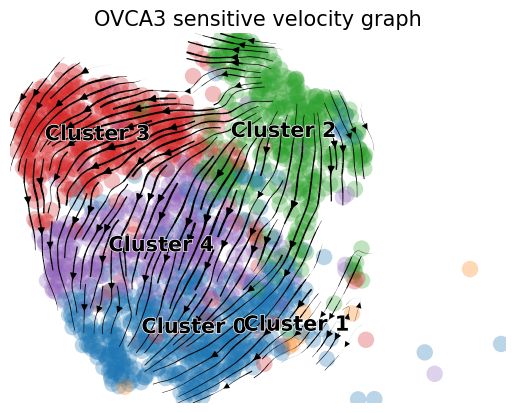

In [41]:
#make the graph of the sensitive cells, shows the colors 
scv.pl.velocity_embedding_stream(OVCA3_S2, basis="umap", color="Loupe", title='OVCA3 sensitive velocity graph',fontsize=15,legend_fontsize=15)
                                 #save='scVelo-umap-cluster.png' )

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_OVCA3_resistant_scVelo-umap-cluster.png


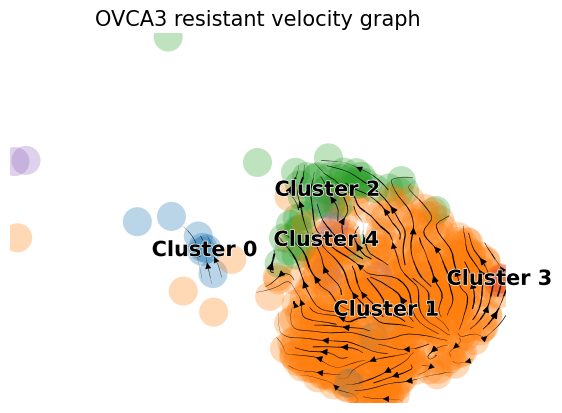

In [53]:
#make the graph of the resistant cells, shows the colors 
scv.pl.velocity_embedding_stream(OVCA3_R2, basis="umap", color="Loupe", title='OVCA3 resistant velocity graph',fontsize=15,legend_fontsize=15, save='OVCA3_resistant_scVelo-umap-cluster.png' )

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


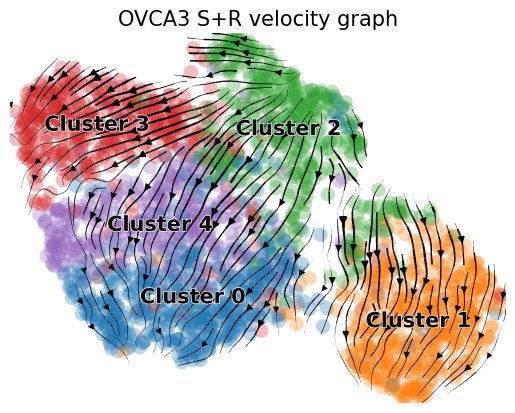

In [15]:
#make the graph of ALL the cells, shows the colors 
scv.pl.velocity_embedding_stream(OVCA3_merge, basis="umap", color="Loupe", title='OVCA3 S+R velocity graph',fontsize=15,legend_fontsize=15)
                                 #save='OVCA3_S+R_scVelo-umap-cluster.png' )

In [44]:
OVCA3_S2 #velocity_umap is added 

AnnData object with n_obs × n_vars = 1712 × 2000
    obs: 'Loupe', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'pca', 'neighbors', 'recover_dynamics', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'Loupe_colors'
    obsm: 'X_umap', 'X_pca', 'velocity_umap'
    varm: 'PCs', 'loss'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity', 'velocity_u'
    obsp: 'distances', 'connectivities'

computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_scVelo-latent-time.png


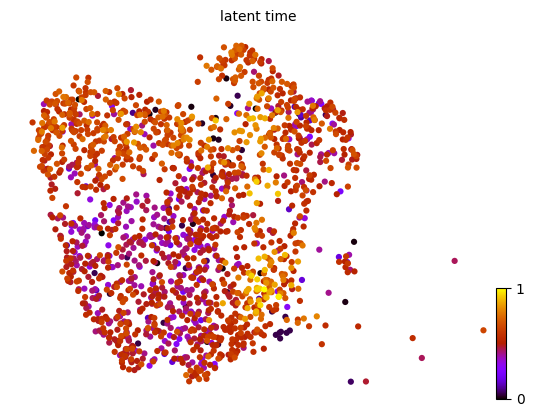

In [43]:
#latent time inference
scv.tl.latent_time(OVCA3_S2)
scv.pl.scatter(OVCA3_S2, color='latent_time', color_map='gnuplot', size=80, save='scVelo-latent-time.png')

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_OVCA3_resistant-scVelo-latent-time.png


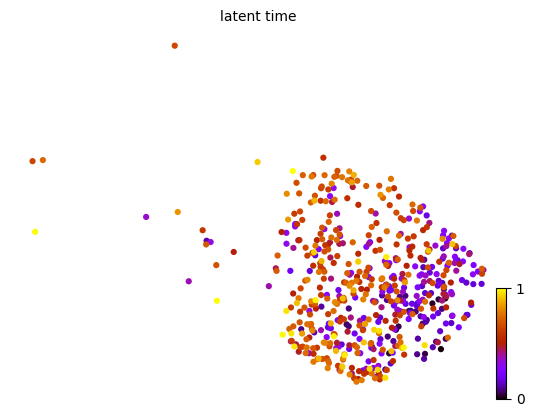

In [54]:
#latent time inference
scv.tl.latent_time(OVCA3_R2)
scv.pl.scatter(OVCA3_R2, color='latent_time', color_map='gnuplot', size=80, save='OVCA3_resistant-scVelo-latent-time.png')

computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


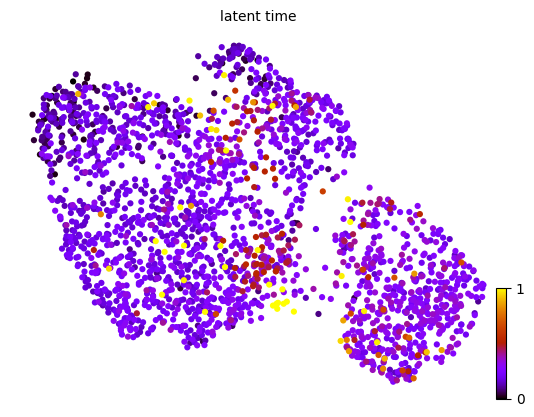

In [16]:
#latent time inference
scv.tl.latent_time(OVCA3_merge)
scv.pl.scatter(OVCA3_merge, color='latent_time', color_map='gnuplot', size=80)
               #save='OVCA3_S+R-scVelo-latent-time.png')

In [55]:
#Save both data files as anndata 
#located in blue_ferrallm/adelpinoherrera/deepvelo/
OVCA3_S2.write("preprocessed.OVCA3_S.h5ad")

In [56]:
OVCA3_R2.write("preprocessed.OVCA3_R.h5ad")

In [17]:
OVCA3_merge.write("preprocessed.OVCA3_merge.h5ad")

In [ ]:
#create a violin plot 
sc.pl.violin(OVCA3_merge, keys='latent_time',groupby="Loupe",order=["Cluster 3","Cluster 4","Cluster 0","Cluster 2","Cluster 1"],
            save='scVelo_OVCA3_merge_violin_latent-time_32401_.png') #good graph